# AIR QUALITY TEAM E - EXTENSION

# Zipcode - Analysis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats
import geopandas as gpd
from shapely import wkt
import plotly.graph_objects as go
from ipywidgets import widgets, Output
import pandas as pd
from ipywidgets import interact, Dropdown

In [2]:
# Load the datasets
health_data_2022 = pd.read_csv('../Merged_Data/2022_Health_Zipcode.csv')
health_data_2023 = pd.read_csv('../Merged_Data/2023_Health_Zipcode.csv')

In [3]:
health_data_2022

Zipcode  TotalPopulation  ACCESS2_CrudePrev  ARTHRITIS_CrudePrev  \
0     2111             7383                7.8                 16.1   
1     2113             6915                4.2                 11.3   
2     2118            26498                8.9                 16.6   
3     2124            47783               10.8                 21.9   
4     2127            31799                6.4                 15.7   
5     2128            40508               16.3                 17.5   
6     2130            35401                7.2                 17.3   
7     2135            42780                6.1                 13.4   
8     2139            36349                5.5                 12.1   

   BINGE_CrudePrev  BPHIGH_CrudePrev  BPMED_CrudePrev  CANCER_CrudePrev  \
0             16.7              23.0             72.6               4.1   
1             25.5              13.7             60.3               4.1   
2             19.7              23.6             66.9               4.1   
3             15.8              31.5             73.3               5.0   
4             22.8              19.0             66.4               4.9   
5             20.1              22.4             65.8               4.5   
6             20.0              21.7             70.0               5.2   
7             22.4              17.2             64.6               4.2   
8             18.9              18.2             61.7               3.7   

   CASTHMA_CrudePrev  CERVICAL_CrudePrev  ...  MAMMOUSE_CrudePrev  \
0                9.5                72.7  ...                79.4   
1               10.1                83.8  ...                83.0   
2               11.0                81.2  ...                83.0   
3               13.2                83.0  ...                83.8   
4               10.6                84.6  ...                81.8   
5               11.0                80.9  ...                79.9   
6               10.7                85.1  ...                83.7   
7               10.5                79.4  ...                81.3   
8                9.8                83.2  ...                87.1   

   MHLTH_CrudePrev  OBESITY_CrudePrev  PHLTH_CrudePrev  SLEEP_CrudePrev  \
0             13.6               15.8              7.1             32.0   
1             13.8               15.4              4.2             26.1   
2             14.7               22.7              8.1             33.1   
3             16.2               28.4             10.3             38.7   
4             14.2               19.0              6.5             29.0   
5             16.0               24.4              9.5             33.0   
6             13.8               20.9              7.0             30.1   
7             14.6               16.9              5.6             28.7   
8             13.3               19.2              5.1             28.6   

   STROKE_CrudePrev  TEETHLOST_CrudePrev                       Geolocation  \
0               2.3                 11.2  POINT (-71.05910467 42.35013318)   
1               1.1                  5.8  POINT (-71.05523575 42.36533484)   
2               2.4                 12.7   POINT (-71.07068615 42.3381858)   
3               3.5                 17.8  POINT (-71.07137829 42.28596194)   
4               1.8                  8.9  POINT (-71.05000701 42.33258472)   
5               2.4                 17.8    POINT (-71.015624 42.36281022)   
6               2.1                  9.5   POINT (-71.11485808 42.3098728)   
7               1.6                  9.1  POINT (-71.15381592 42.34988596)   
8               1.4                  7.5  POINT (-71.10304364 42.36253913)   

     Year     PM2.5  
0  2022.0  6.737533  
1  2022.0  7.908400  
2  2022.0  8.301094  
3  2022.0  7.214043  
4  2022.0  7.750316  
5  2022.0  7.087682  
6  2022.0  7.126749  
7  2022.0  6.949342  
8  2022.0  5.531739  

[9 rows x 35 columns]

In [4]:
health_data_2023

Zipcode  TotalPopulation  ACCESS2_CrudePrev  ARTHRITIS_CrudePrev  \
0     2111             7383                5.5                 15.8   
1     2113             6915                2.6                 12.3   
2     2118            26498                6.8                 17.1   
3     2124            47783                7.7                 22.4   
4     2127            31799                4.6                 16.7   
5     2128            40508               13.2                 17.9   
6     2130            35401                5.1                 18.2   
7     2135            42780                4.1                 14.0   
8     2139            36349                3.6                 13.2   

   BINGE_CrudePrev  BPHIGH_CrudePrev  BPMED_CrudePrev  CANCER_CrudePrev  \
0             16.8              23.6             73.1               4.5   
1             25.6              14.6             62.0               4.4   
2             19.5              24.7             69.2               4.4   
3             16.0              32.5             74.4               5.4   
4             22.8              20.0             67.8               5.3   
5             20.0              23.5             67.1               4.8   
6             20.2              23.0             70.7               5.6   
7             22.3              18.0             65.9               4.6   
8             20.9              17.7             64.1               3.9   

   CASTHMA_CrudePrev  CERVICAL_CrudePrev  ...  HEARING_CrudePrev  \
0                9.7                72.7  ...                5.3   
1               10.3                83.8  ...                3.4   
2               10.9                81.2  ...                4.8   
3               12.9                83.0  ...                4.9   
4               10.7                84.6  ...                4.3   
5               11.0                80.9  ...                5.8   
6               10.8                85.1  ...                4.6   
7               10.5                79.4  ...                4.3   
8               10.3                83.2  ...                3.2   

   VISION_CrudePrev  COGNITION_CrudePrev  MOBILITY_CrudePrev  \
0               4.9                 13.5                 9.8   
1               1.8                  9.6                 4.6   
2               5.4                 14.6                10.5   
3               7.1                 16.8                15.4   
4               3.6                 11.8                 8.1   
5               6.4                 17.4                12.3   
6               4.1                 11.9                 9.4   
7               3.1                 12.3                 6.8   
8               2.6                 11.2                 5.6   

   SELFCARE_CrudePrev  INDEPLIVE_CrudePrev  DISABILITY_CrudePrev  \
0                 2.9                  6.7                  25.3   
1                 1.2                  3.8                  16.3   
2                 3.7                  7.4                  26.0   
3                 5.3                  9.9                  31.3   
4                 2.6                  5.7                  21.0   
5                 4.2                  8.6                  30.4   
6                 2.9                  6.0                  22.6   
7                 2.0                  5.4                  21.2   
8                 1.7                  4.7                  18.4   

                        Geolocation    Year      PM2.5  
0  POINT (-71.05910467 42.35013318)  2023.0   9.464501  
1  POINT (-71.05523575 42.36533484)  2023.0   9.963605  
2   POINT (-71.07068615 42.3381858)  2023.0  10.577658  
3  POINT (-71.07137829 42.28596194)  2023.0   9.108688  
4  POINT (-71.05000701 42.33258472)  2023.0  10.532466  
5    POINT (-71.015624 42.36281022)  2023.0   9.646887  
6   POINT (-71.11485808 42.3098728)  2023.0   8.710598  
7  POINT (-71.15381592 42.34988596)  2023.0   8.870724  
8  POINT (-71.10304364 42

In [5]:
pm25_2022 = health_data_2022[['Zipcode', 'PM2.5']]
pm25_2023 = health_data_2023[['Zipcode', 'PM2.5']]

pm25_comparison = pd.merge(pm25_2022,
                           pm25_2023,
                           on='Zipcode',
                           suffixes=('_2022', '_2023'))

pm25_comparison['PM2.5_Change'] = pm25_comparison[
    'PM2.5_2023'] - pm25_comparison['PM2.5_2022']

table = tabulate(pm25_comparison,
                 headers='keys',
                 tablefmt='fancy_grid',
                 showindex=False)
print(table)

╒═══════════╤══════════════╤══════════════╤════════════════╕
│   Zipcode │   PM2.5_2022 │   PM2.5_2023 │   PM2.5_Change │
╞═══════════╪══════════════╪══════════════╪════════════════╡
│      2111 │      6.73753 │      9.4645  │        2.72697 │
├───────────┼──────────────┼──────────────┼────────────────┤
│      2113 │      7.9084  │      9.96361 │        2.05521 │
├───────────┼──────────────┼──────────────┼────────────────┤
│      2118 │      8.30109 │     10.5777  │        2.27656 │
├───────────┼──────────────┼──────────────┼────────────────┤
│      2124 │      7.21404 │      9.10869 │        1.89465 │
├───────────┼──────────────┼──────────────┼────────────────┤
│      2127 │      7.75032 │     10.5325  │        2.78215 │
├───────────┼──────────────┼──────────────┼────────────────┤
│      2128 │      7.08768 │      9.64689 │        2.55921 │
├───────────┼──────────────┼──────────────┼────────────────┤
│      2130 │      7.12675 │      8.7106  │        1.58385 │
├───────────┼───────────

### The comparison of air quality between 2022 and 2023, as indicated by PM2.5 levels across common zip codes, reveals a notable trend. For the zip codes analyzed, there is a consistent increase in PM2.5 levels from 2022 to 2023. This upward shift suggests a deterioration in air quality over the year. The changes vary across different areas, with some zip codes experiencing more significant increases than others. 

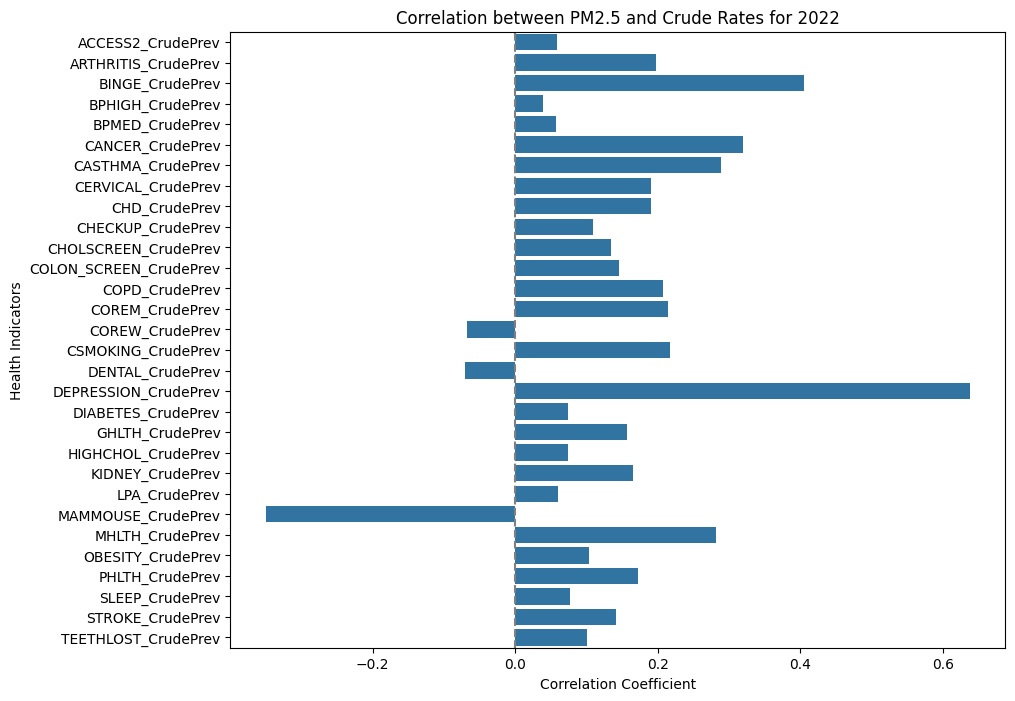

In [6]:
crude_columns_2022 = [
    col for col in health_data_2022.columns if 'Crude' in col
]
crude_columns_2022.append('PM2.5')
correlation_matrix_2022 = health_data_2022[crude_columns_2022].corr()

correlations_2022 = correlation_matrix_2022['PM2.5'].drop(
    'PM2.5')  # excluding the PM2.5 self-correlation

# Creating a bar plot to visualize the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_2022.values, y=correlations_2022.index)
plt.title('Correlation between PM2.5 and Crude Rates for 2022')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Health Indicators')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

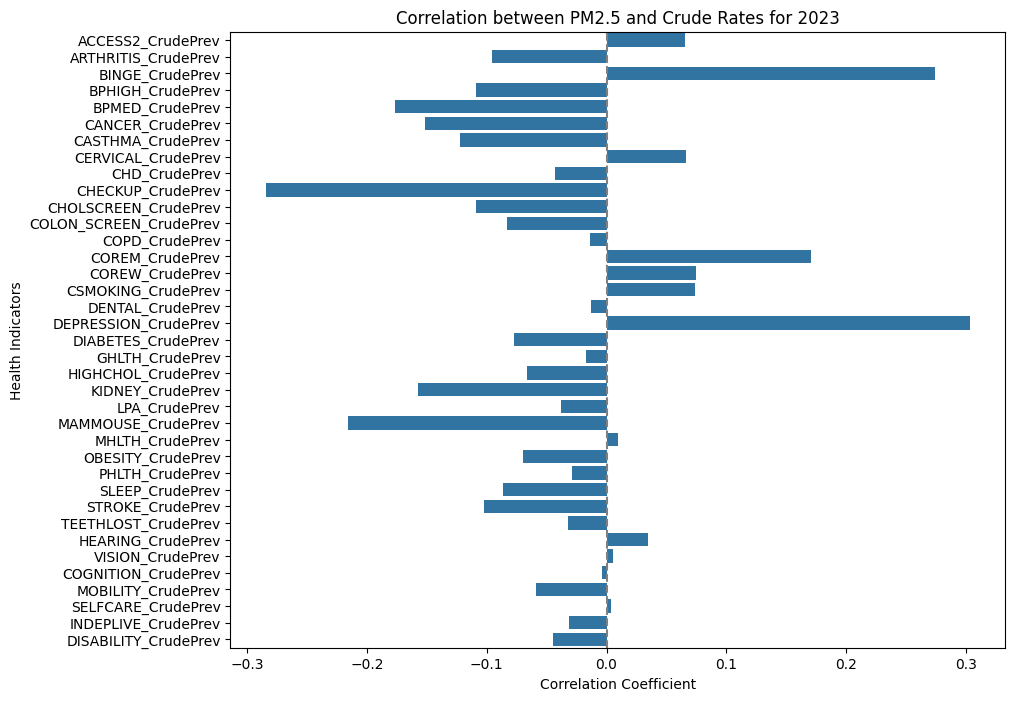

In [7]:
crude_columns_2023 = [
    col for col in health_data_2023.columns if 'Crude' in col
]
crude_columns_2023.append('PM2.5')
correlation_matrix_2023 = health_data_2023[crude_columns_2023].corr()

correlations_2023 = correlation_matrix_2023['PM2.5'].drop(
    'PM2.5')  # excluding the PM2.5 self-correlation

# Creating a bar plot to visualize the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_2023.values, y=correlations_2023.index)
plt.title('Correlation between PM2.5 and Crude Rates for 2023')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Health Indicators')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

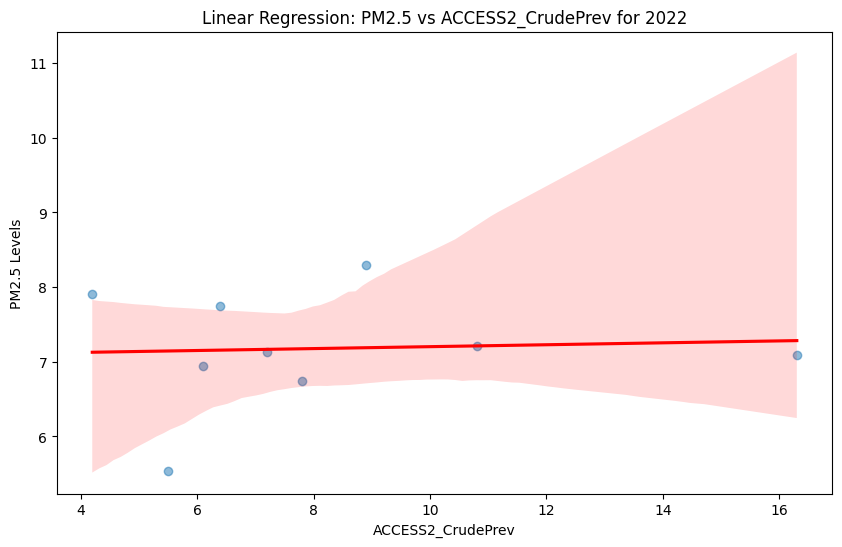

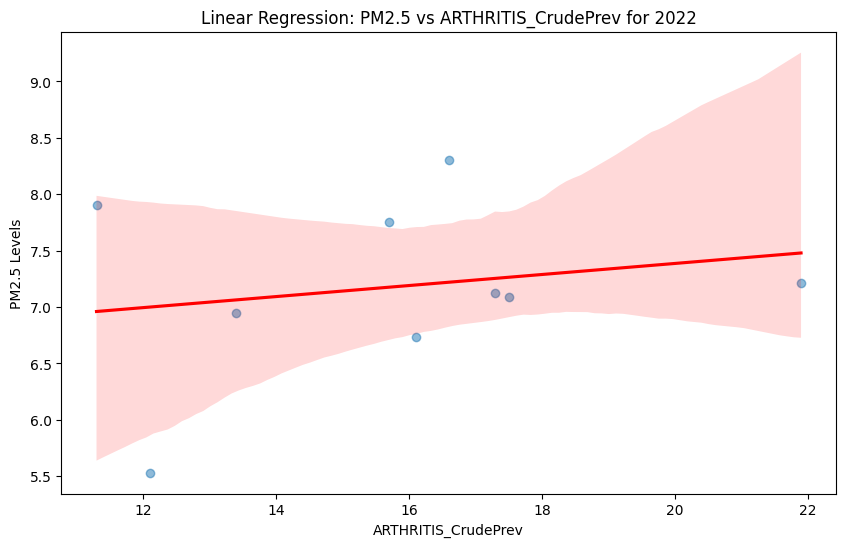

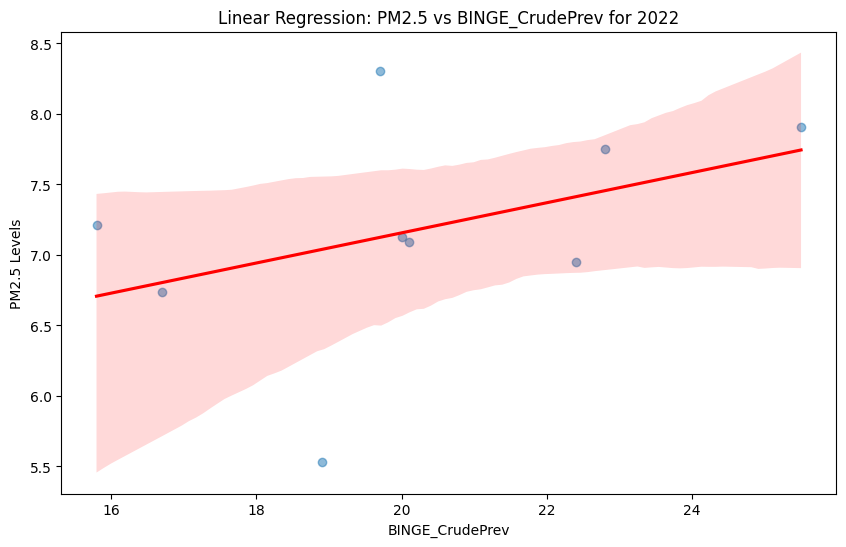

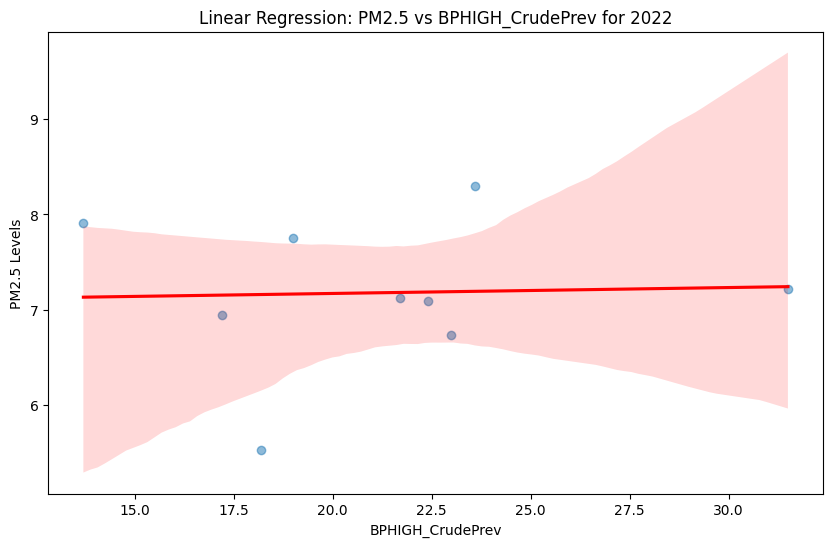

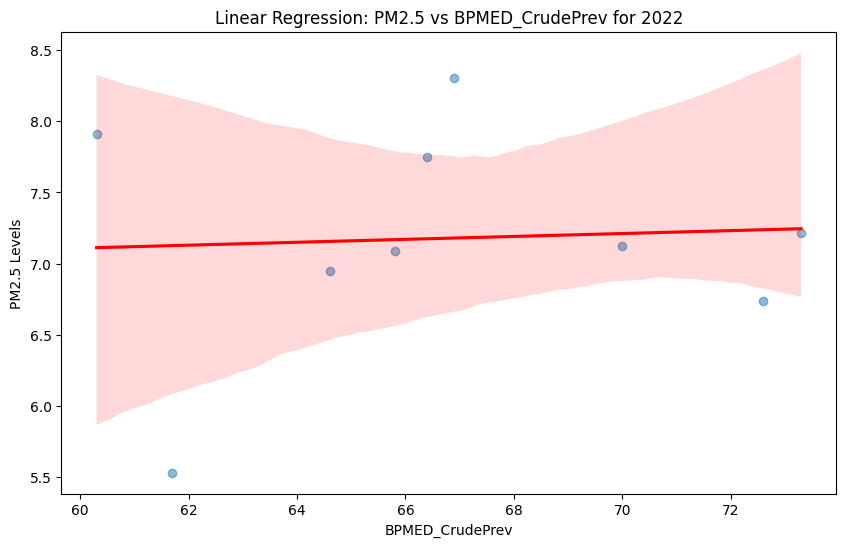

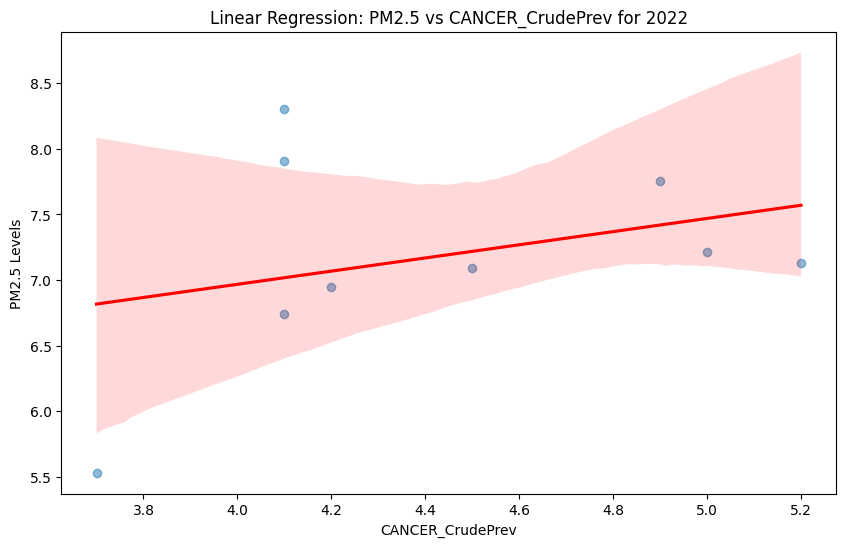

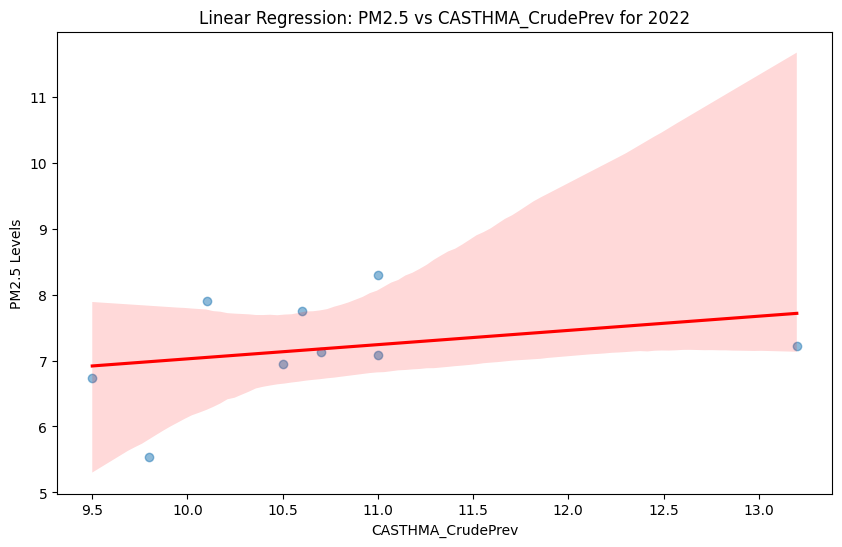

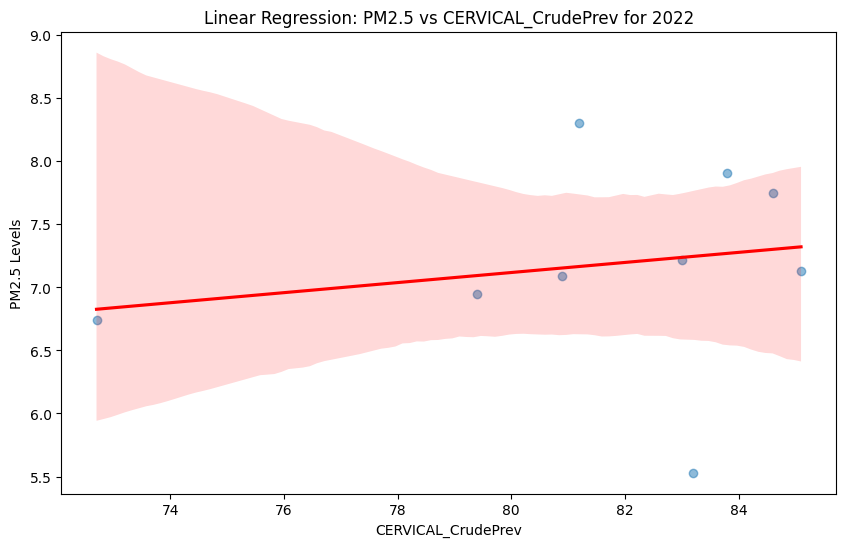

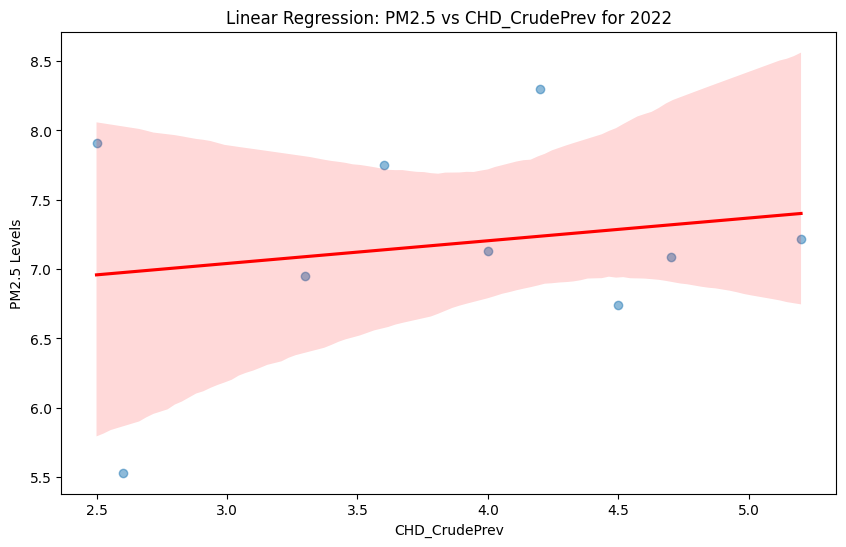

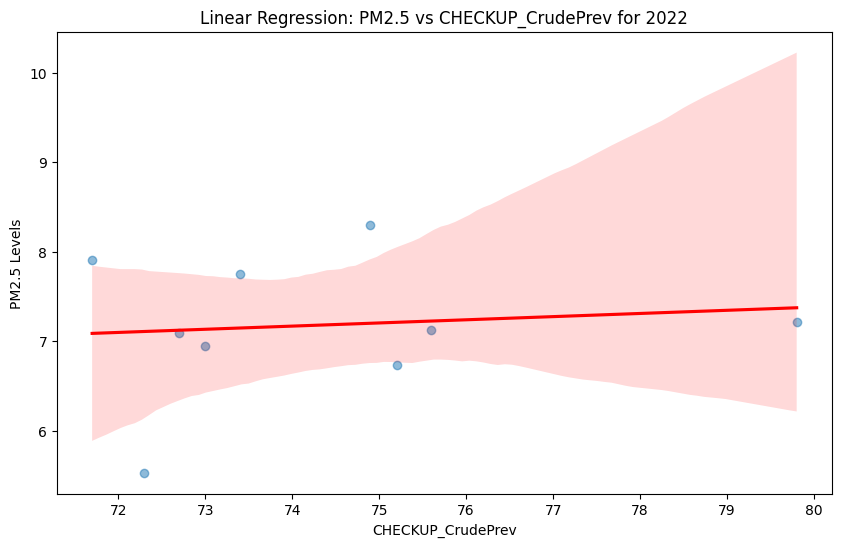

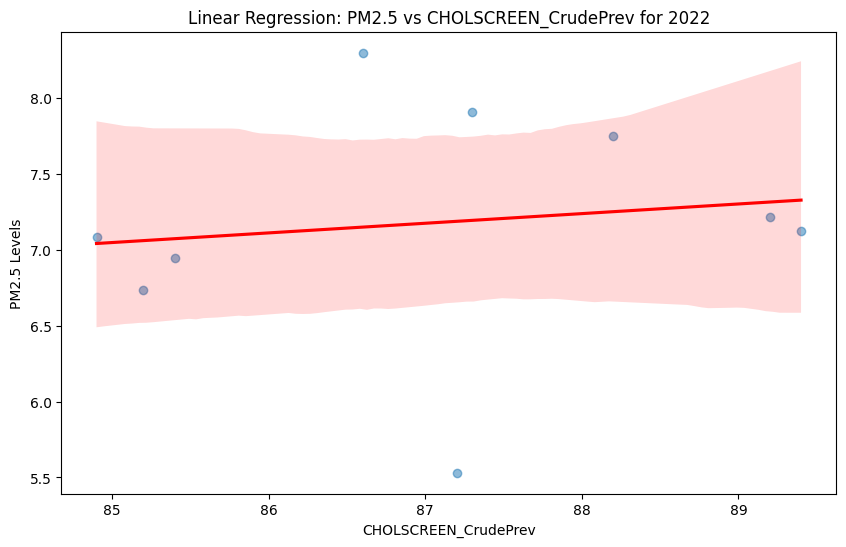

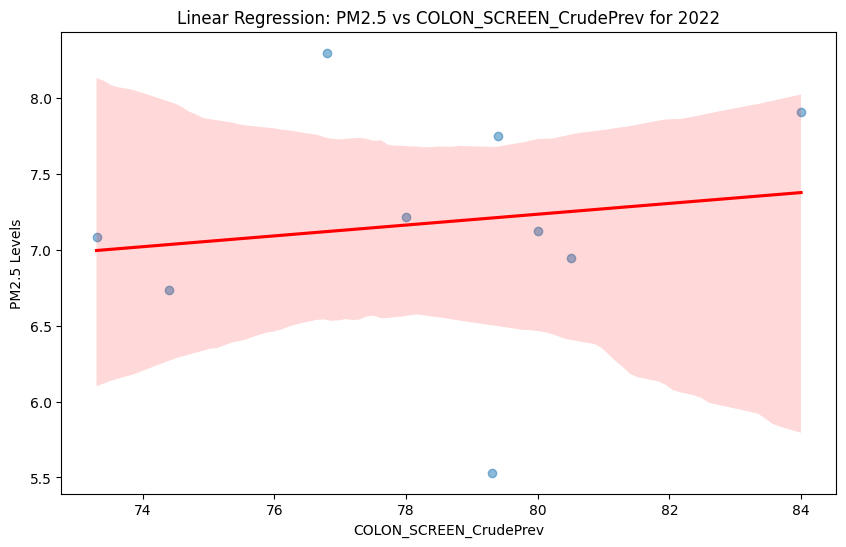

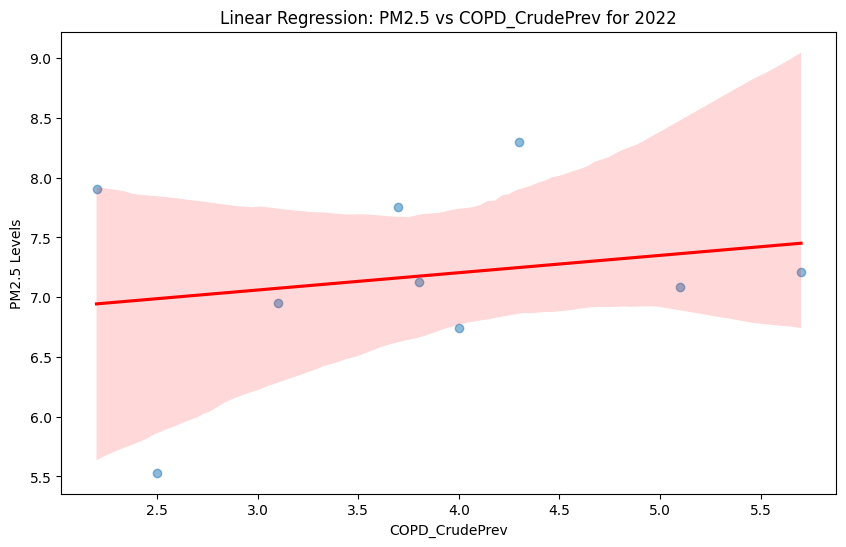

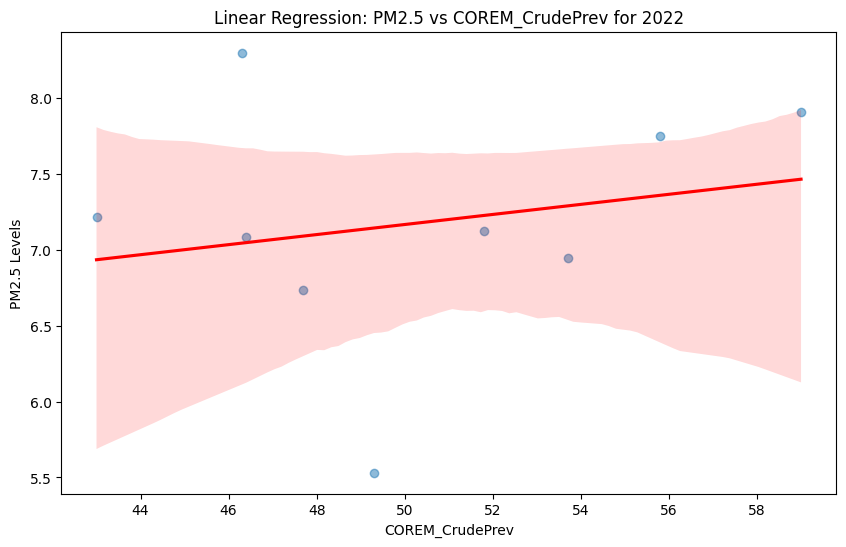

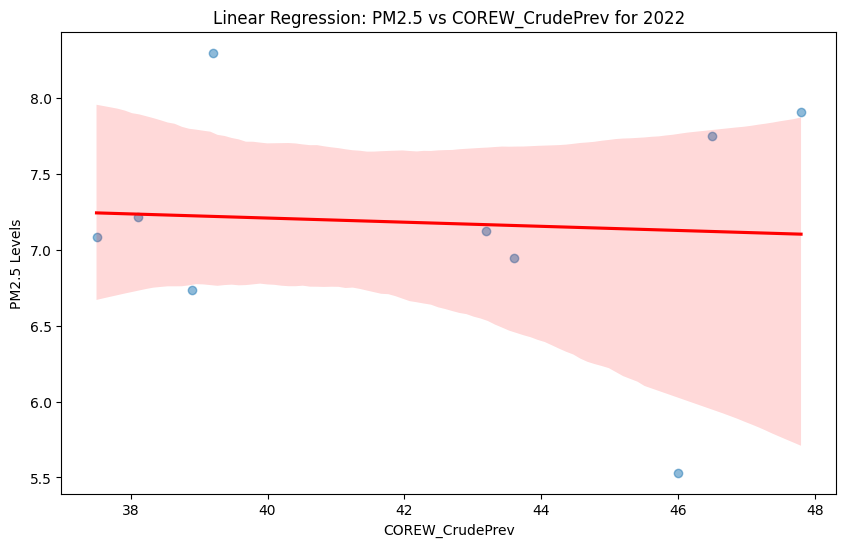

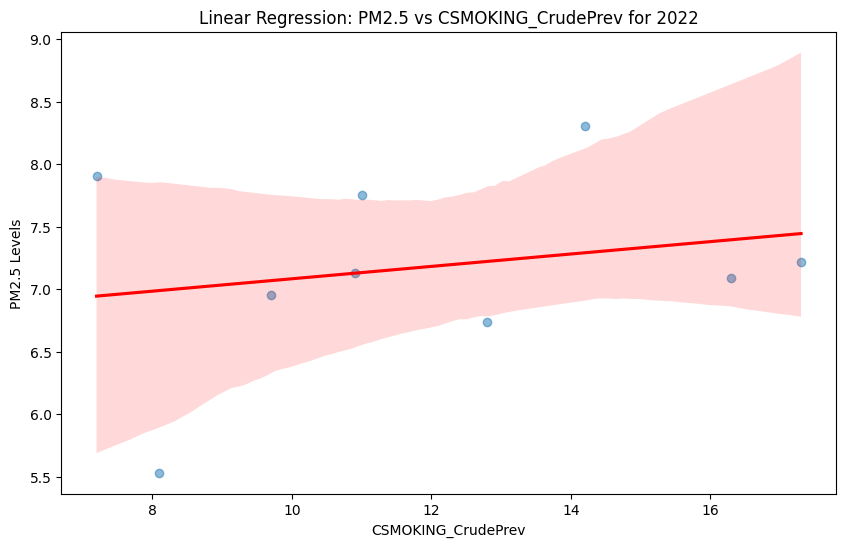

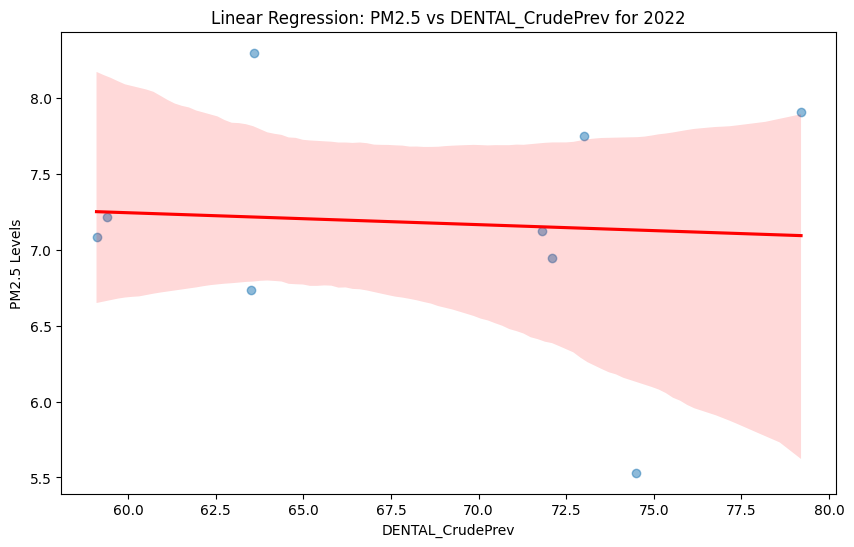

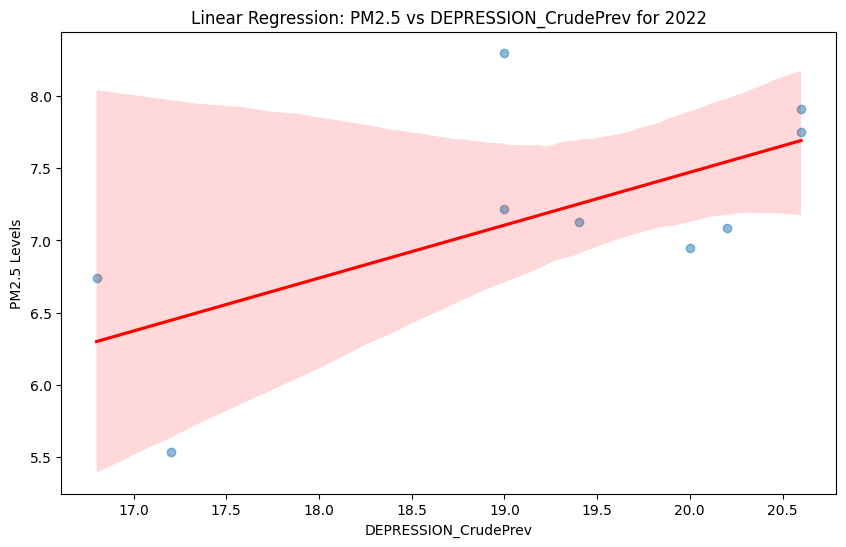

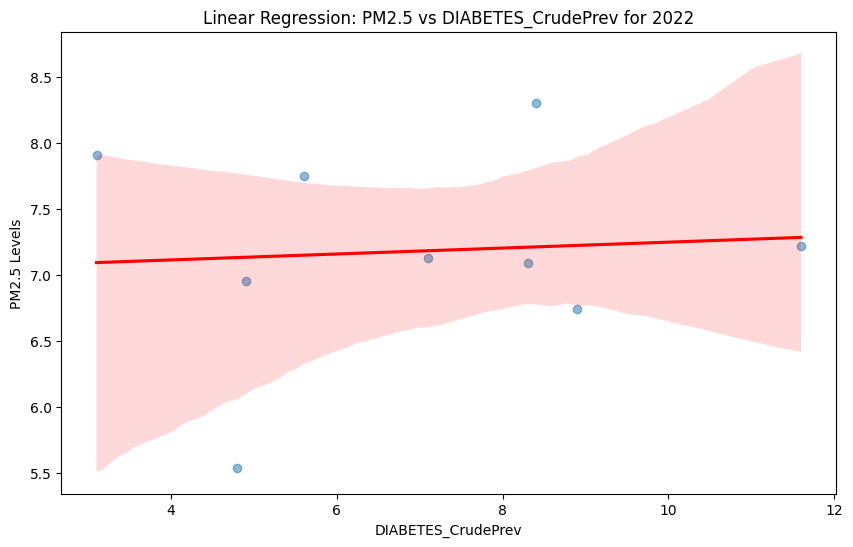

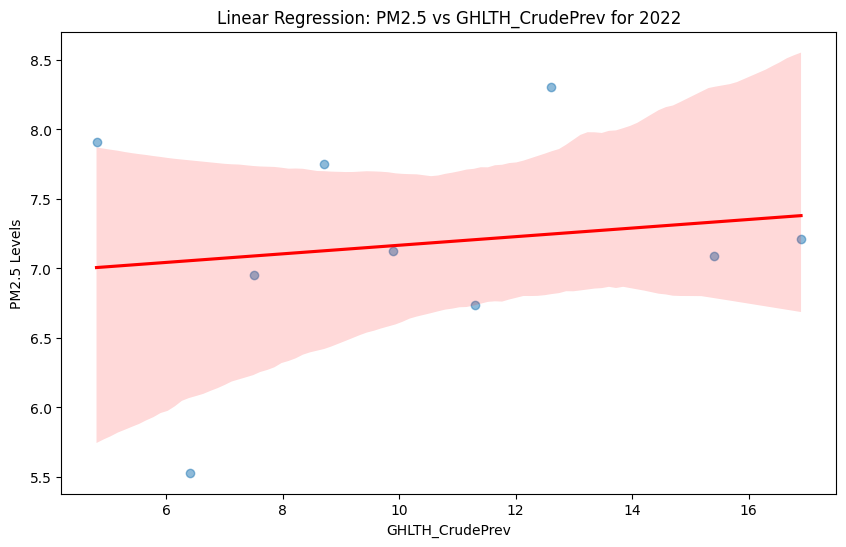

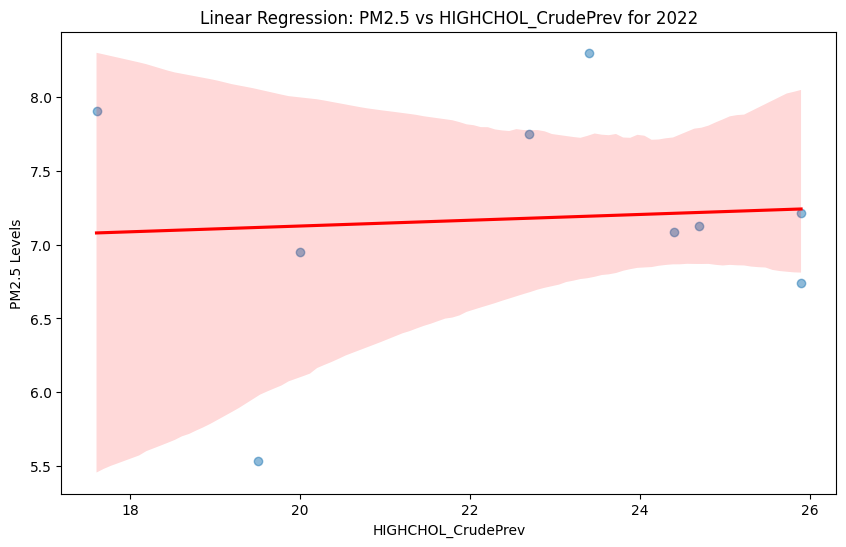

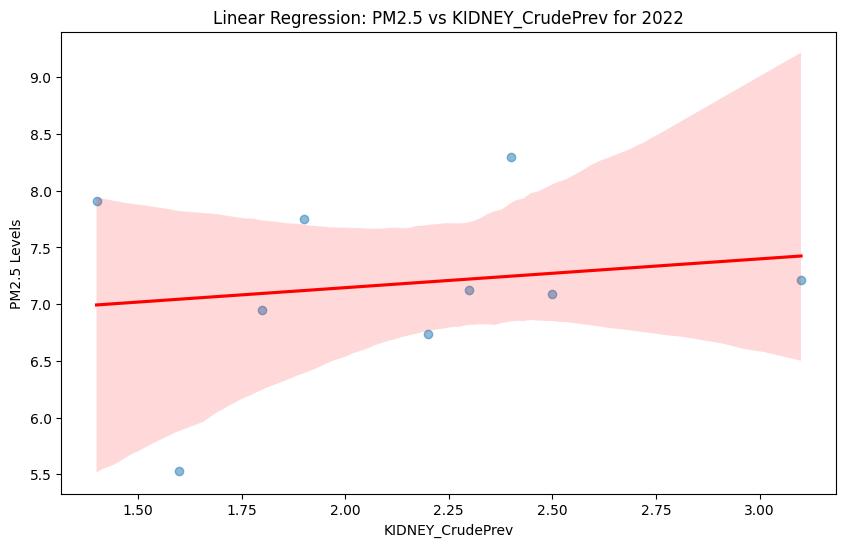

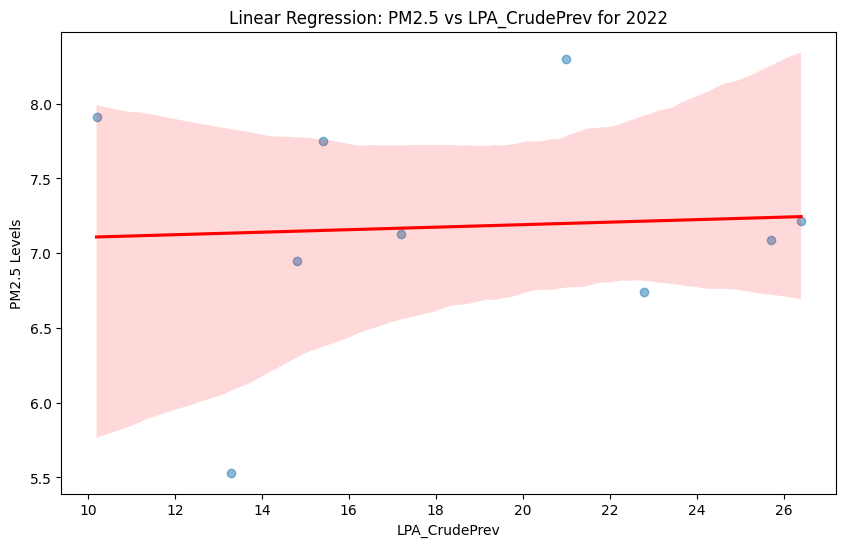

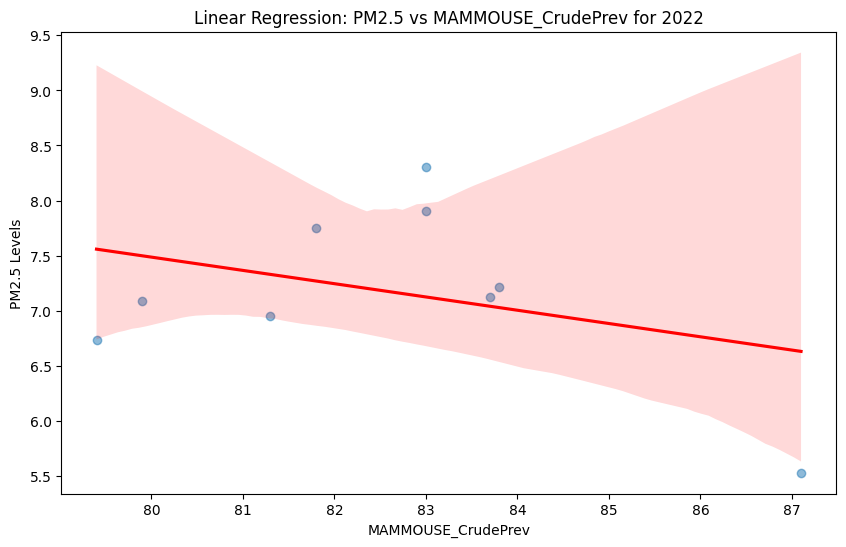

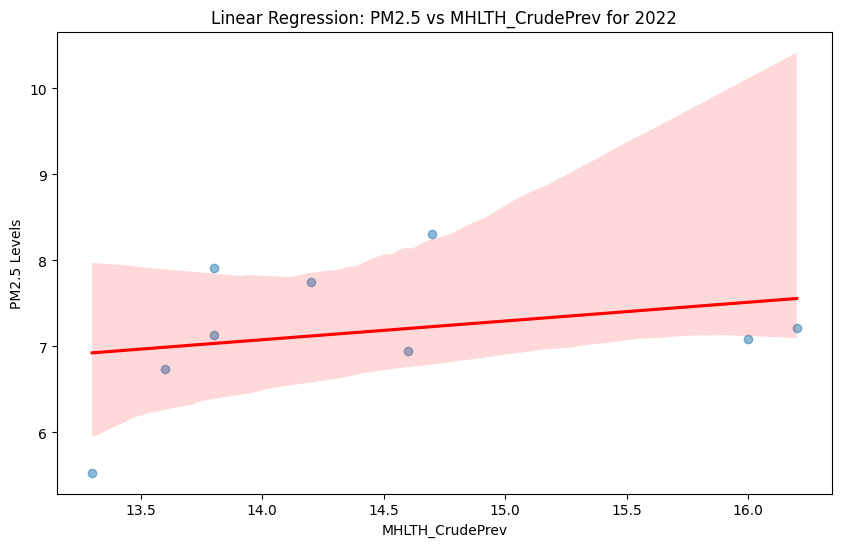

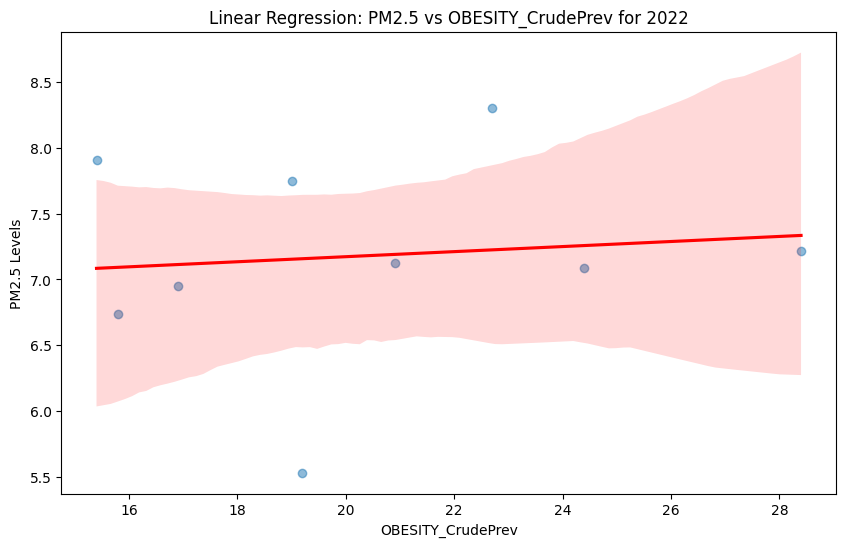

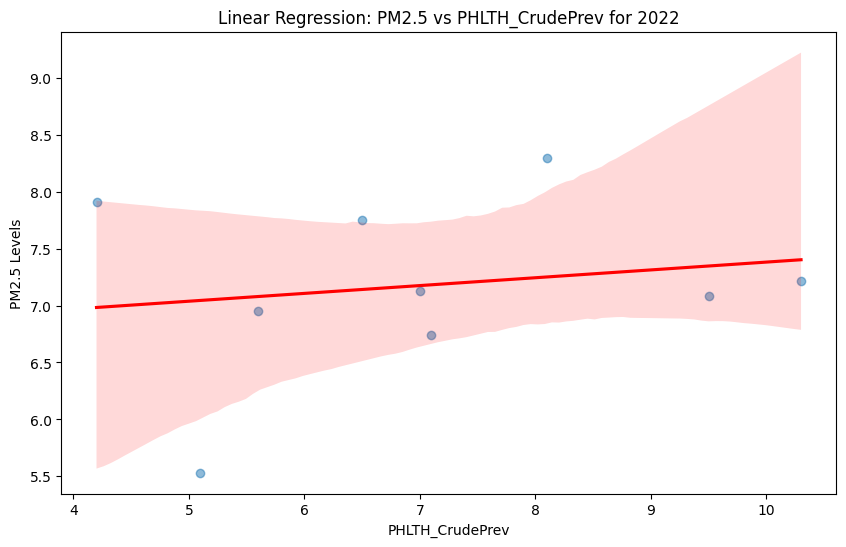

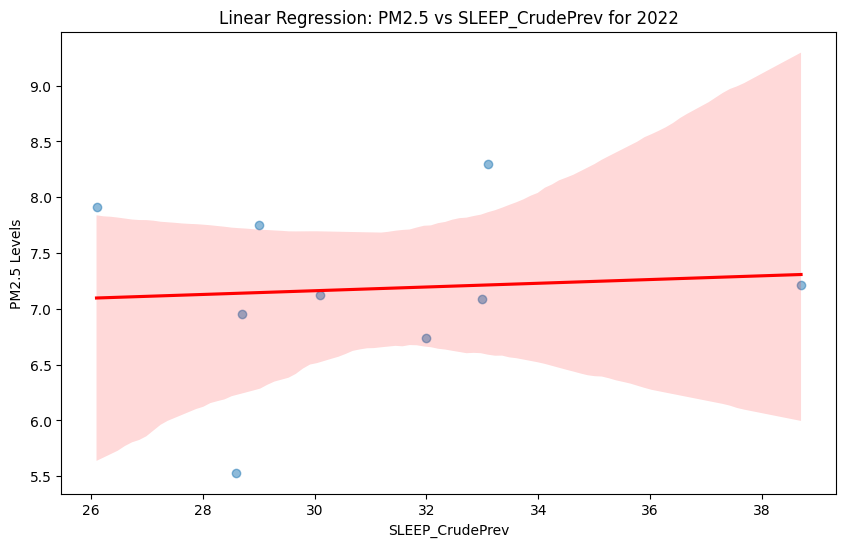

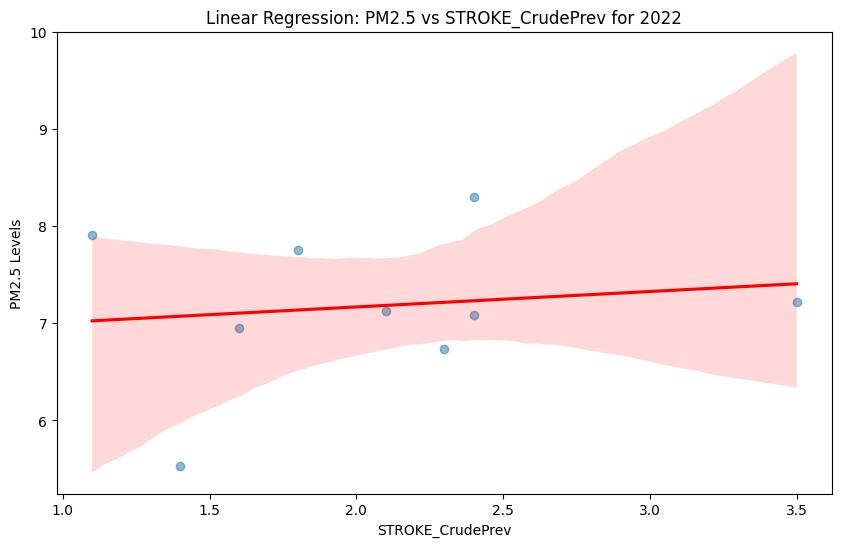

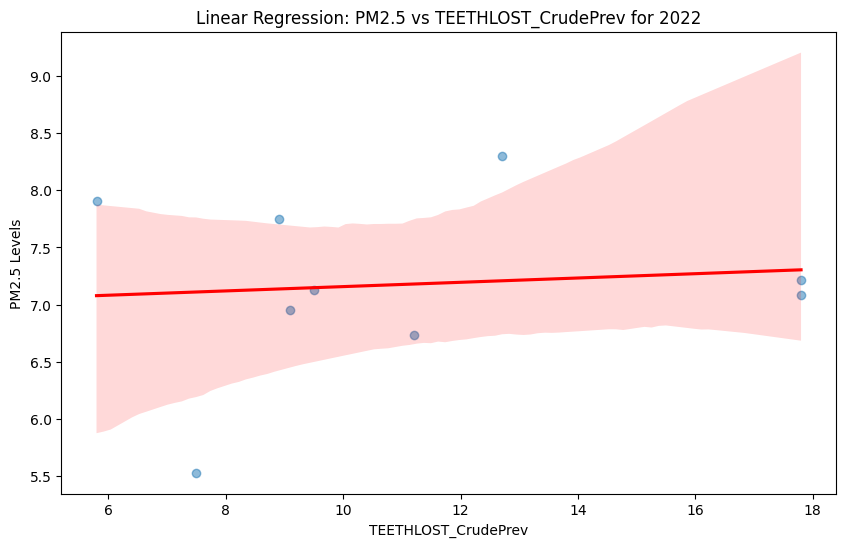

In [8]:
def plot_linear_regression(data, crude_columns, year):
    for column in crude_columns:
        if column != 'PM2.5':
            # Performing linear regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(data[column], data['PM2.5'])

            # Plotting
            plt.figure(figsize=(10, 6))
            sns.regplot(x=column, y='PM2.5', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
            plt.title(f'Linear Regression: PM2.5 vs {column} for {year}')
            plt.xlabel(column)
            plt.ylabel('PM2.5 Levels')
            plt.show()

# Extracting crude columns from 2022 dataset
crude_columns_2022 = [col for col in health_data_2022.columns if 'Crude' in col]

# Making linear regression plots for each crude rate against PM2.5 level for 2022
plot_linear_regression(health_data_2022, crude_columns_2022, '2022')


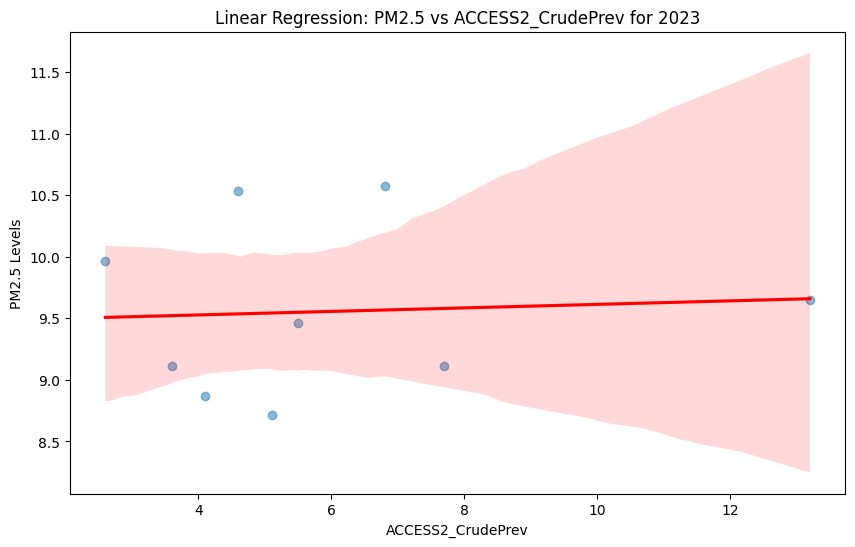

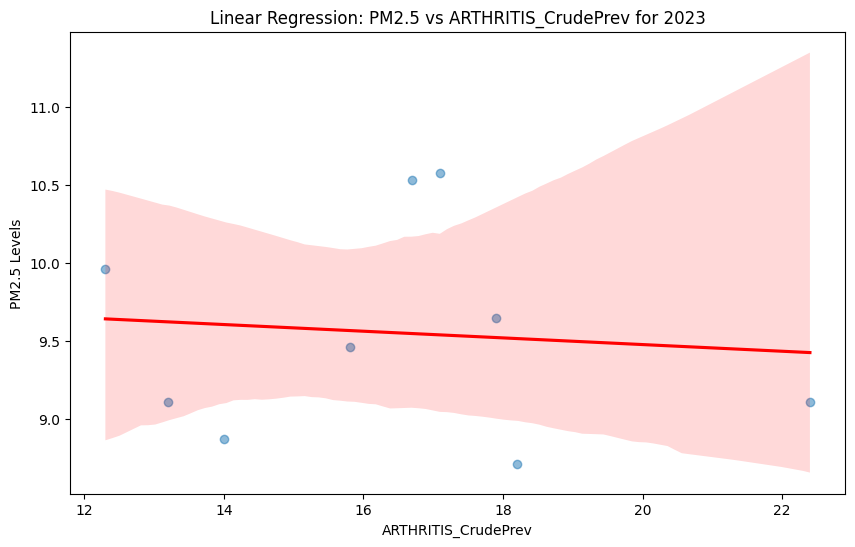

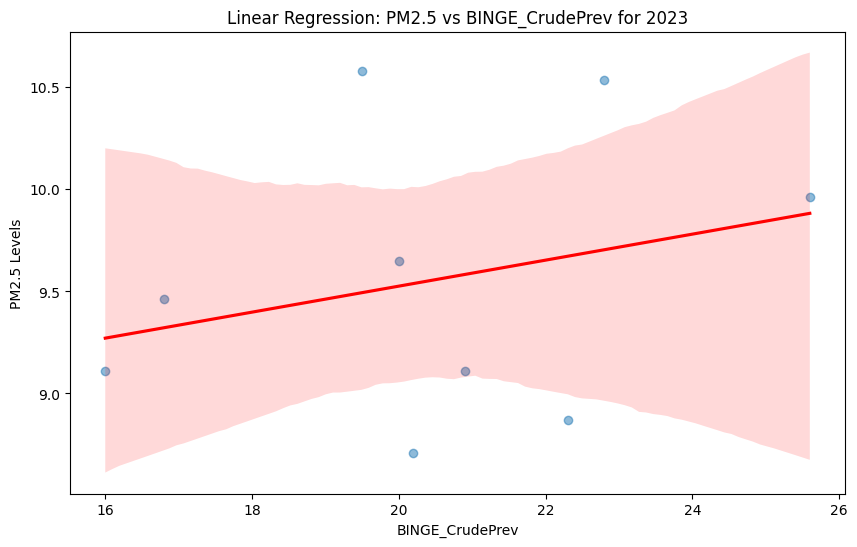

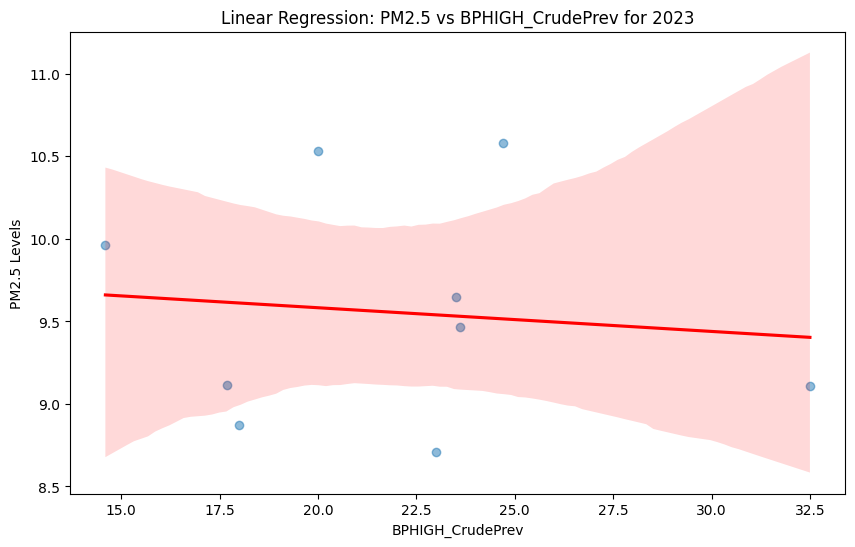

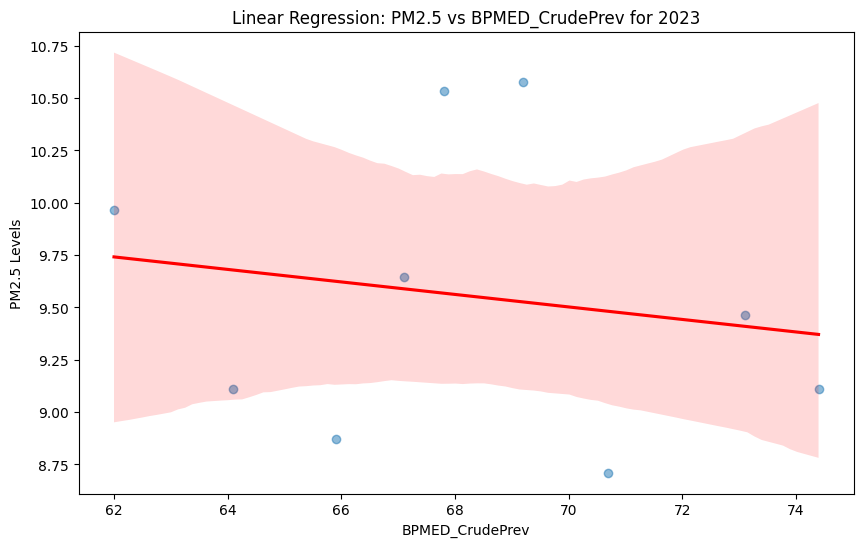

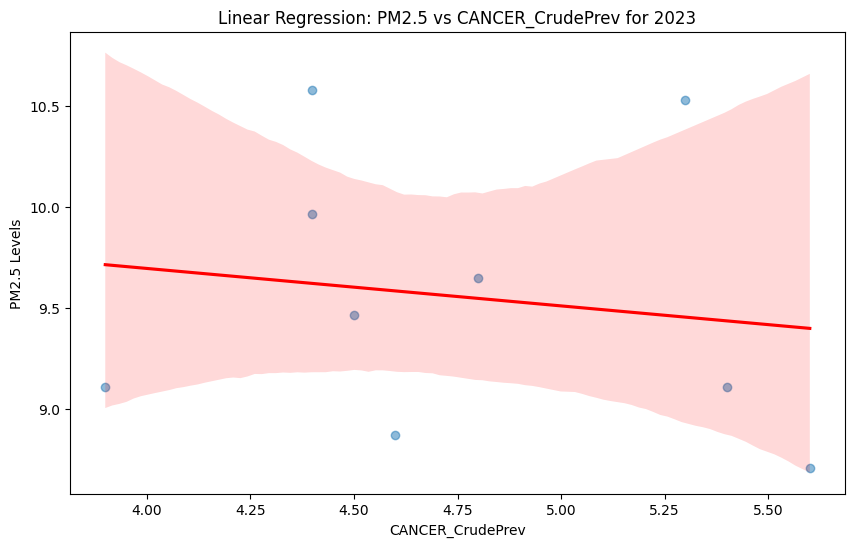

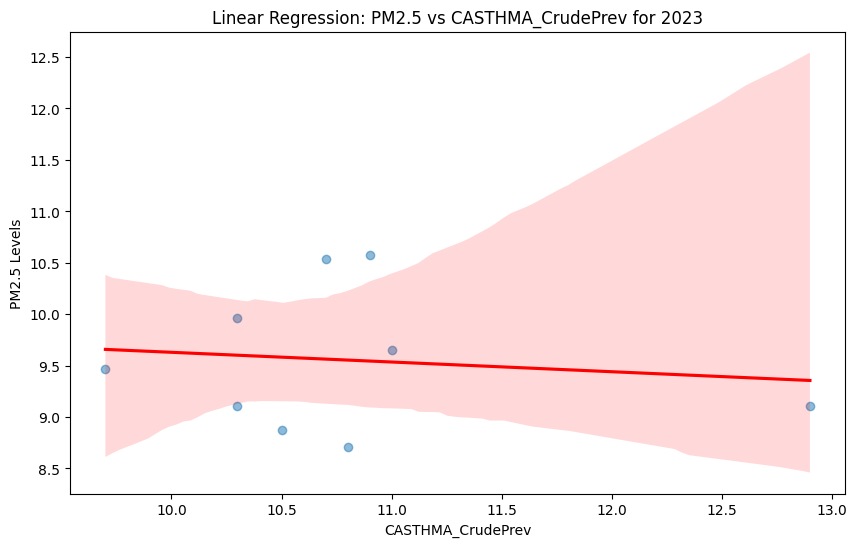

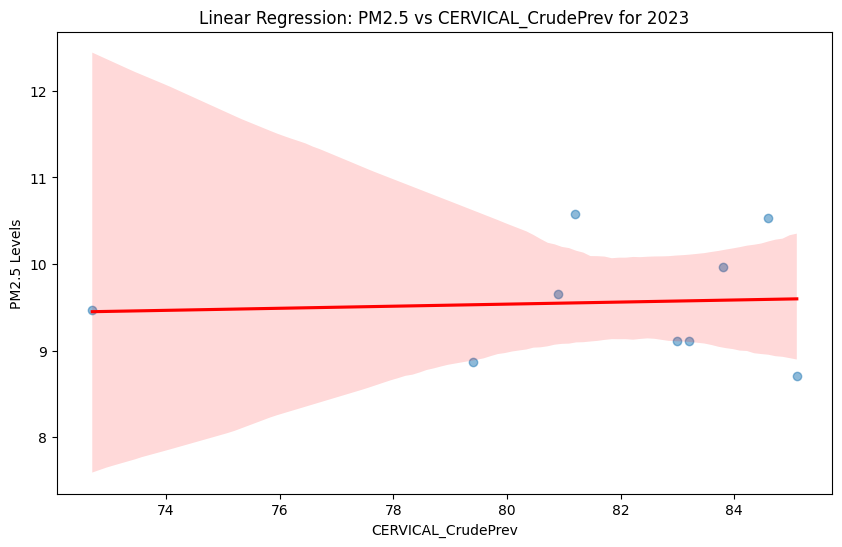

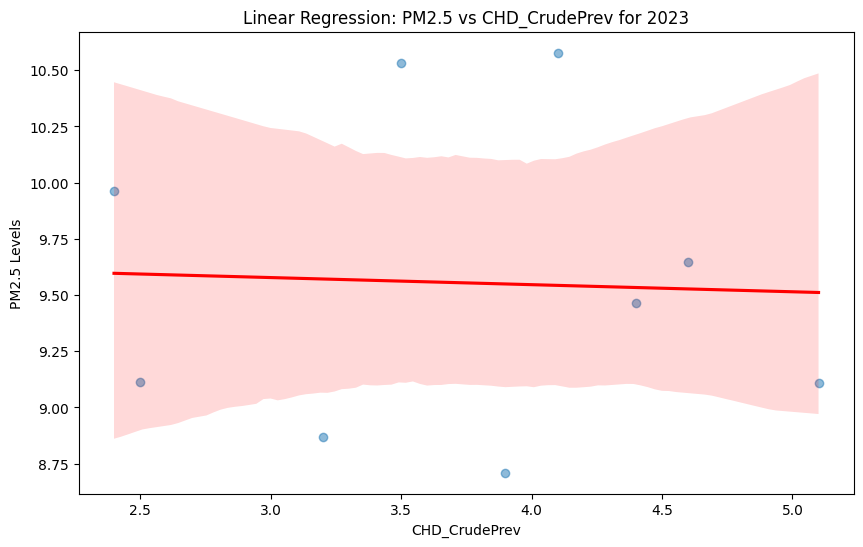

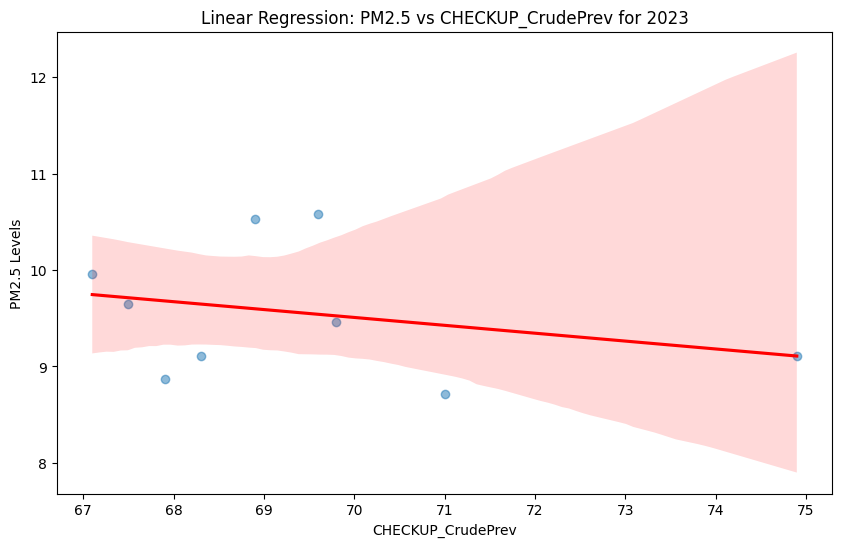

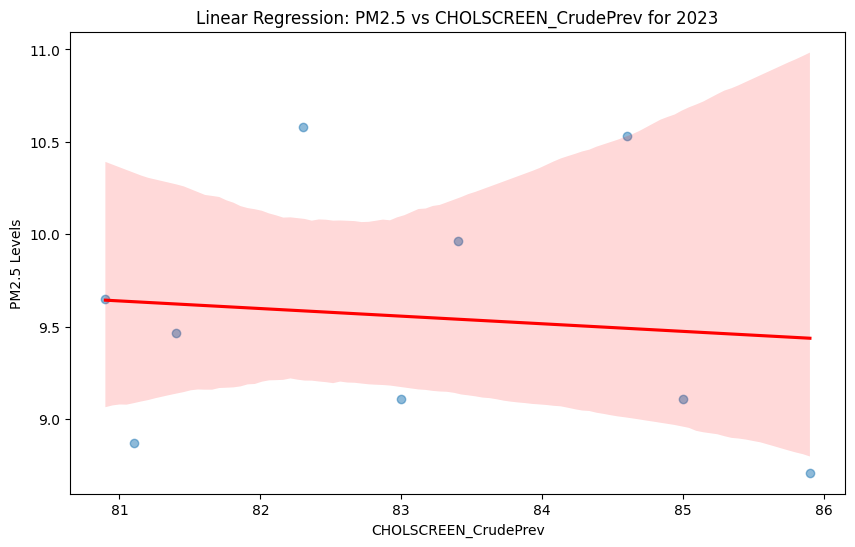

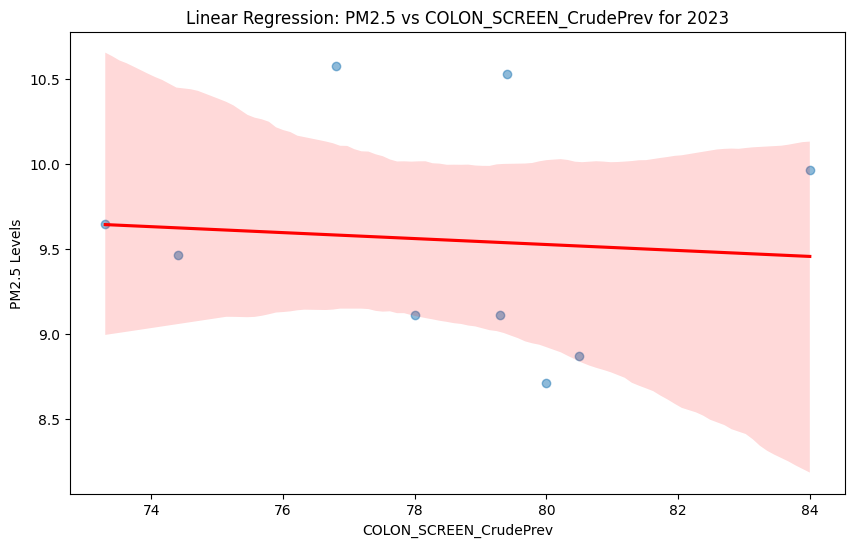

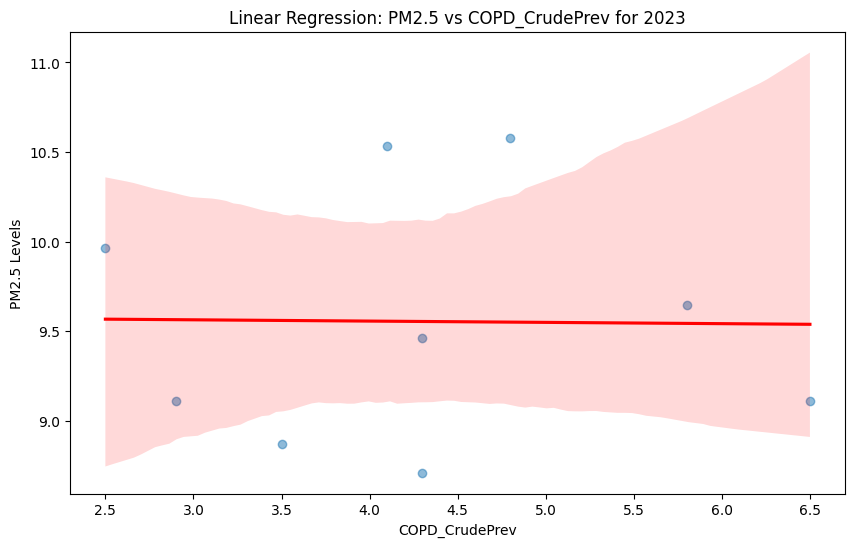

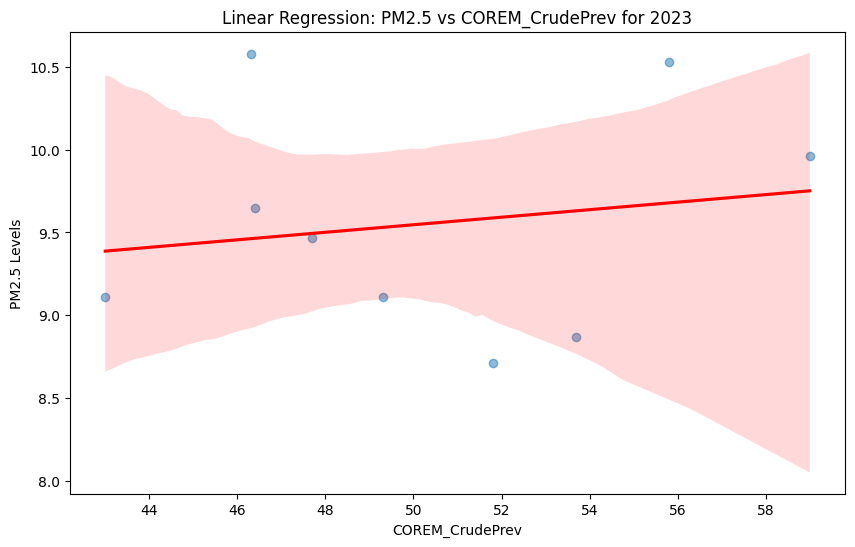

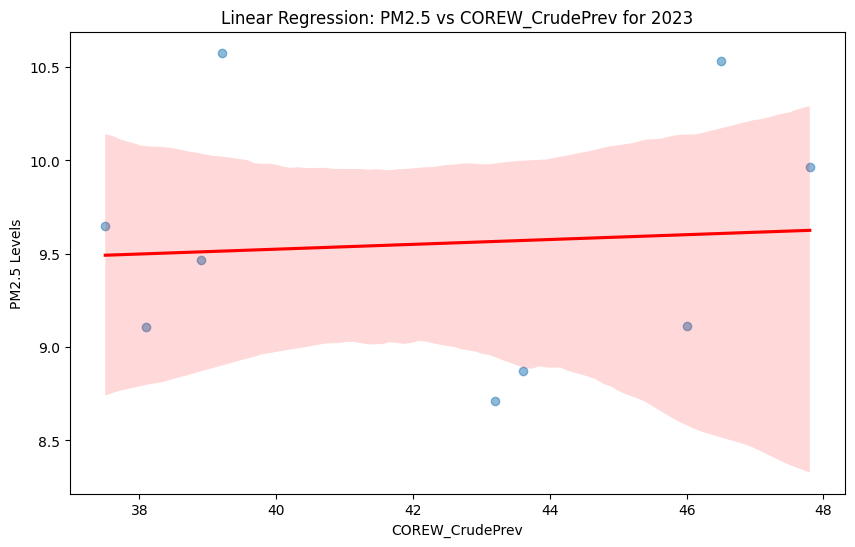

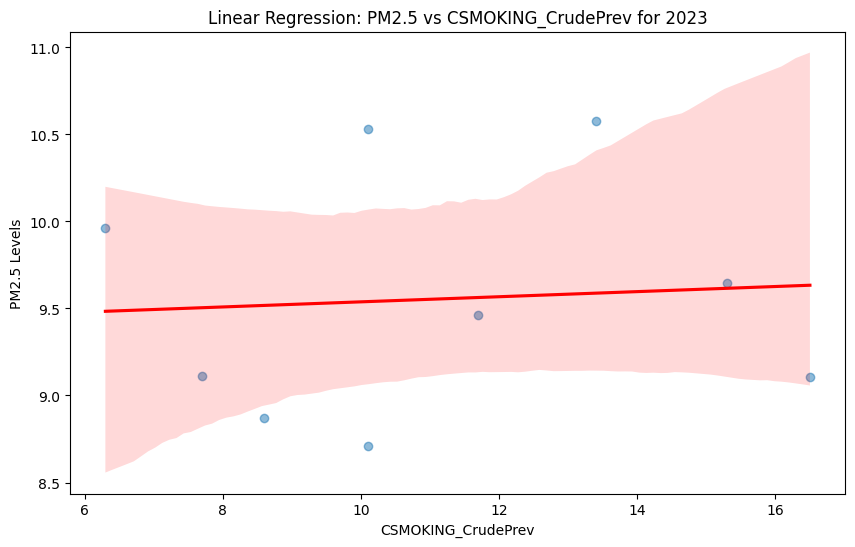

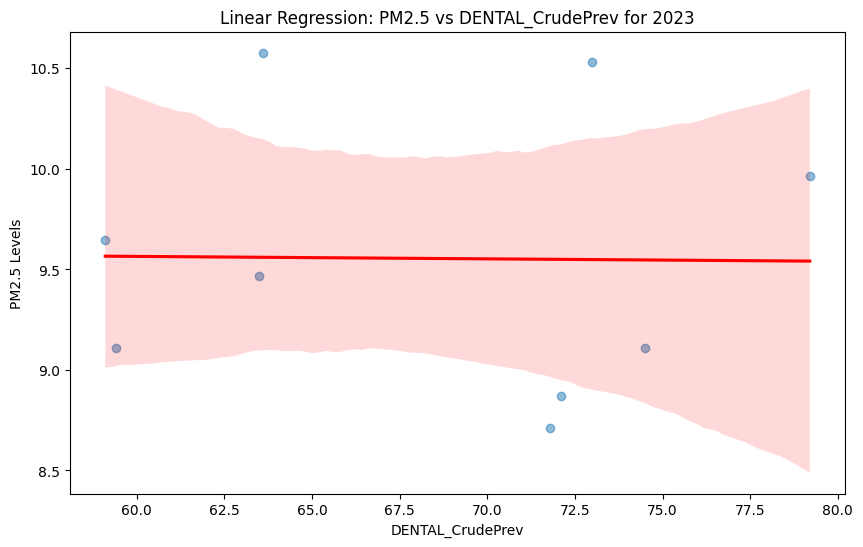

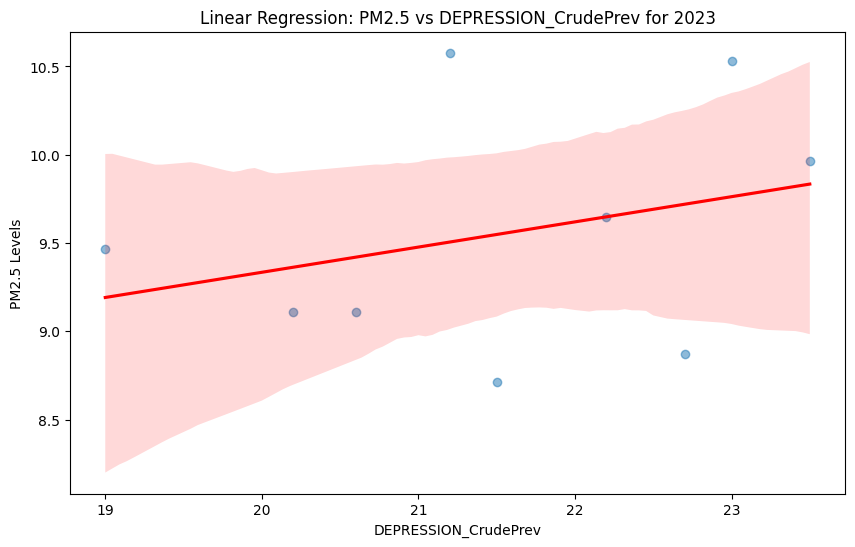

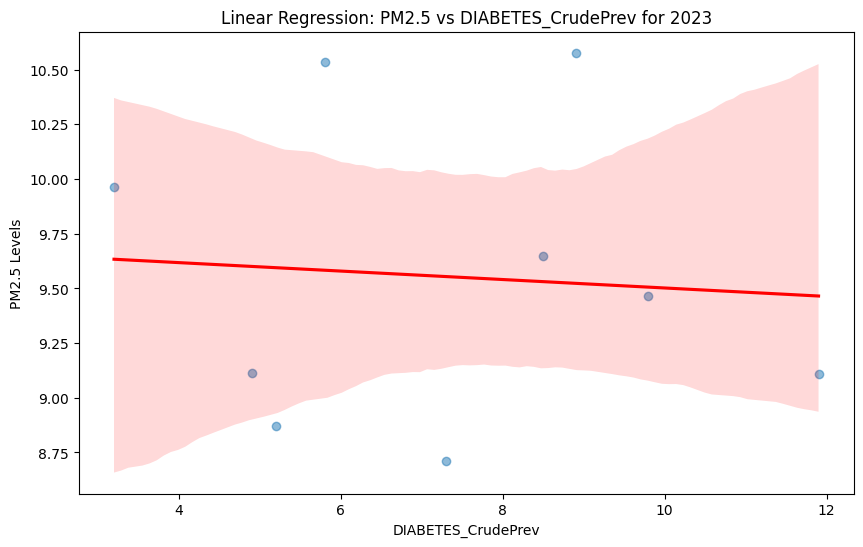

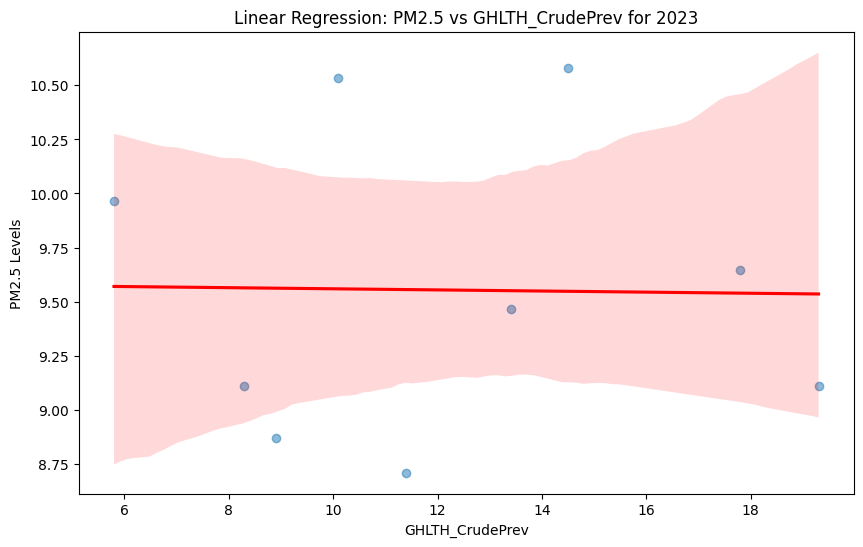

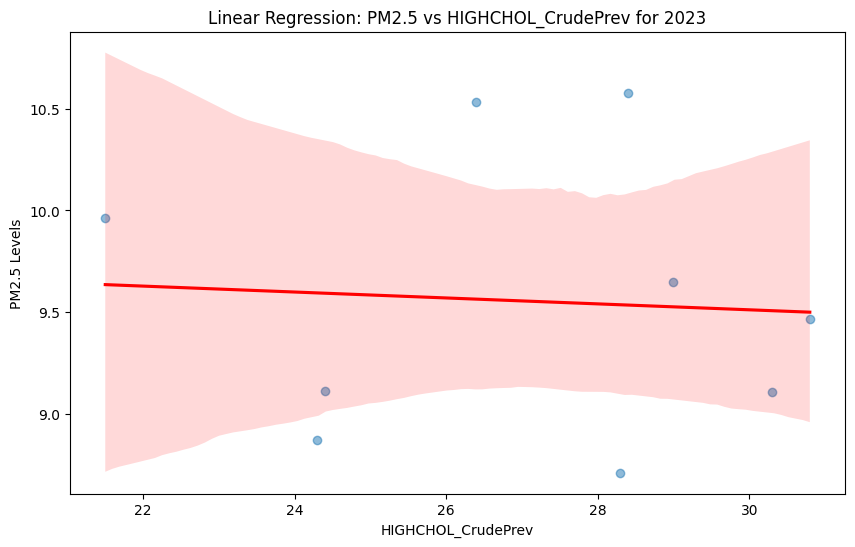

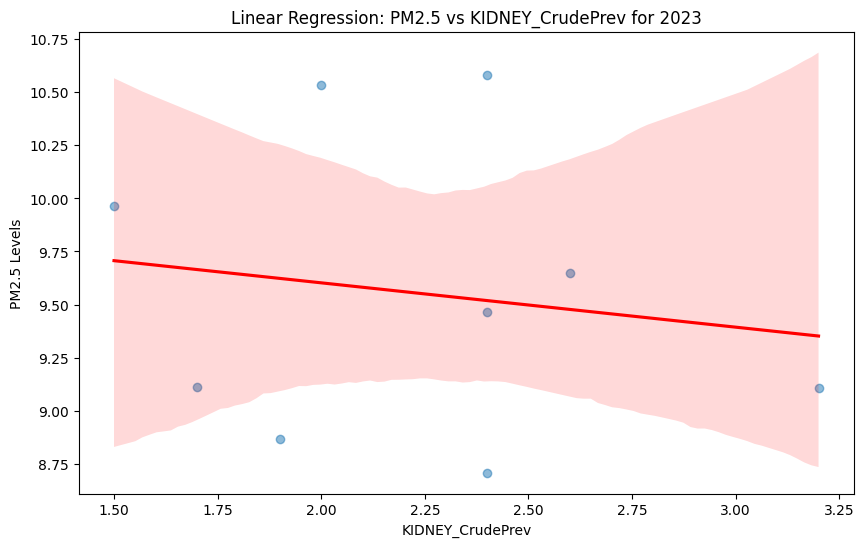

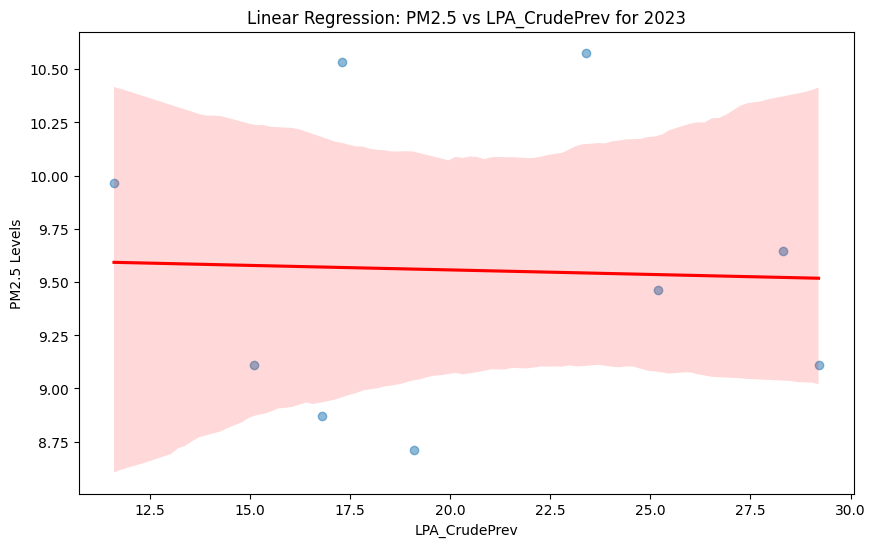

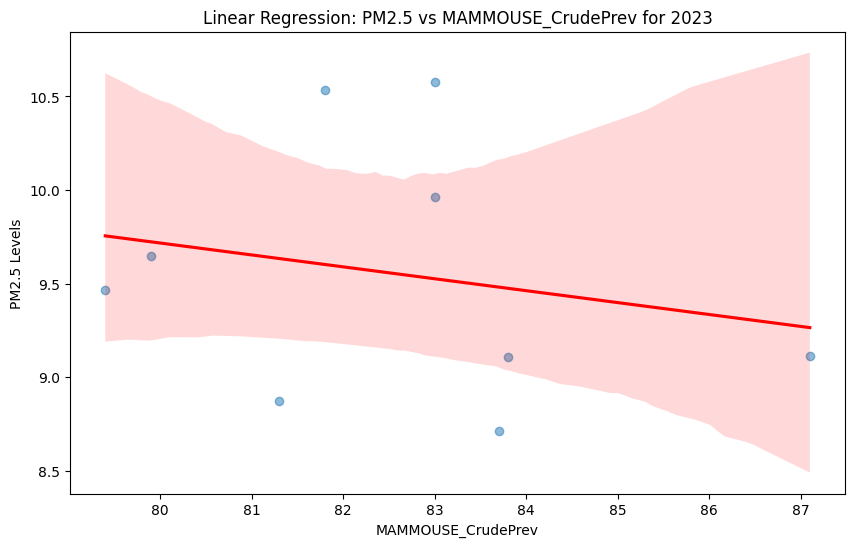

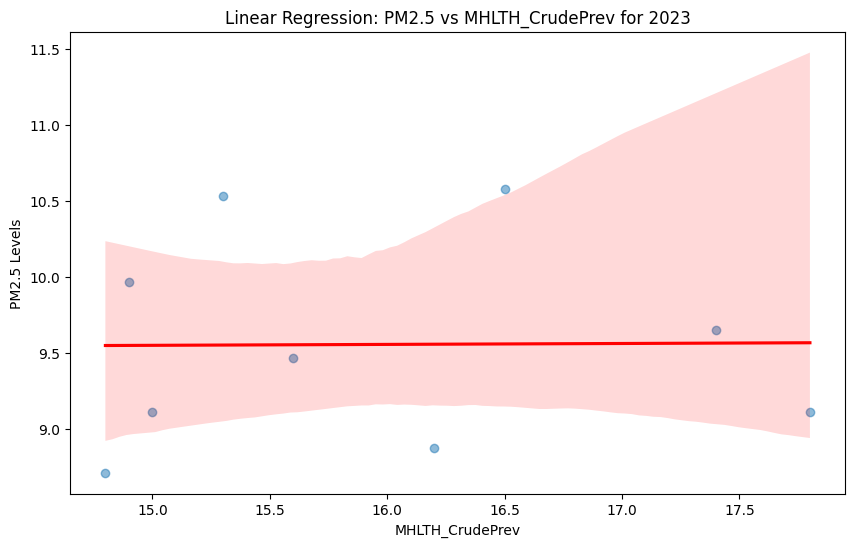

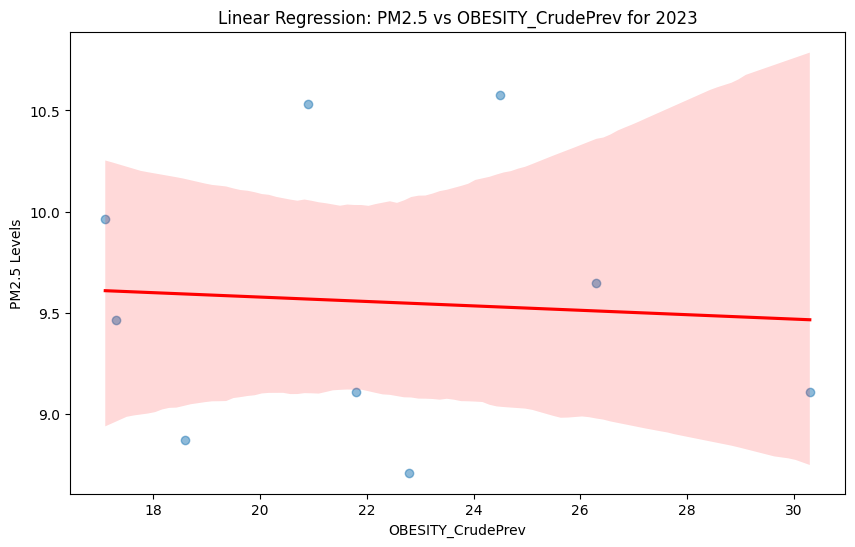

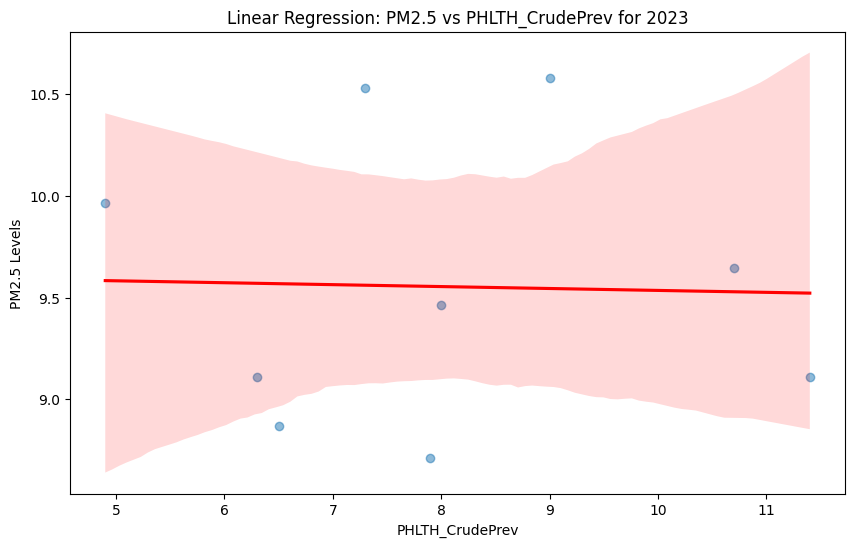

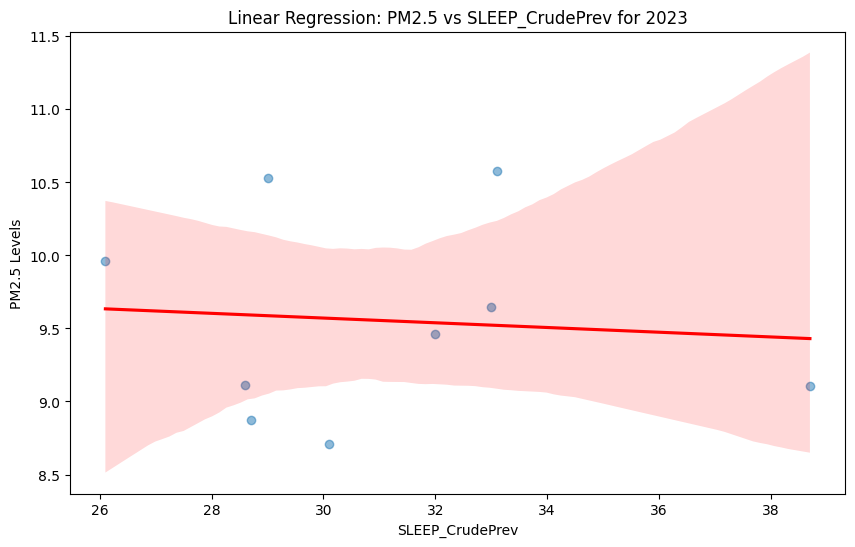

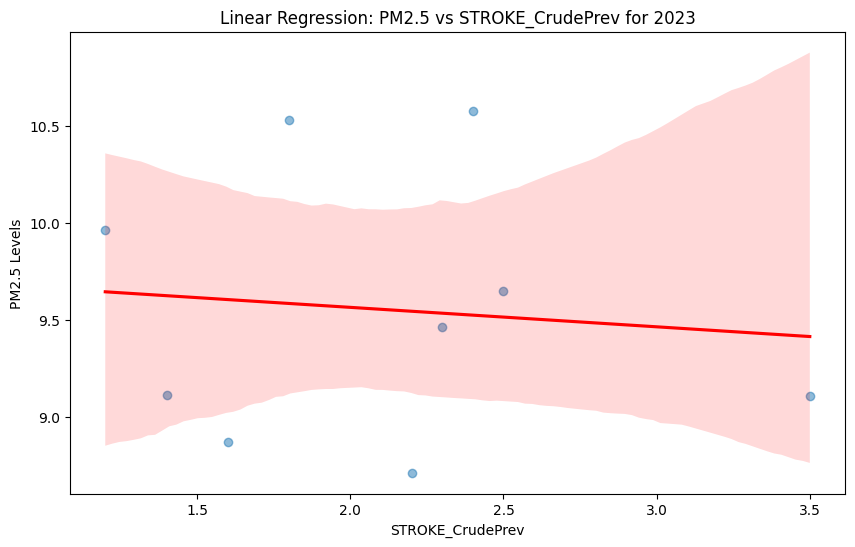

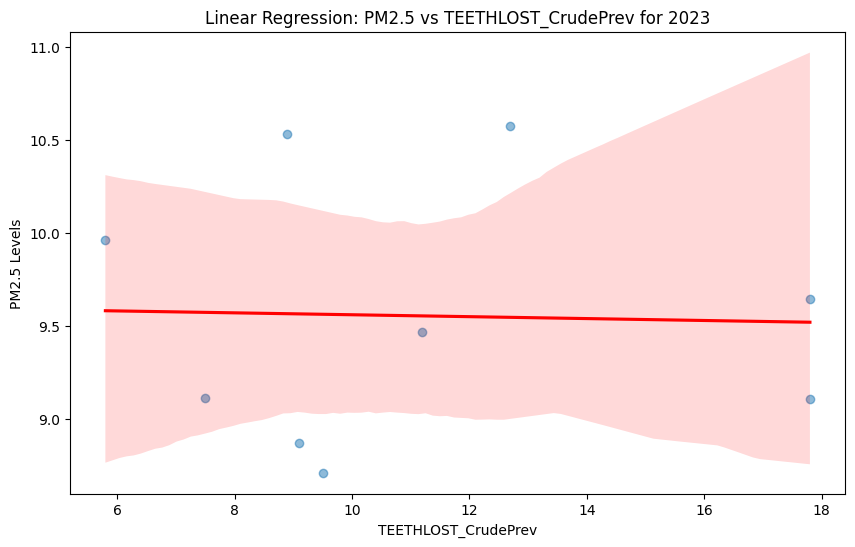

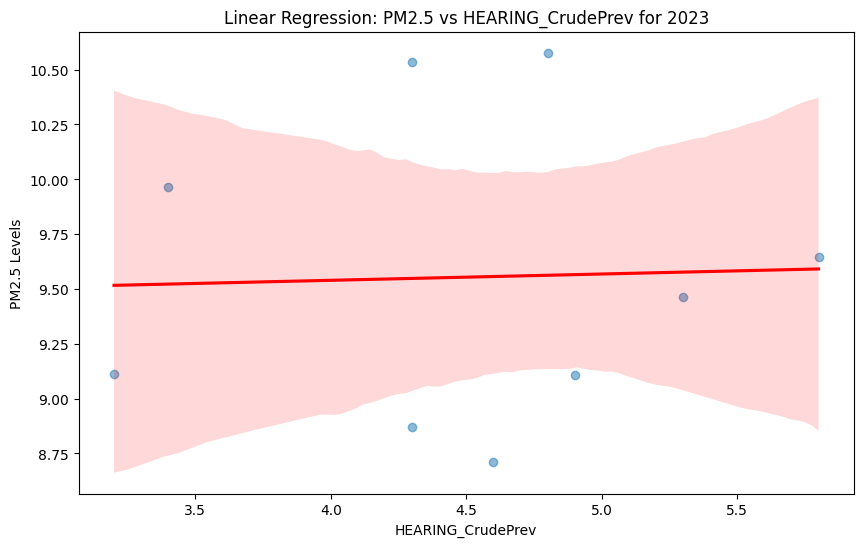

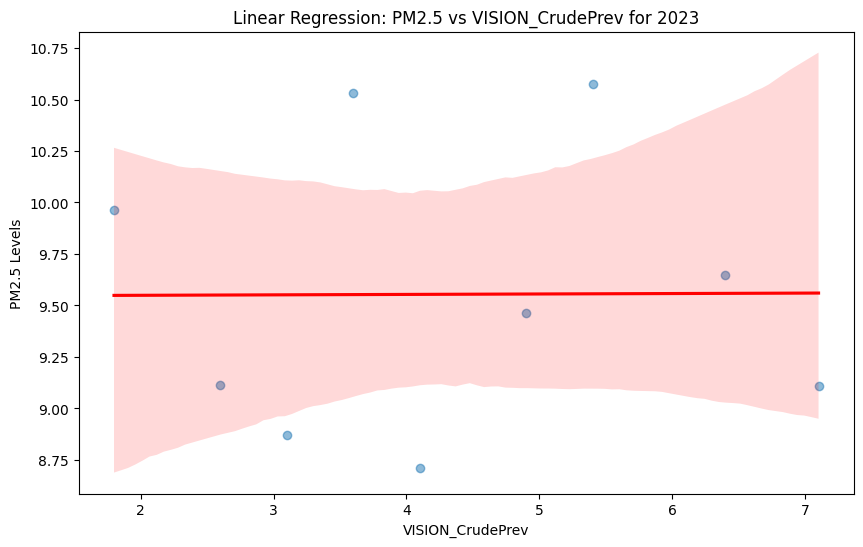

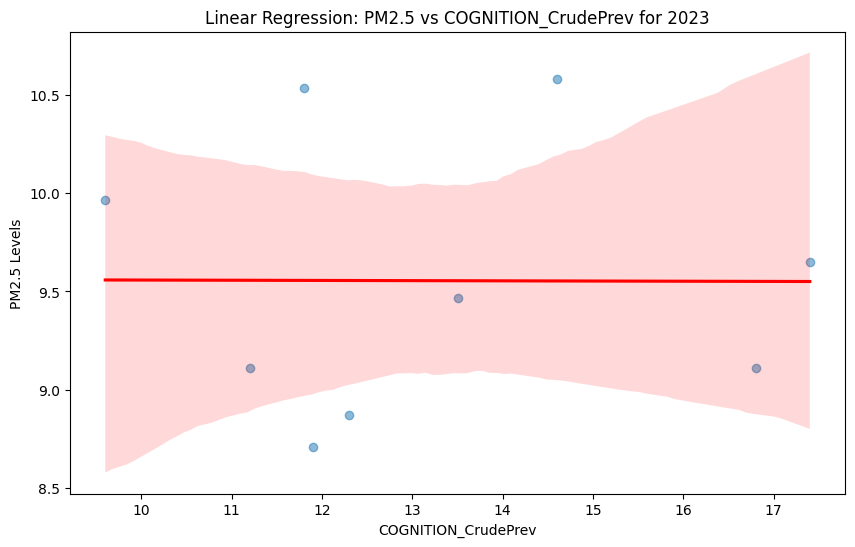

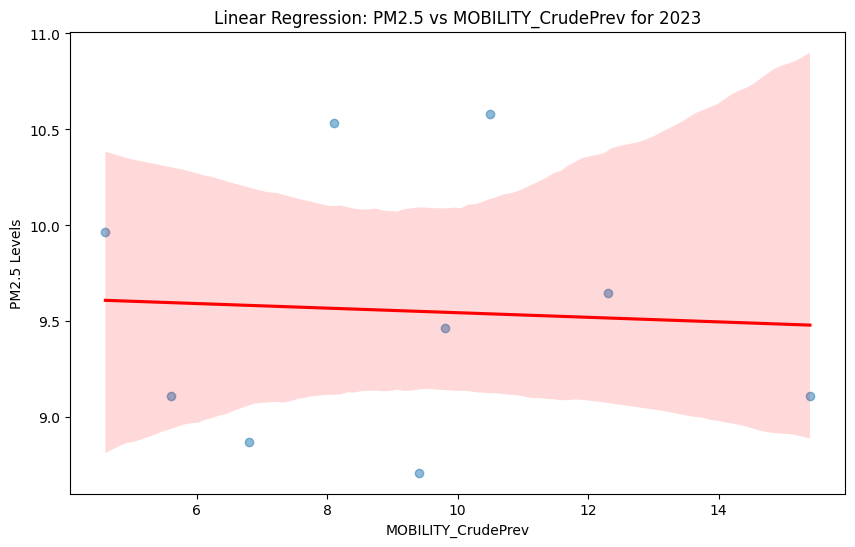

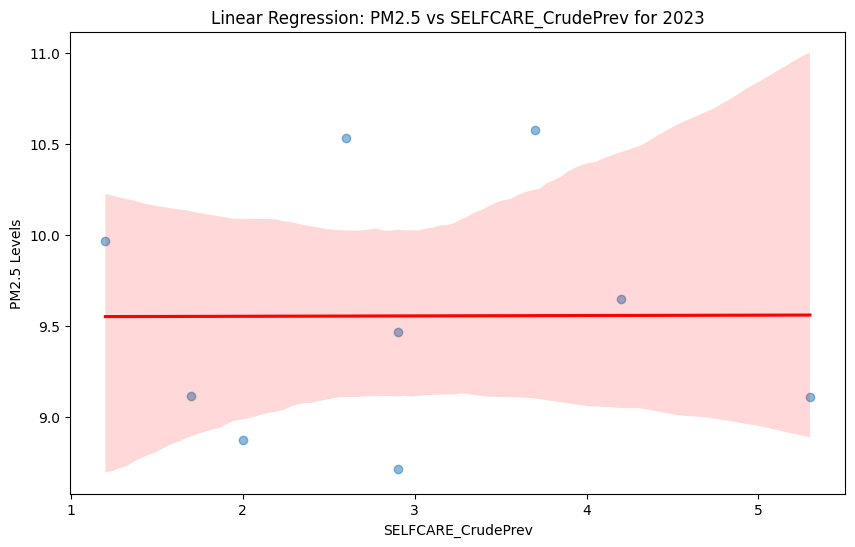

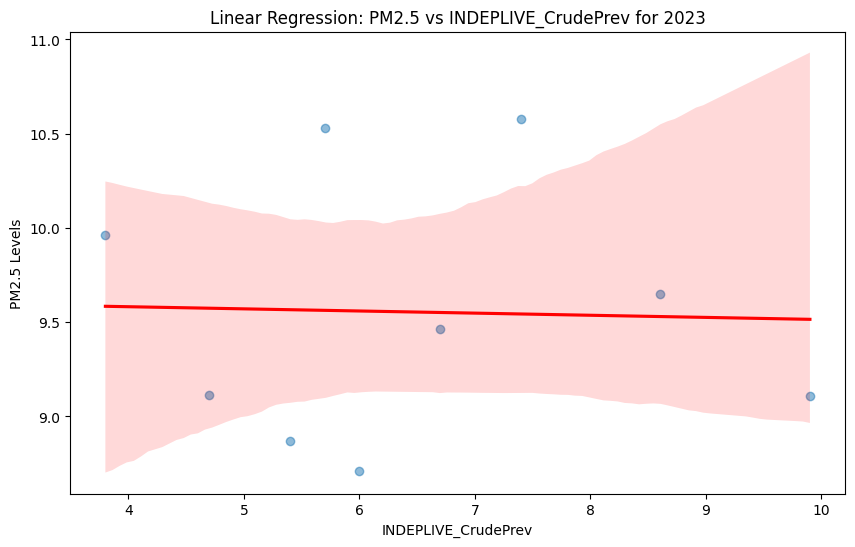

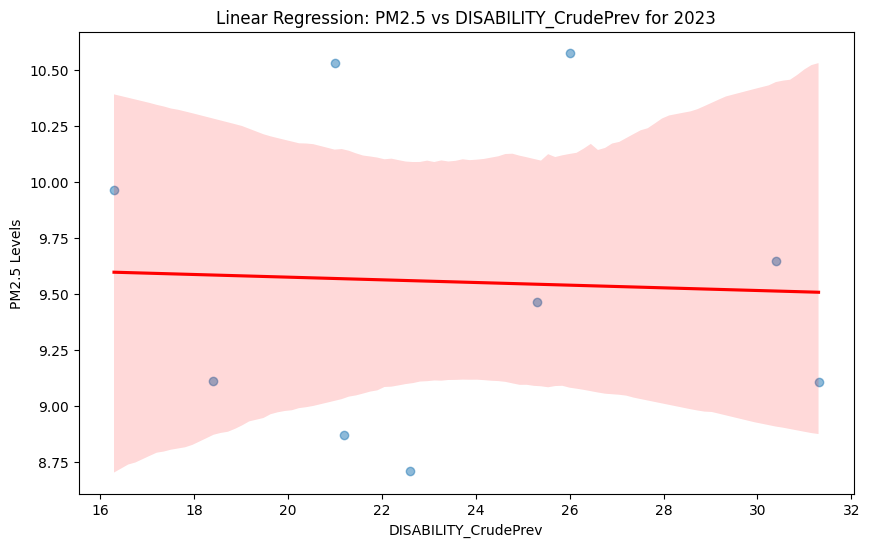

In [9]:
def plot_linear_regression(data, crude_columns, year):
    for column in crude_columns:
        if column != 'PM2.5':
            # Performing linear regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(data[column], data['PM2.5'])

            # Plotting
            plt.figure(figsize=(10, 6))
            sns.regplot(x=column, y='PM2.5', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
            plt.title(f'Linear Regression: PM2.5 vs {column} for {year}')
            plt.xlabel(column)
            plt.ylabel('PM2.5 Levels')
            plt.show()


crude_columns_2023 = [col for col in health_data_2023.columns if 'Crude' in col]

plot_linear_regression(health_data_2023, crude_columns_2023, '2023')


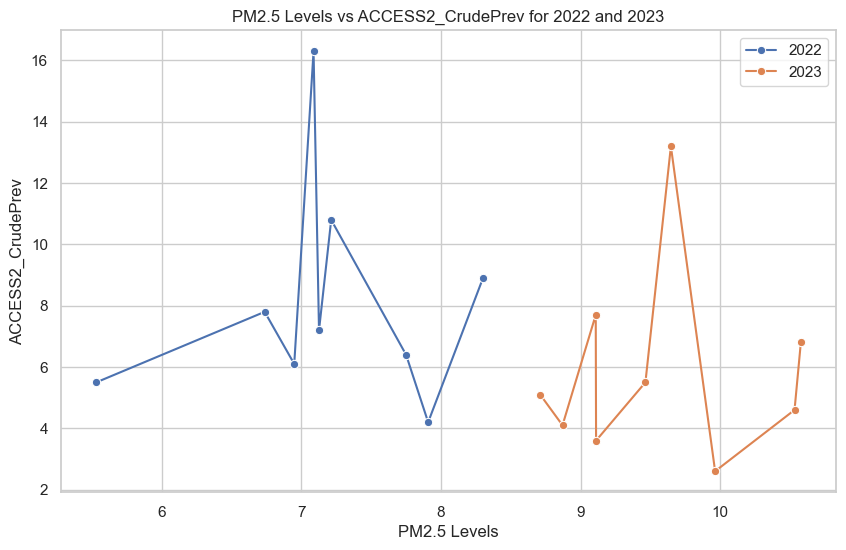

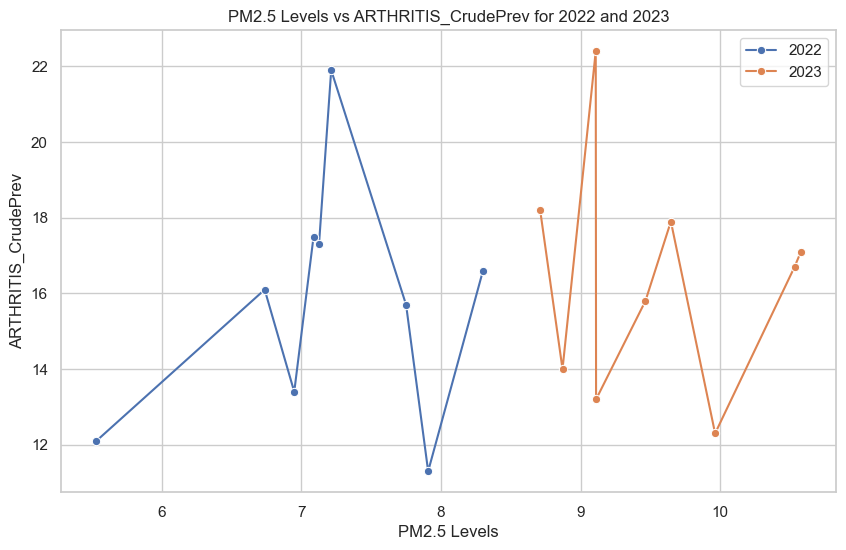

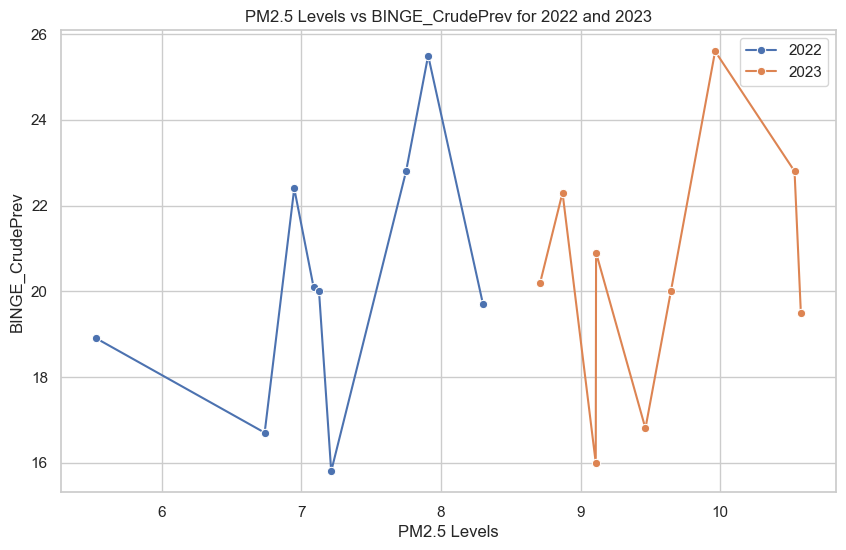

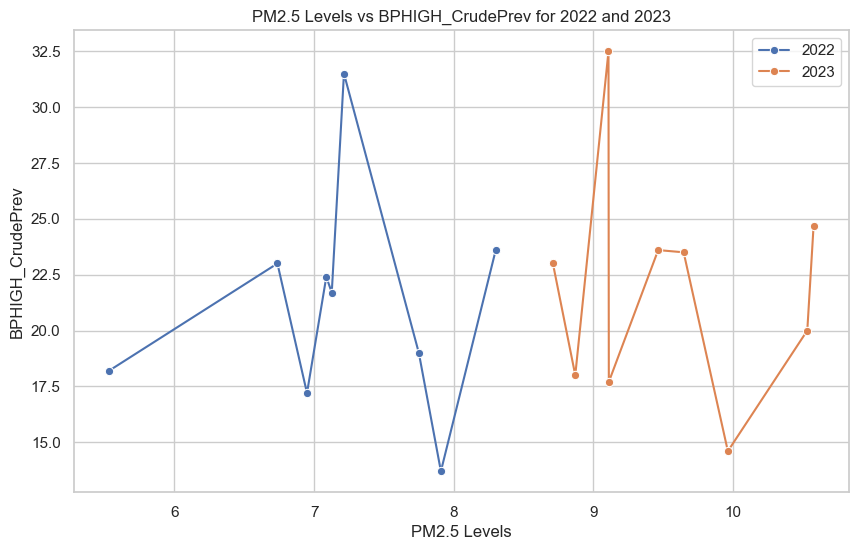

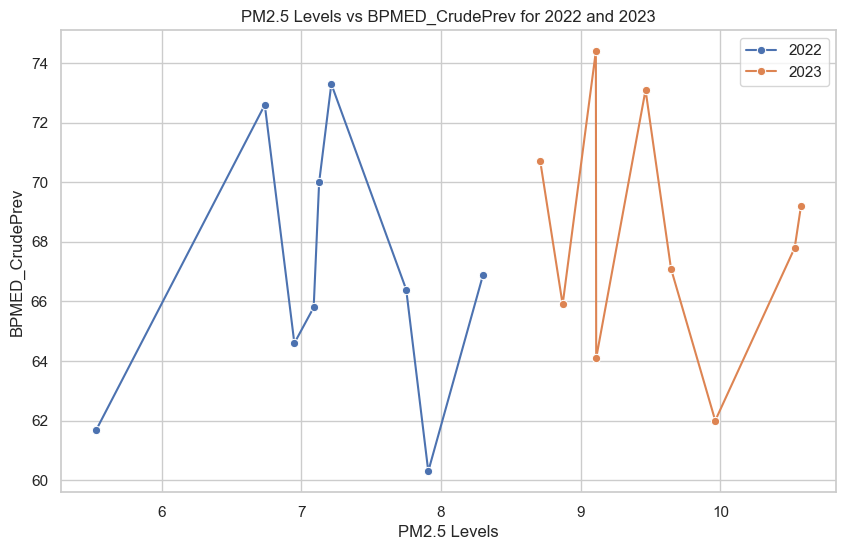

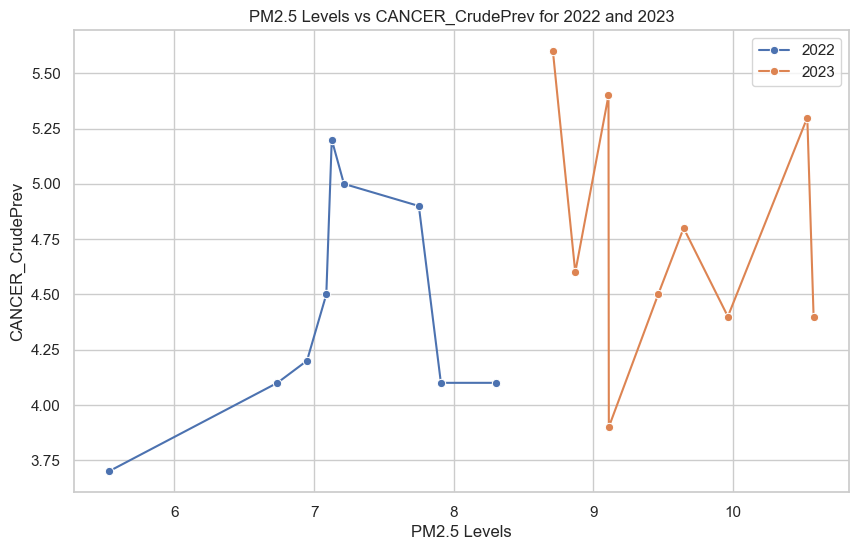

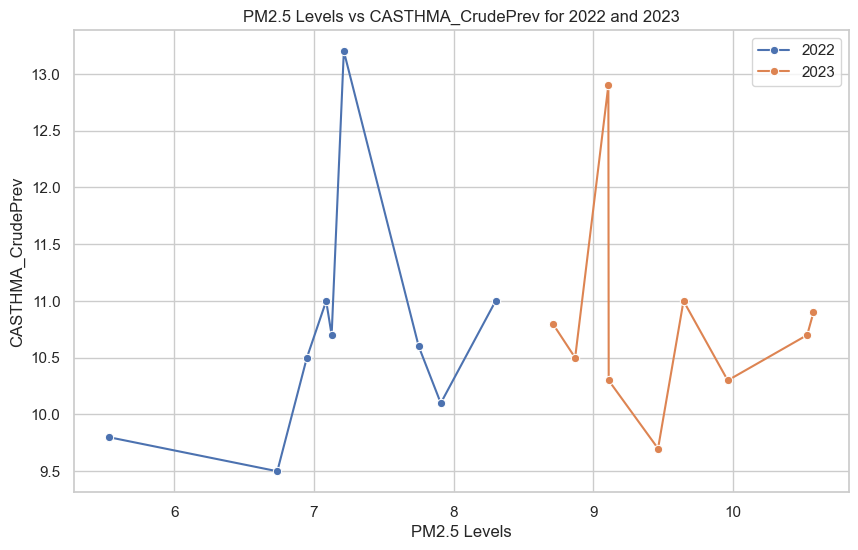

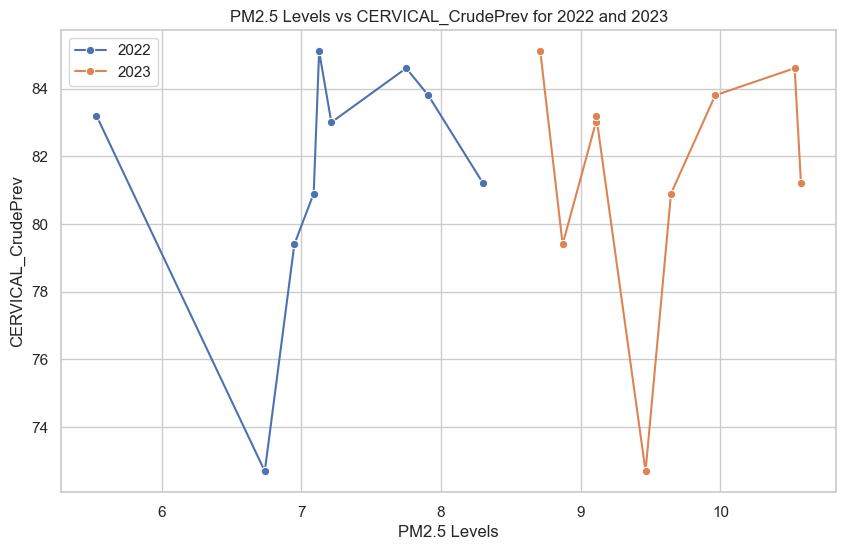

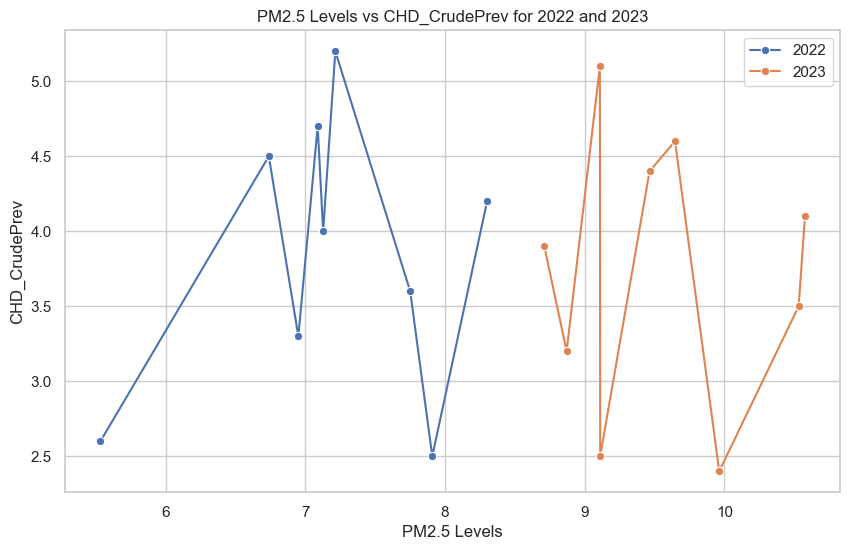

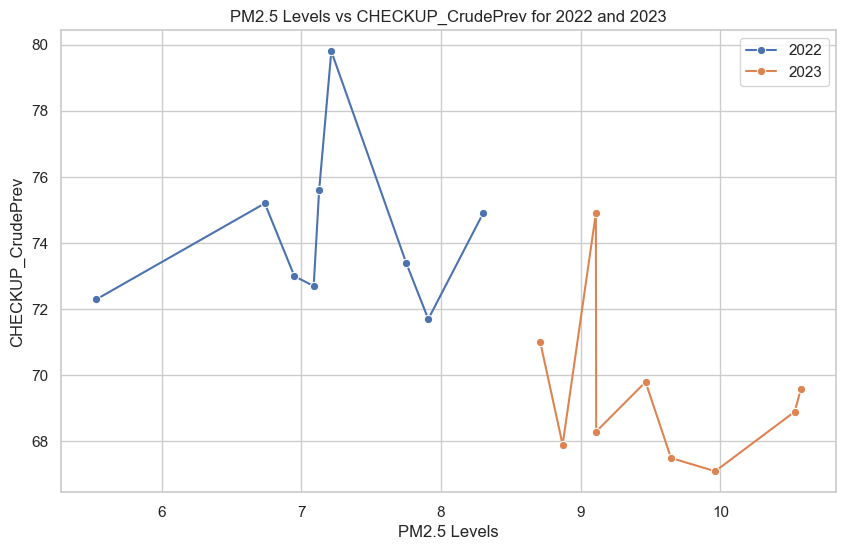

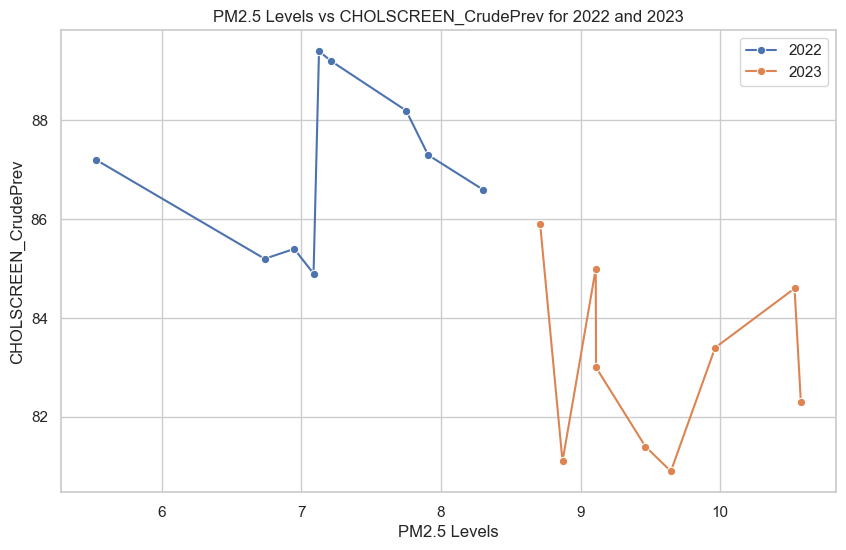

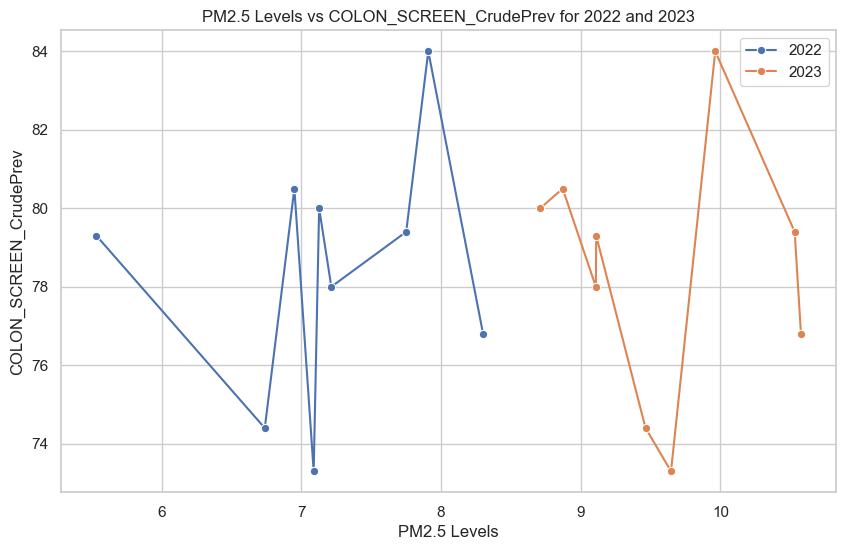

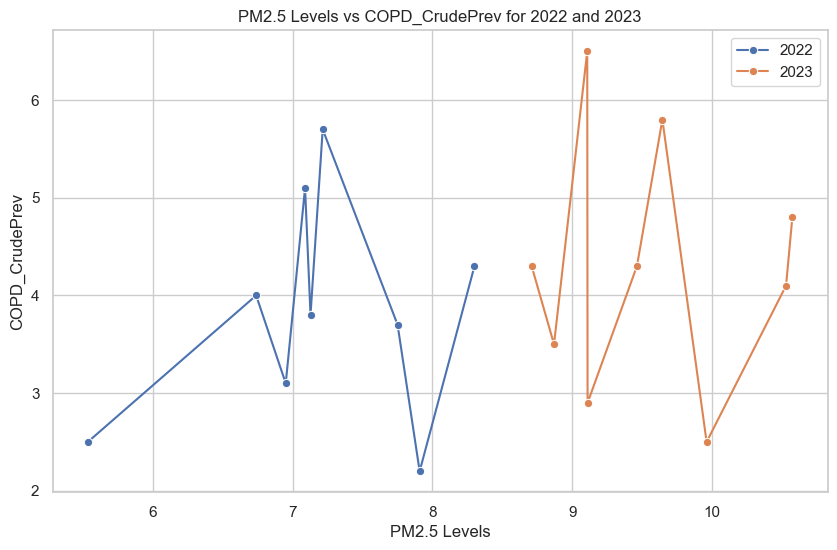

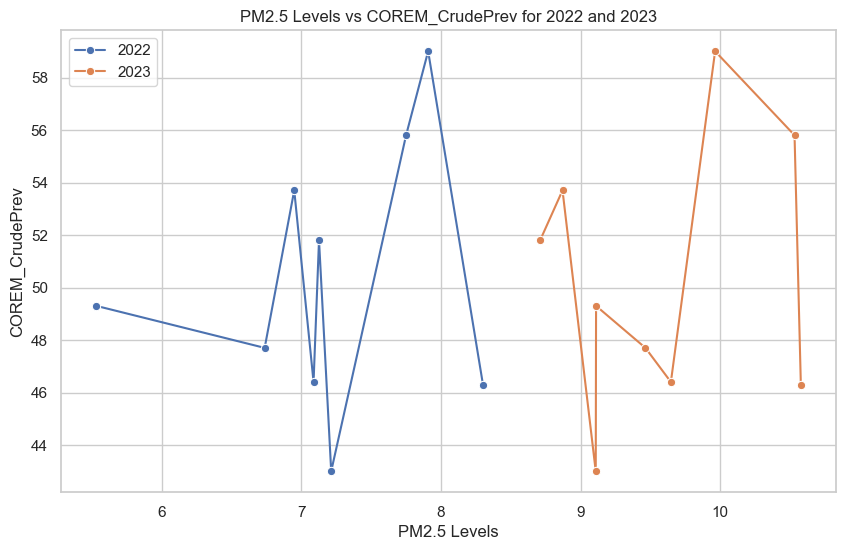

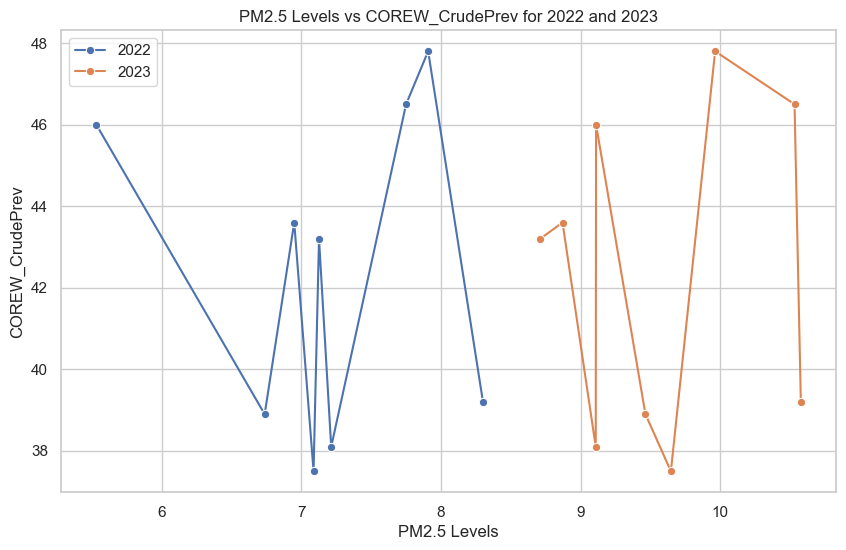

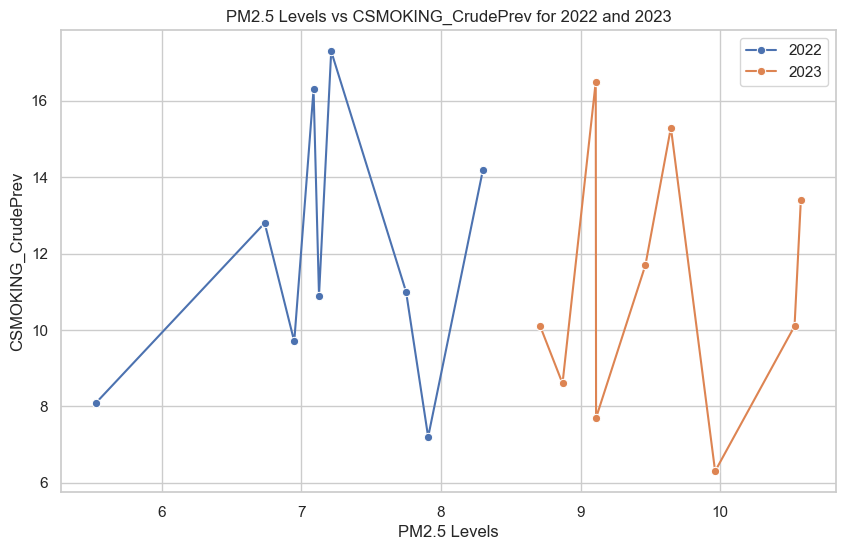

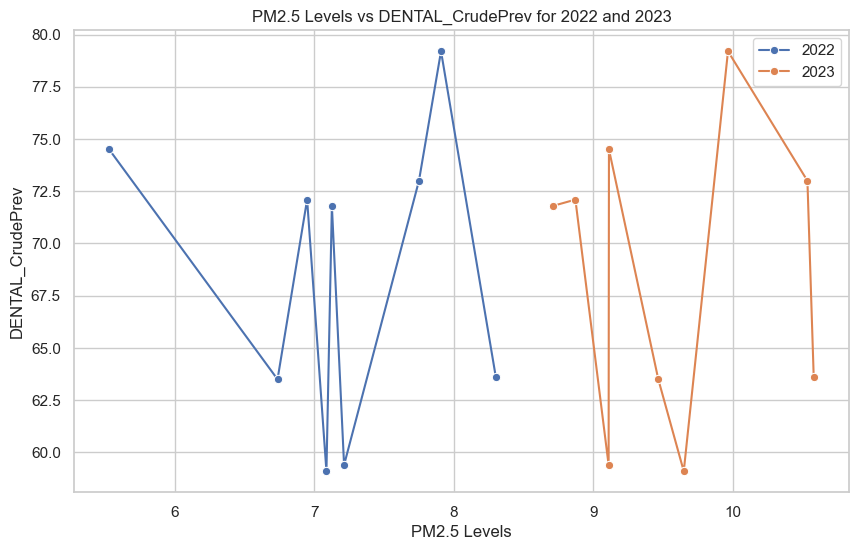

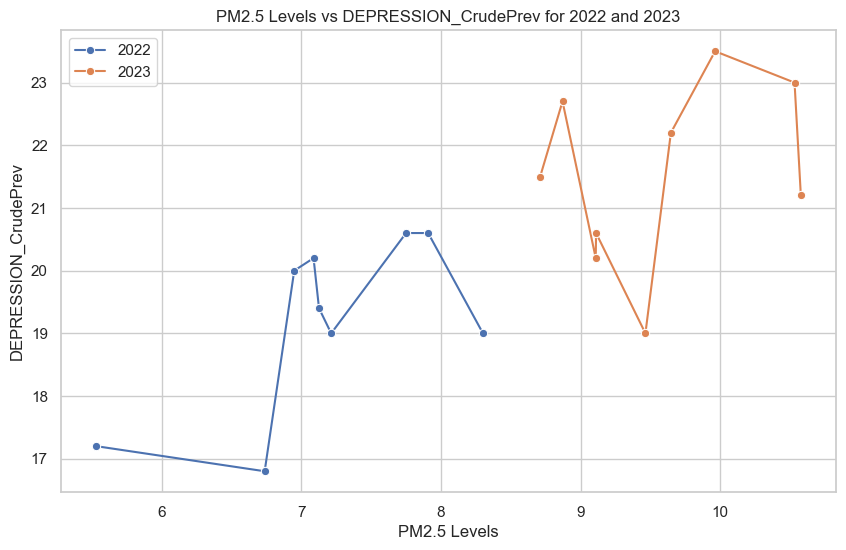

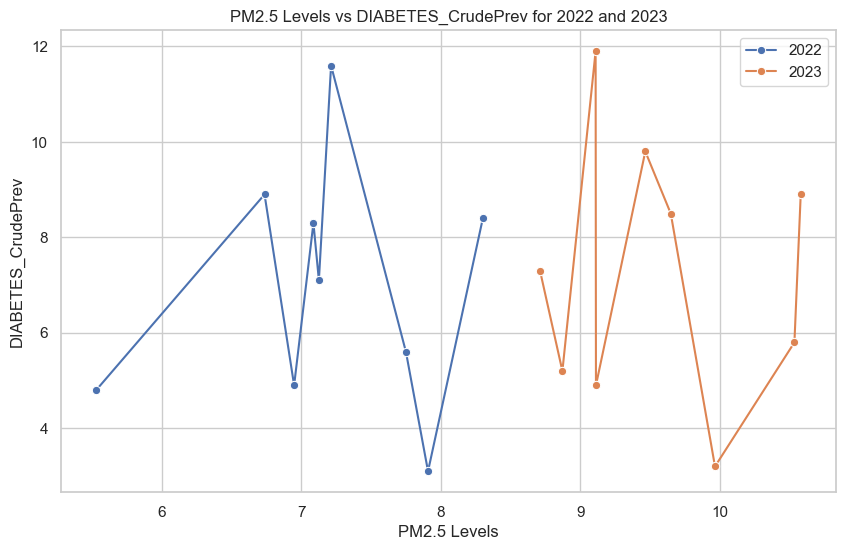

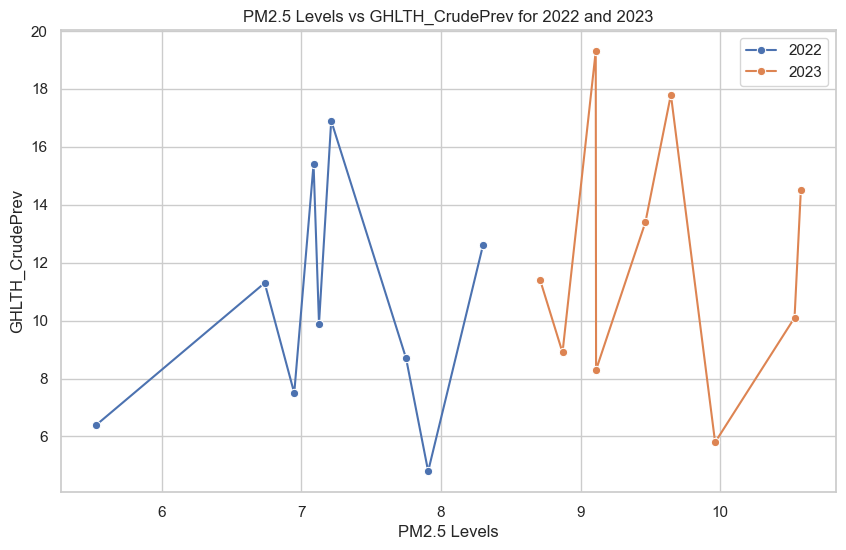

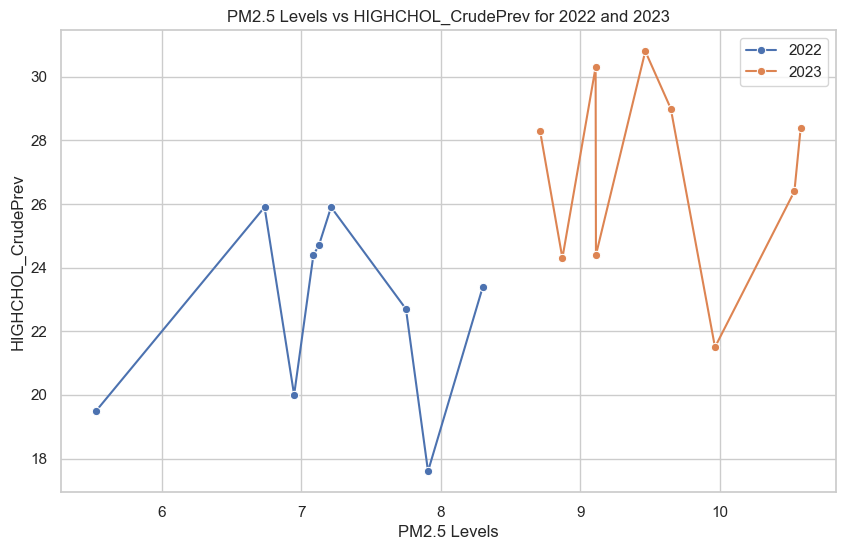

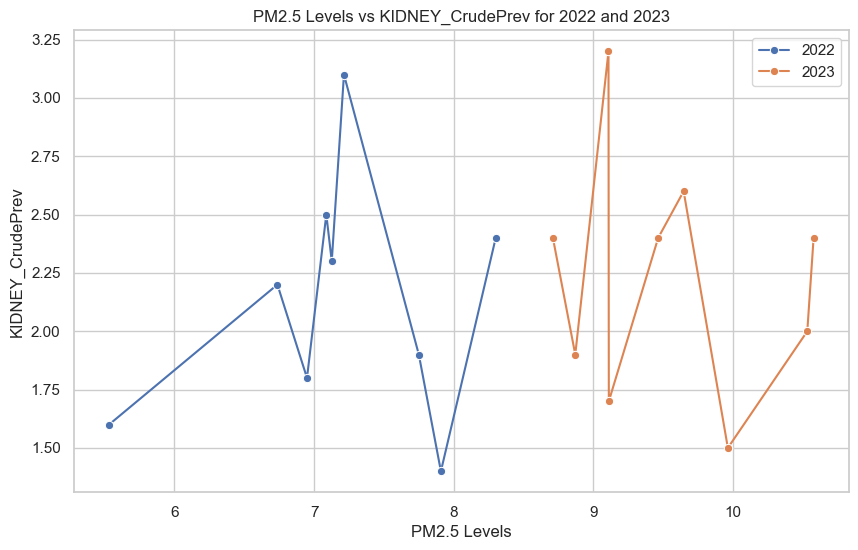

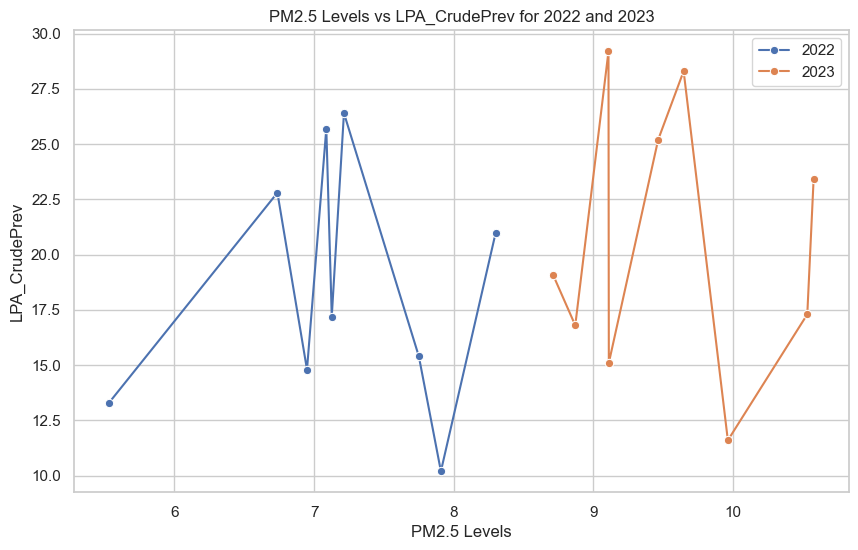

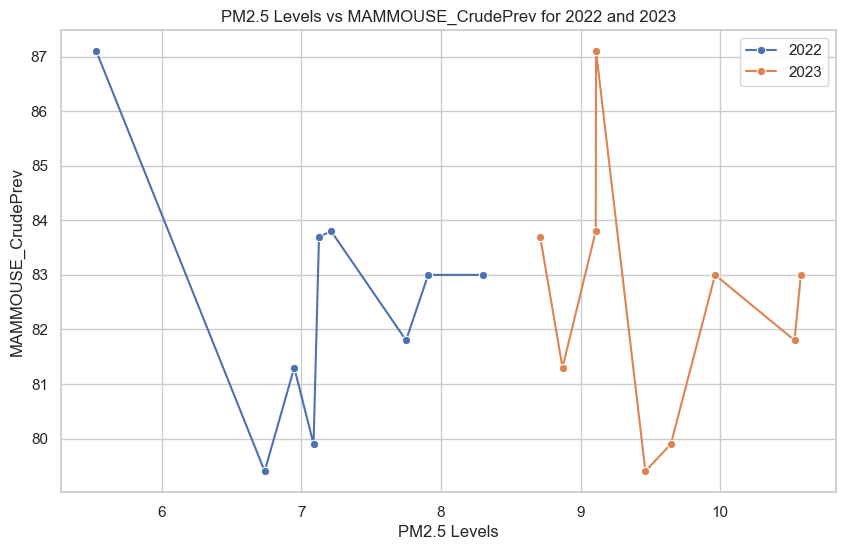

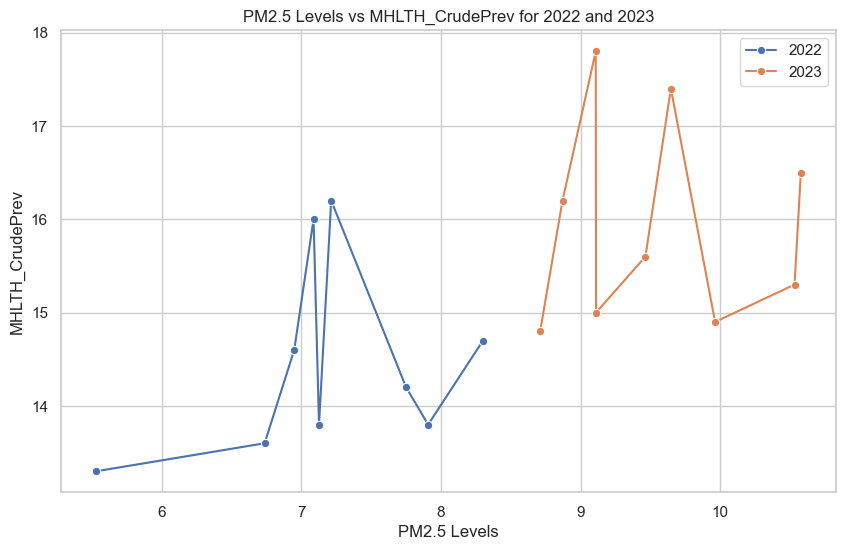

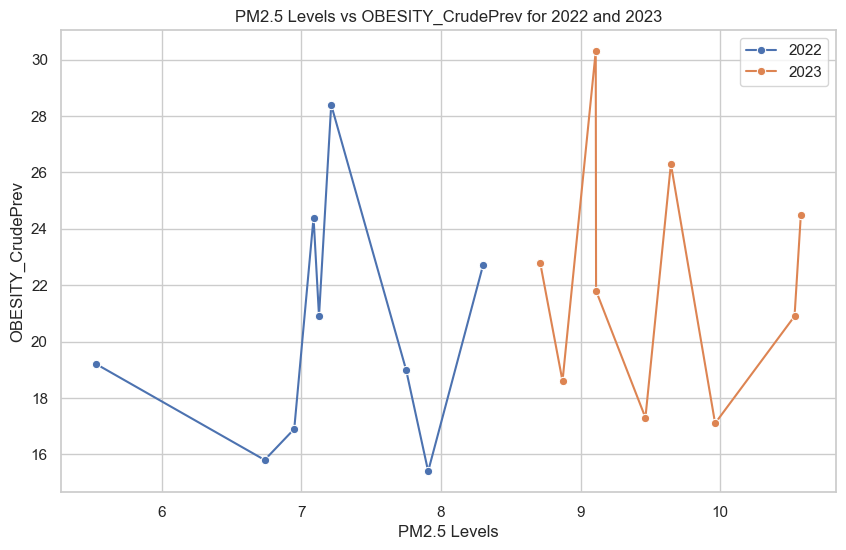

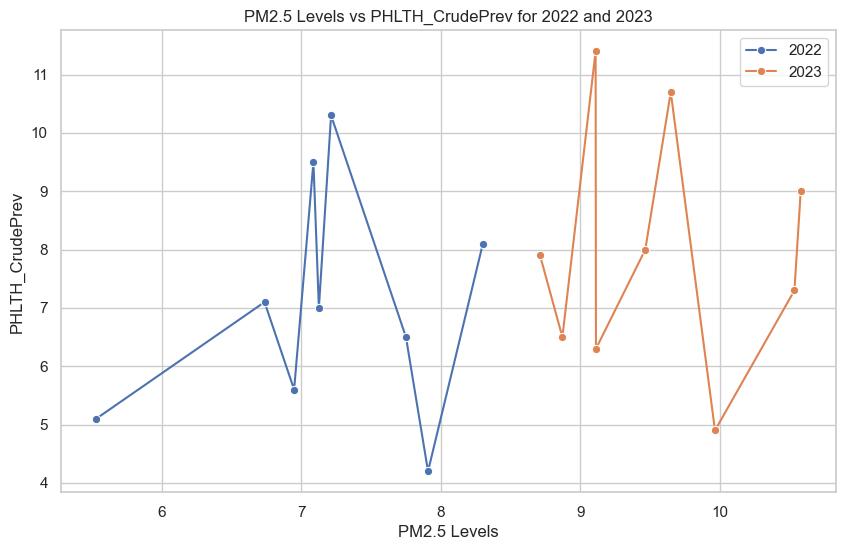

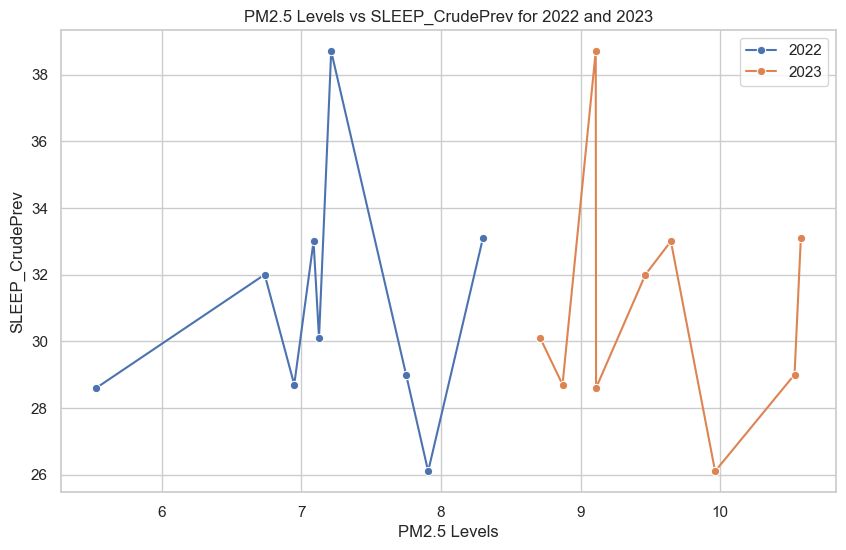

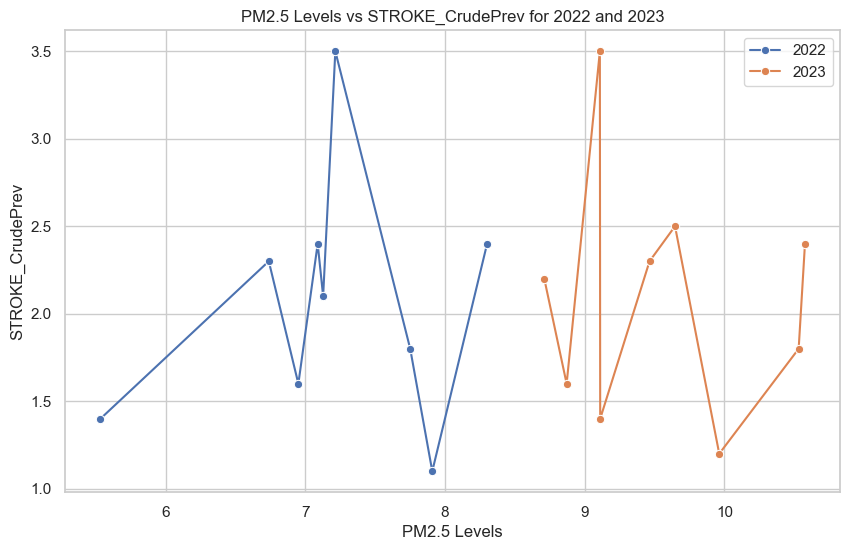

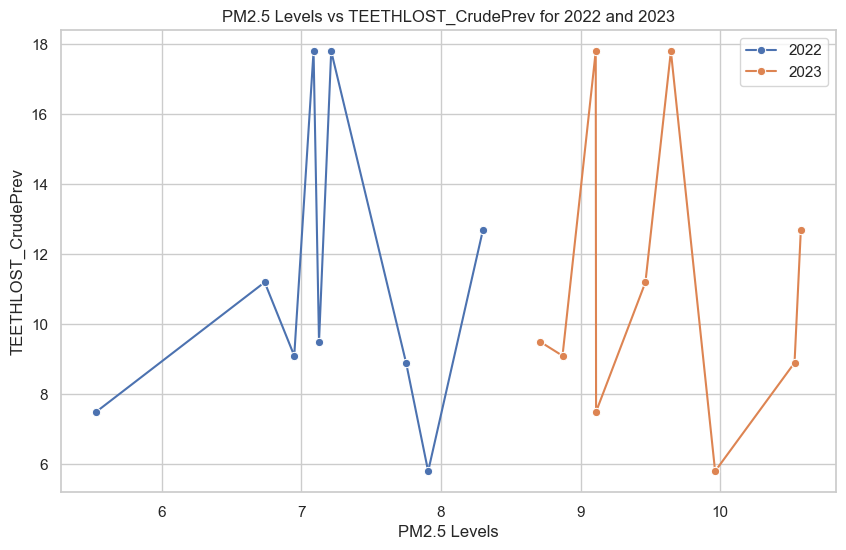

In [37]:
health_data_2023_renamed = health_data_2023.rename(columns=lambda x: x.replace('_2023', '_2022') if '_2023' in x else x)

# Merging the datasets again with corrected column names
merged_health_data_corrected = pd.merge(health_data_2022, health_data_2023_renamed, on='Zipcode', suffixes=('_2022', '_2023'))

# Plotting line graphs for each crude rate against PM2.5 level for 2022 and 2023
for column in crude_columns_2022:
    if 'Crude' in column:
        plt.figure(figsize=(10, 6))

        # Plotting for 2022
        sns.lineplot(x=merged_health_data_corrected['PM2.5_2022'], y=merged_health_data_corrected[column + '_2022'], marker='o', label='2022')

        # Plotting for 2023
        sns.lineplot(x=merged_health_data_corrected['PM2.5_2023'], y=merged_health_data_corrected[column + '_2023'], marker='o', label='2023')

        plt.title(f'PM2.5 Levels vs {column} for 2022 and 2023')
        plt.xlabel('PM2.5 Levels')
        plt.ylabel(column)
        plt.legend()
        plt.show()

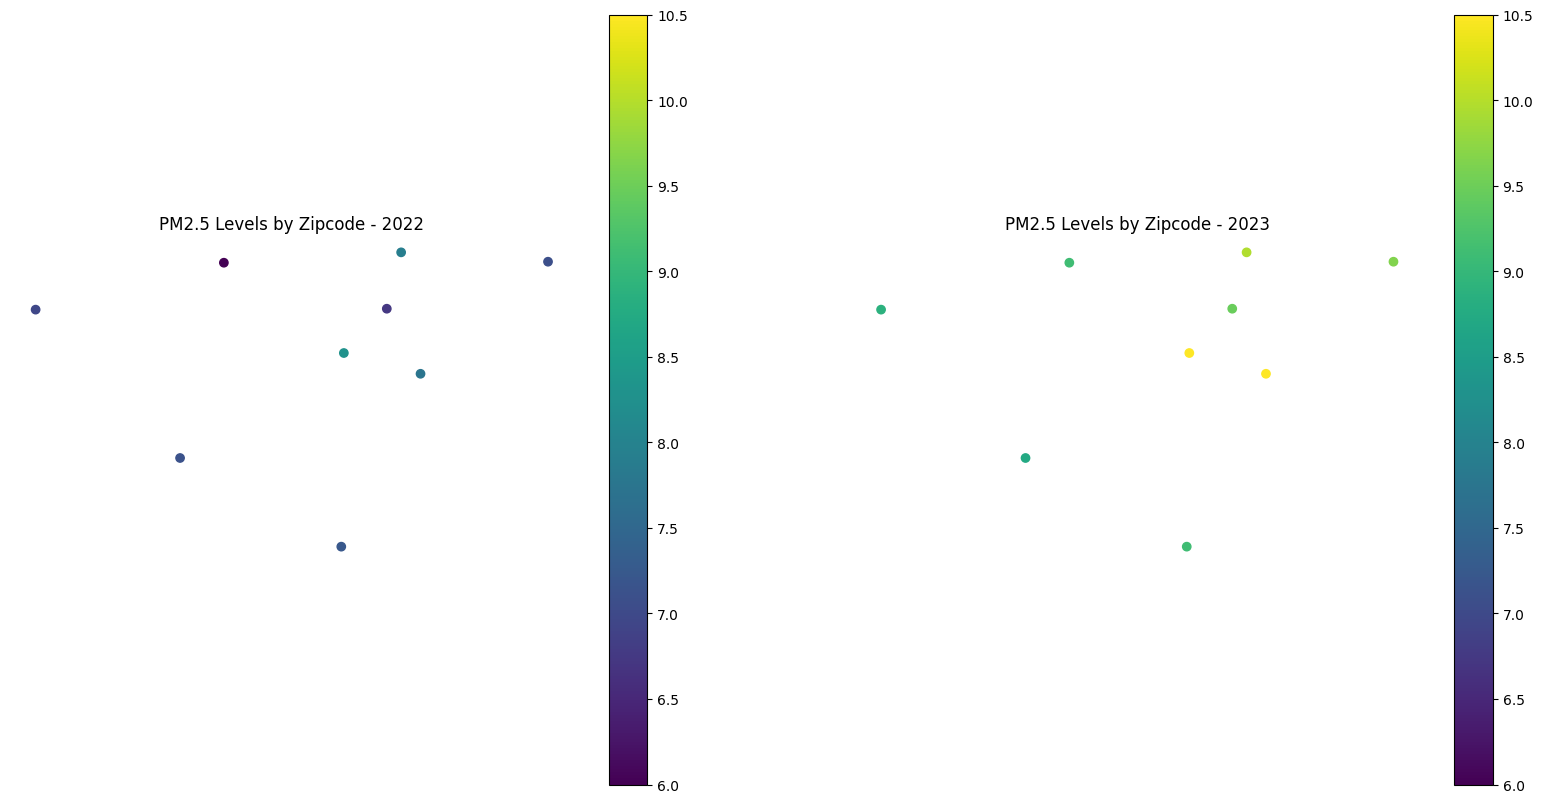

In [10]:
health_data_2022['geometry'] = health_data_2022['Geolocation'].apply(wkt.loads)
health_data_2023['geometry'] = health_data_2023['Geolocation'].apply(wkt.loads)

# Creating GeoDataFrame
geo_data_2022 = gpd.GeoDataFrame(health_data_2022, geometry='geometry')
geo_data_2023 = gpd.GeoDataFrame(health_data_2023, geometry='geometry')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Map for 2022
geo_data_2022.plot(column='PM2.5', cmap='viridis', legend=True, ax=ax[0], vmin=6.0, vmax=10.5)
ax[0].set_title('PM2.5 Levels by Zipcode - 2022')
ax[0].set_axis_off()

# Map for 2023
geo_data_2023.plot(column='PM2.5', cmap='viridis', legend=True, ax=ax[1], vmin=6.0, vmax=10.5)
ax[1].set_title('PM2.5 Levels by Zipcode - 2023')
ax[1].set_axis_off()

plt.show()

In [11]:
cohort_data = pd.merge(health_data_2022, health_data_2023, on='Zipcode', suffixes=('_2022', '_2023'))

# Preparing data for heatmap
cohort_data_comparison = cohort_data.copy()
for col in health_data_2022.columns:
    if 'Crude' in col or col == 'PM2.5':
        cohort_data_comparison[f'{col}_Change'] = cohort_data_comparison[f'{col}_2023'] - cohort_data_comparison[f'{col}_2022']

# Function to plot bar graphs for a selected health indicator
def plot_bar_graph_for_crude_rate(selected_rate):
    # Extracting relevant data
    data = cohort_data_comparison[['Zipcode', f'{selected_rate}_Change', 'PM2.5_Change']]

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 8))
    data.set_index('Zipcode').plot(kind='bar', ax=ax)
    ax.set_title(f'Change in {selected_rate} and PM2.5 Levels by Zipcode (2022 to 2023)')
    ax.set_xlabel('Zipcode')
    ax.set_ylabel('Change')
    plt.xticks(rotation=45)
    plt.show()

# Dropdown menu for selecting the crude rate
crude_rates = [col.replace('_2022', '').replace('_Change', '') for col in cohort_data_comparison.columns if 'Crude' in col and '_Change' in col]
dropdown = Dropdown(options=crude_rates, description='Select Crude Rate:')

# Interactive widget
interact(plot_bar_graph_for_crude_rate, selected_rate=dropdown)

interactive(children=(Dropdown(description='Select Crude Rate:', options=('ACCESS2_CrudePrev', 'ARTHRITIS_Crud…

<function __main__.plot_bar_graph_for_crude_rate(selected_rate)>

# Boston - Analysis

In [21]:
boston_df = pd.read_csv('../Merged_Data/Boston_Health_20_23.csv')

/var/folders/wb/xzynz9w52kgcmqngk1sh79p40000gn/T/ipykernel_34746/3302478923.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="pm25", data=boston_df, palette="coolwarm")


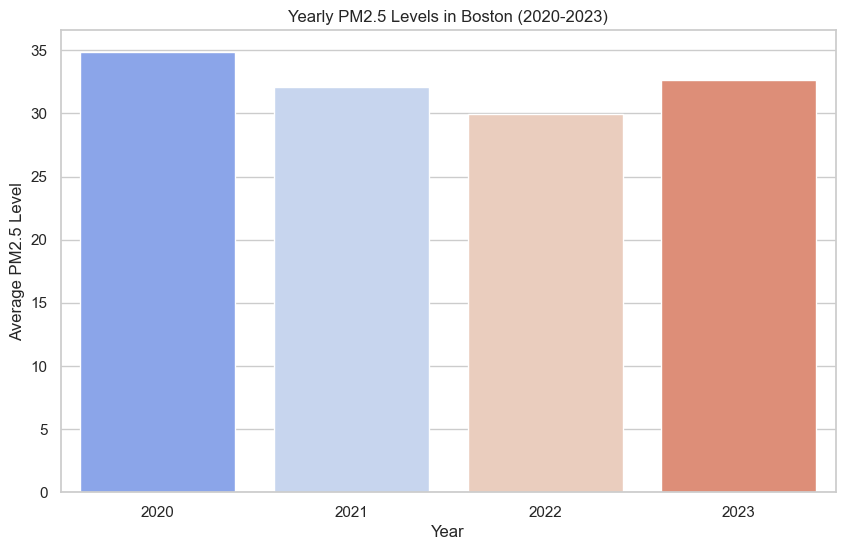

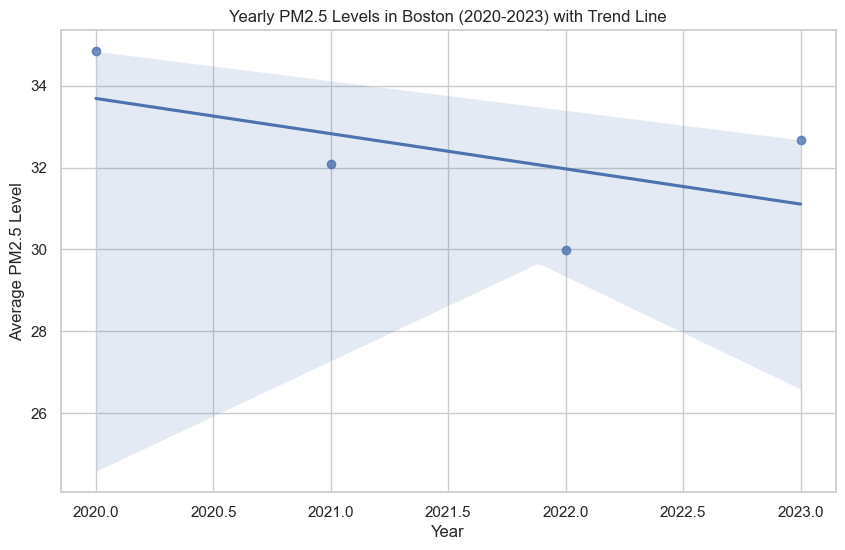

In [32]:
sns.set(style="whitegrid")

# Plotting PM2.5 levels for each year
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="pm25", data=boston_df, palette="coolwarm")
plt.title("Yearly PM2.5 Levels in Boston (2020-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x="Year", y="pm25", data=boston_df, color='b', marker='o')

# Enhancing the plot
plt.title("Yearly PM2.5 Levels in Boston (2020-2023) with Trend Line")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.show()

/var/folders/wb/xzynz9w52kgcmqngk1sh79p40000gn/T/ipykernel_34746/1724919738.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_pm25.values, y=correlations_pm25.index, palette="vlag")


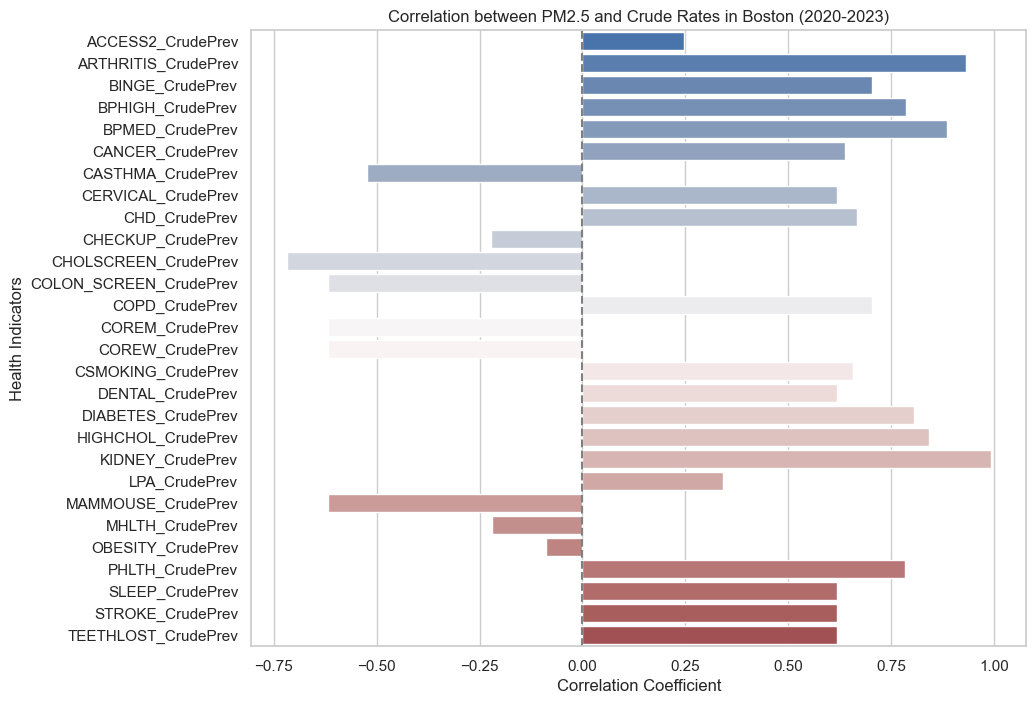

In [33]:
crude_columns = [col for col in boston_df.columns if 'Crude' in col]
crude_columns.append('pm25')

# Calculating the correlation matrix for the specified columns in boston_df
correlation_matrix = boston_df[crude_columns].corr()

# Extracting correlations with pm25, excluding the self-correlation of pm25
correlations_pm25 = correlation_matrix['pm25'].drop('pm25')

# Creating a bar plot to visualize the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_pm25.values, y=correlations_pm25.index, palette="vlag")
plt.title('Correlation between PM2.5 and Crude Rates in Boston (2020-2023)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Health Indicators')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

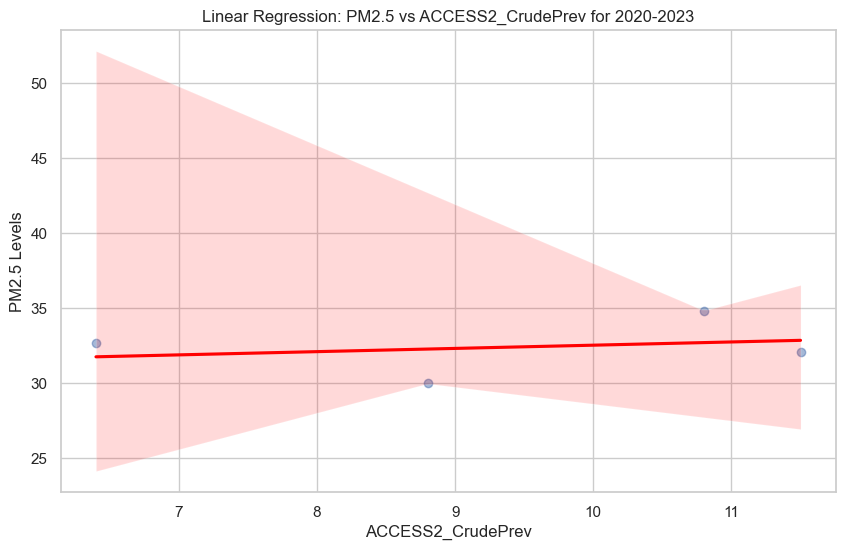

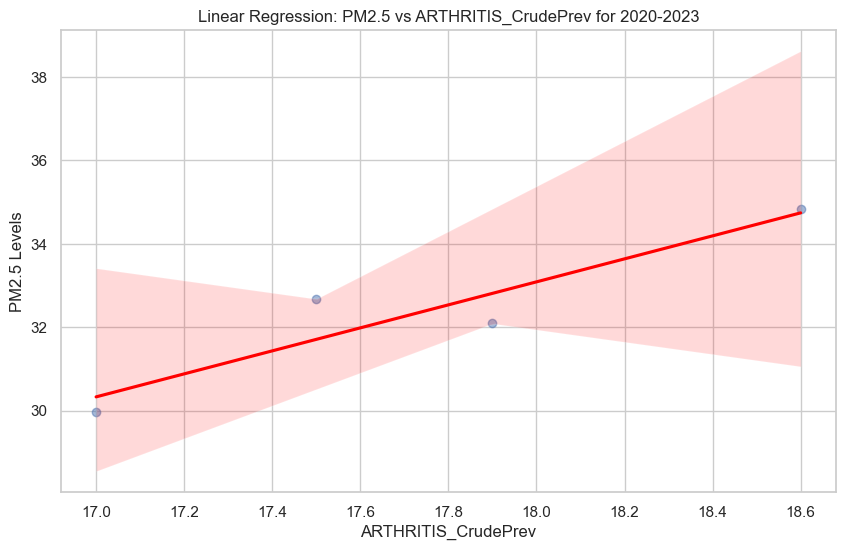

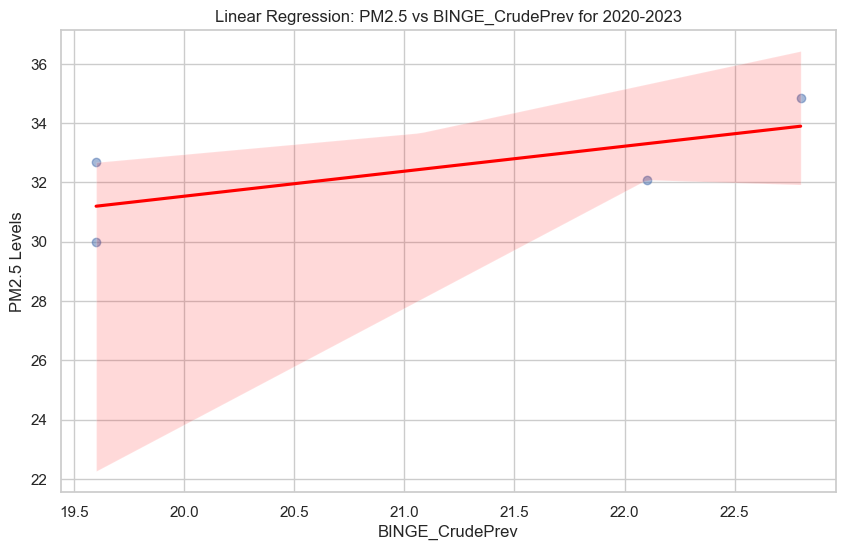

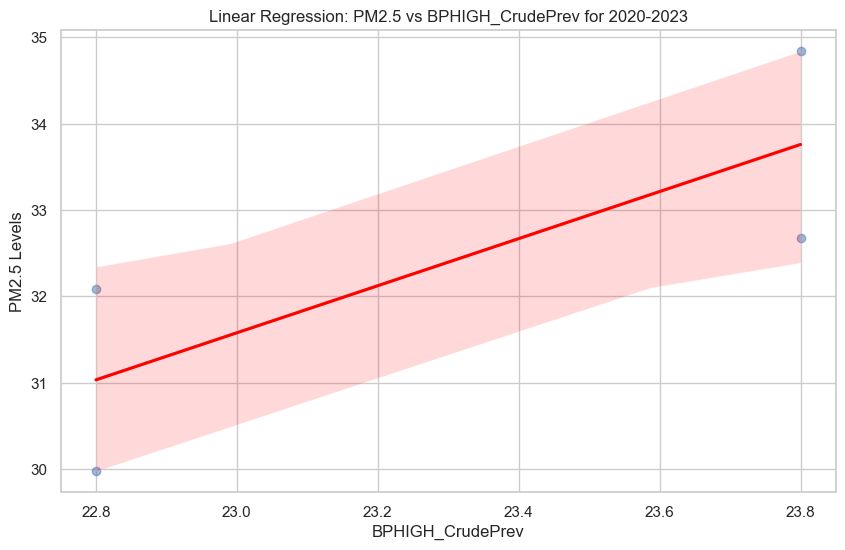

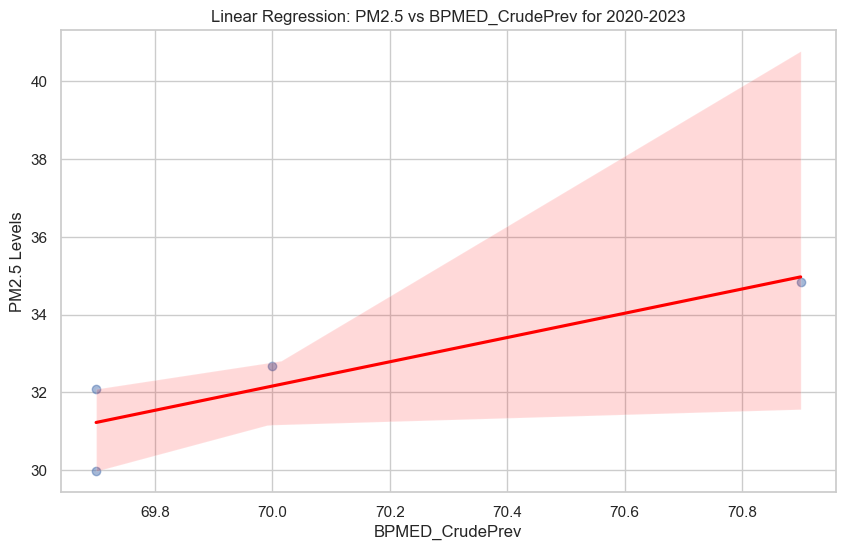

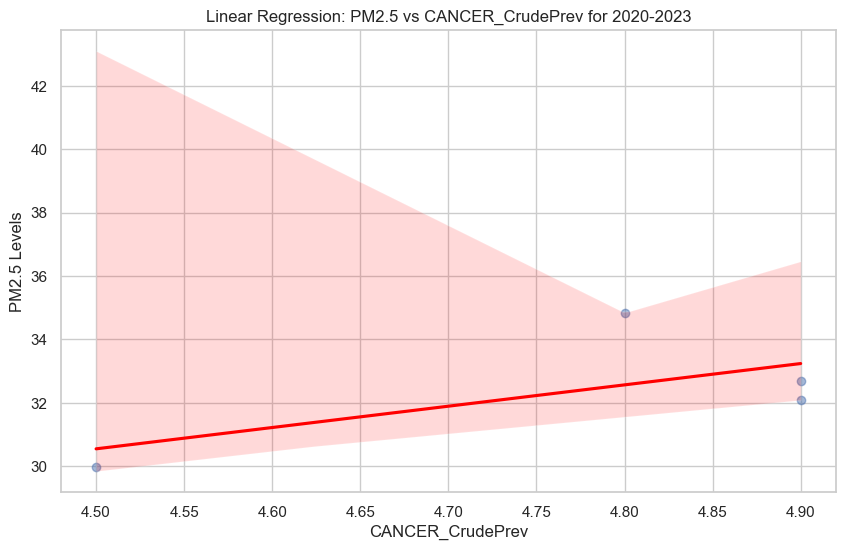

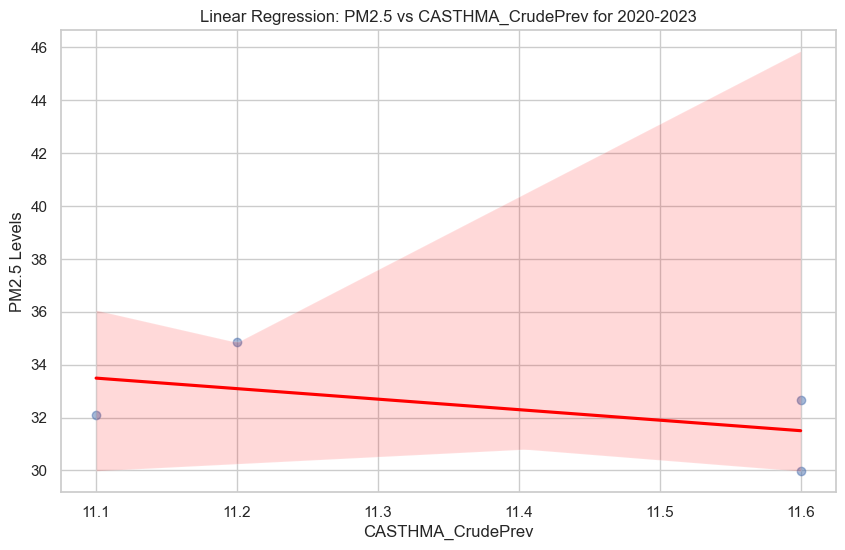

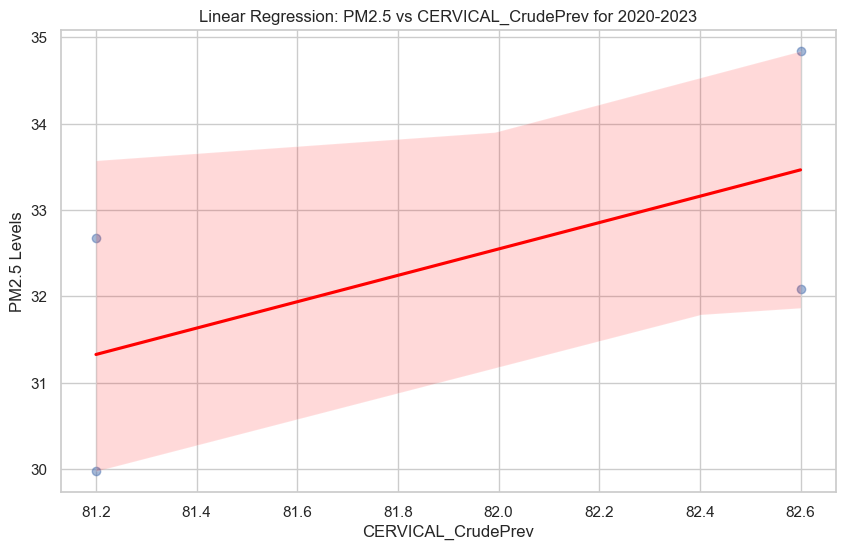

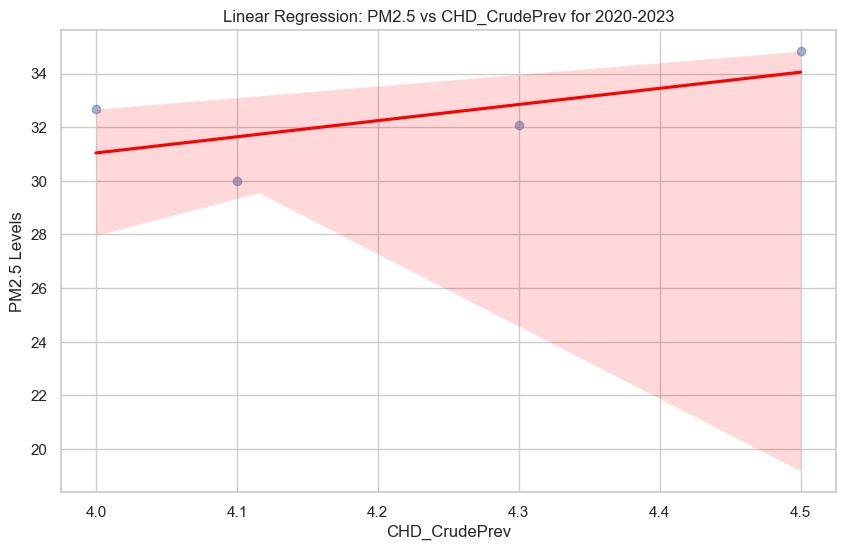

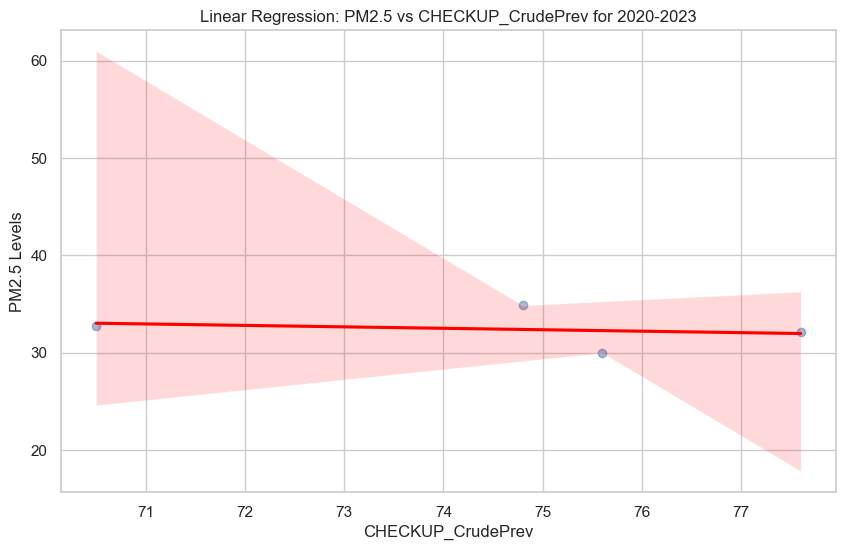

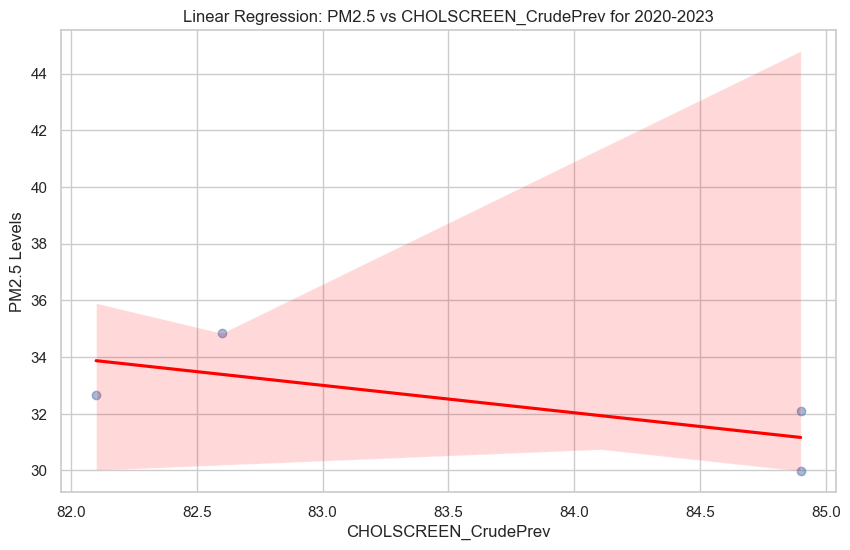

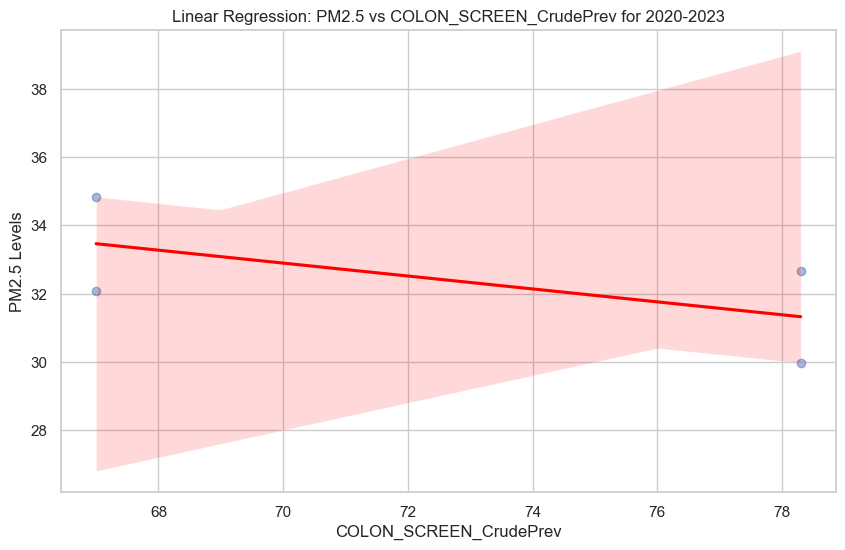

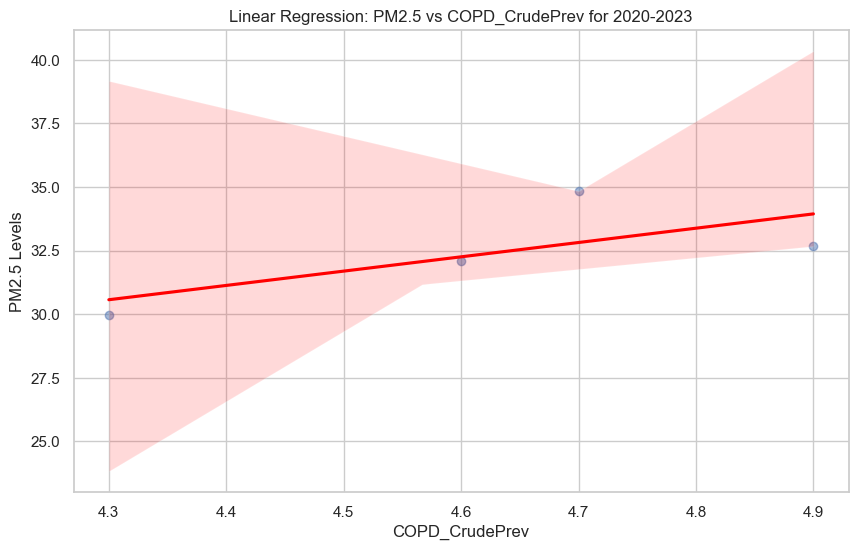

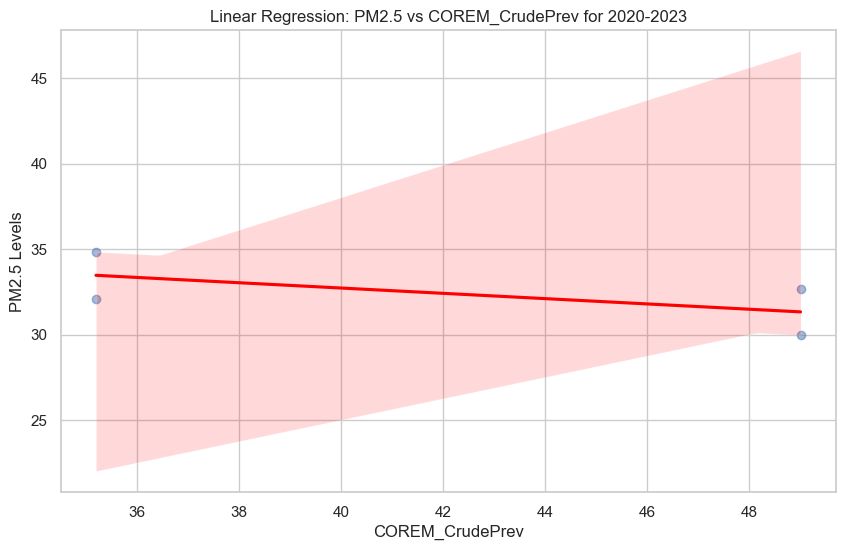

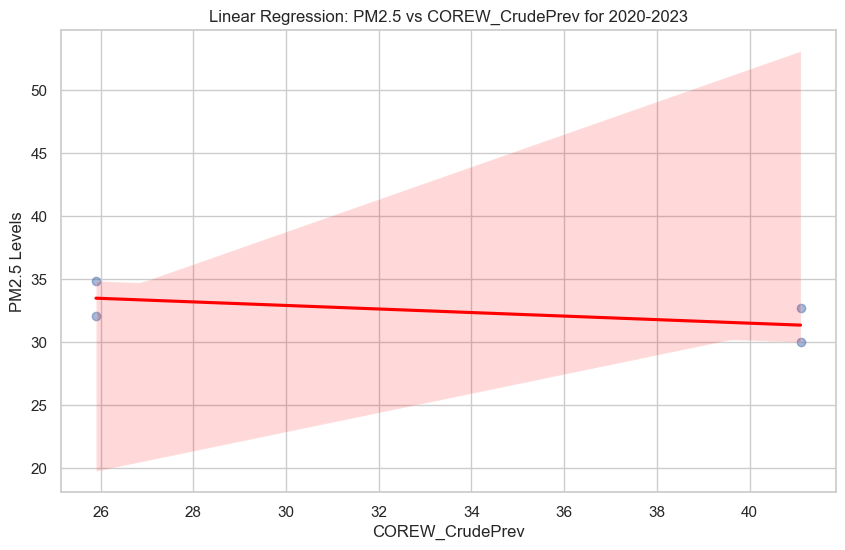

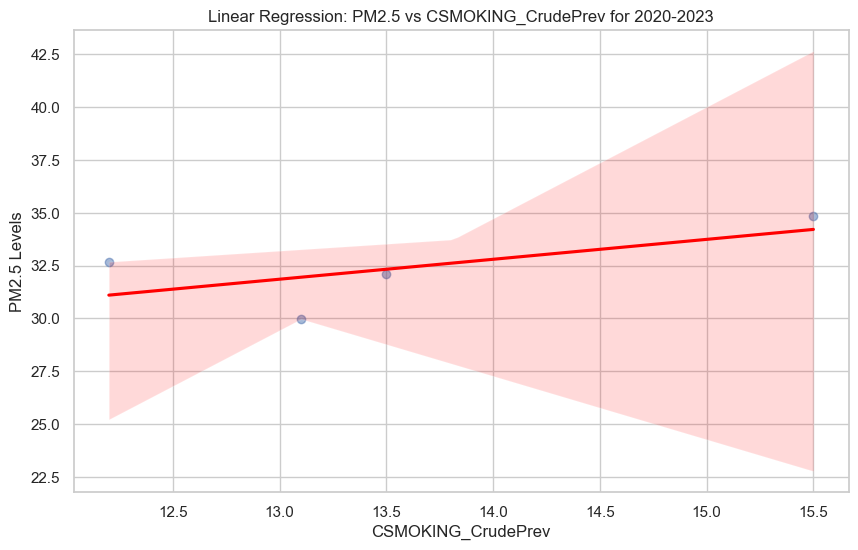

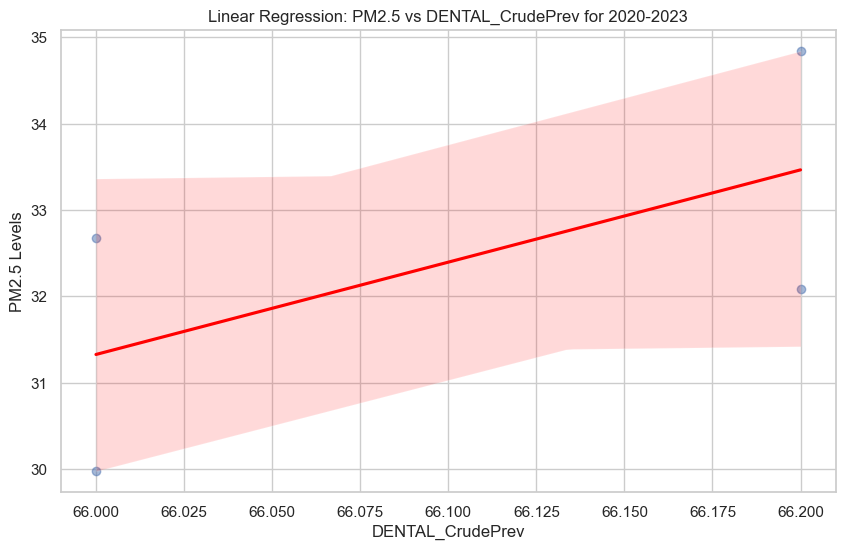

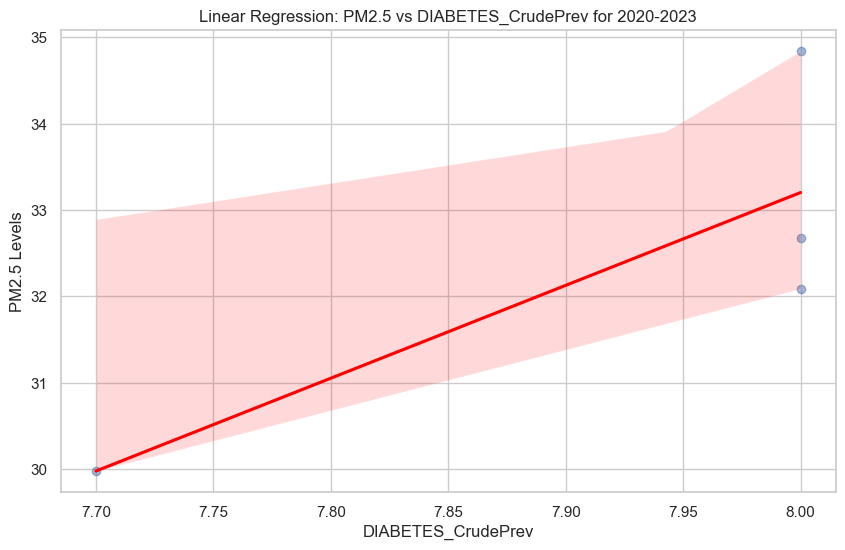

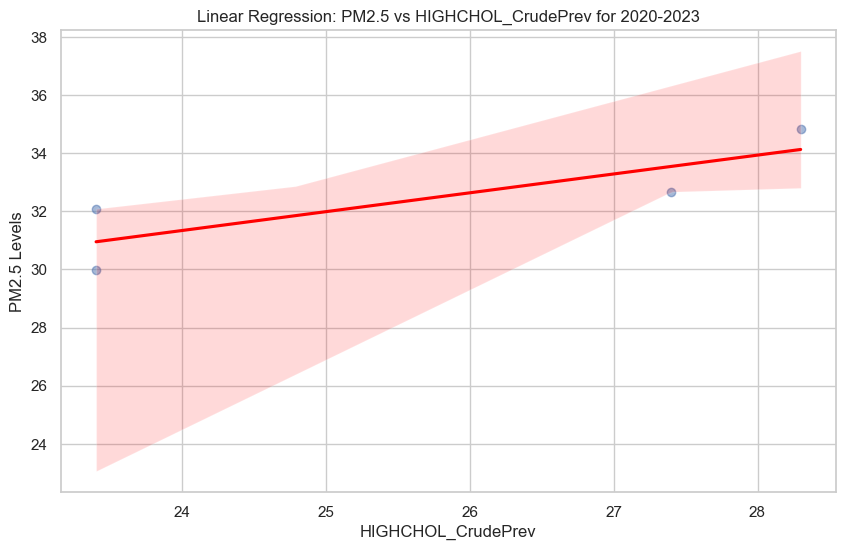

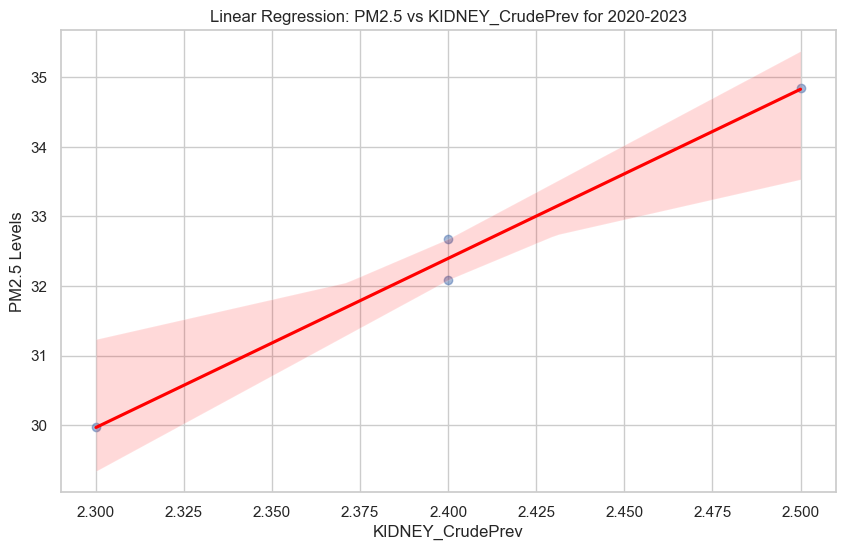

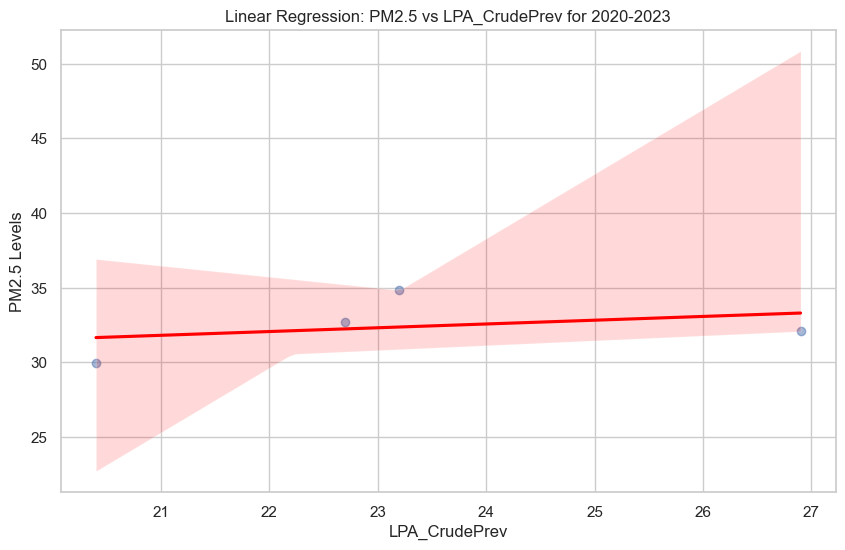

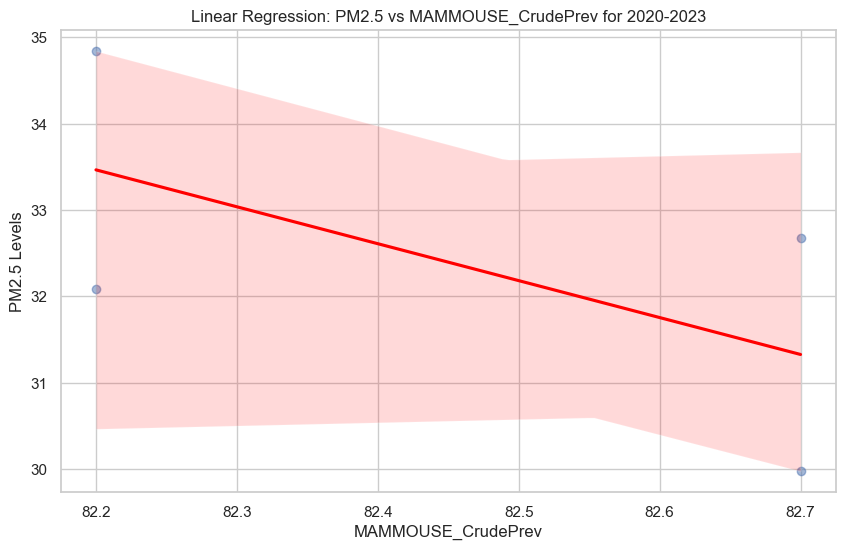

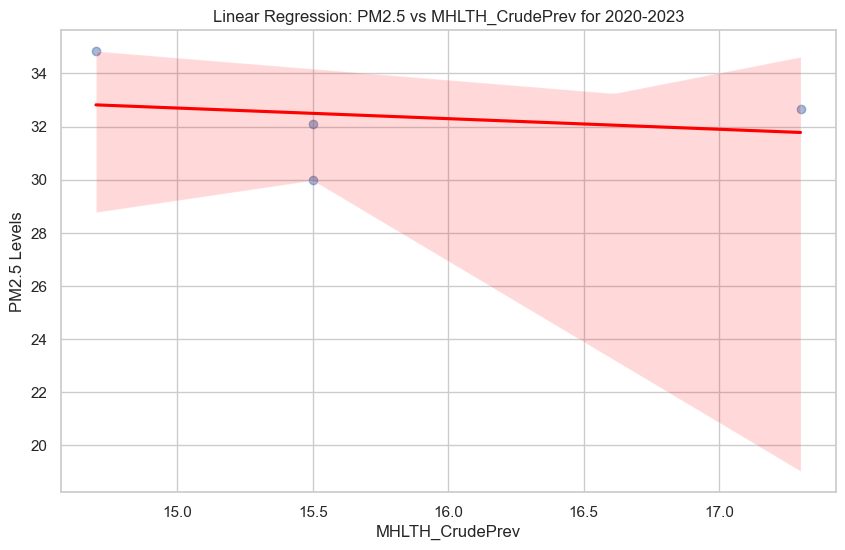

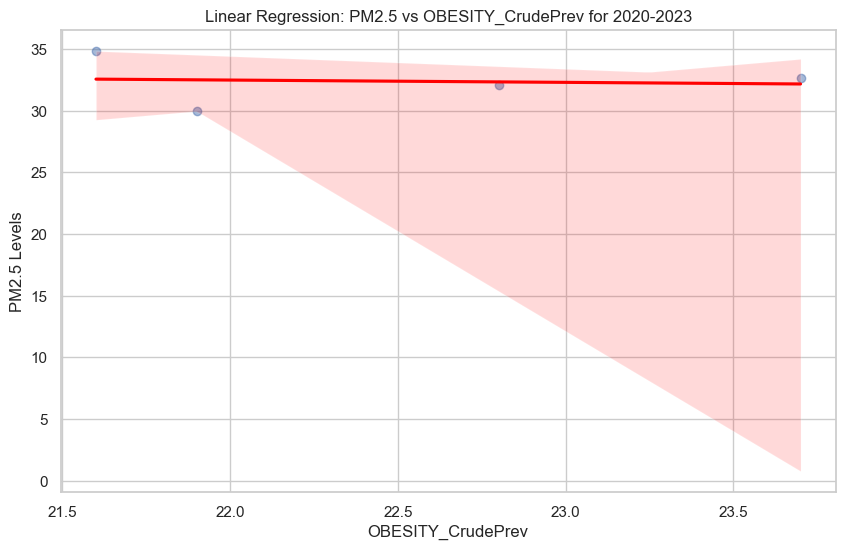

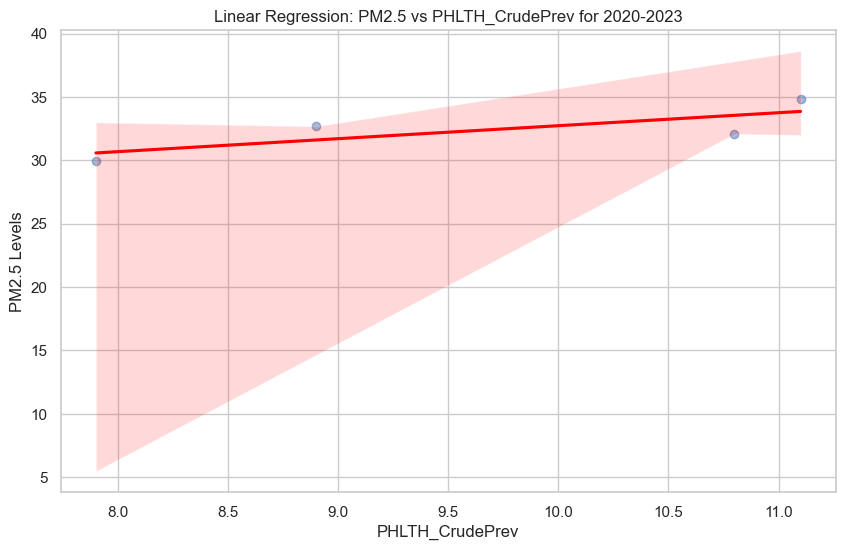

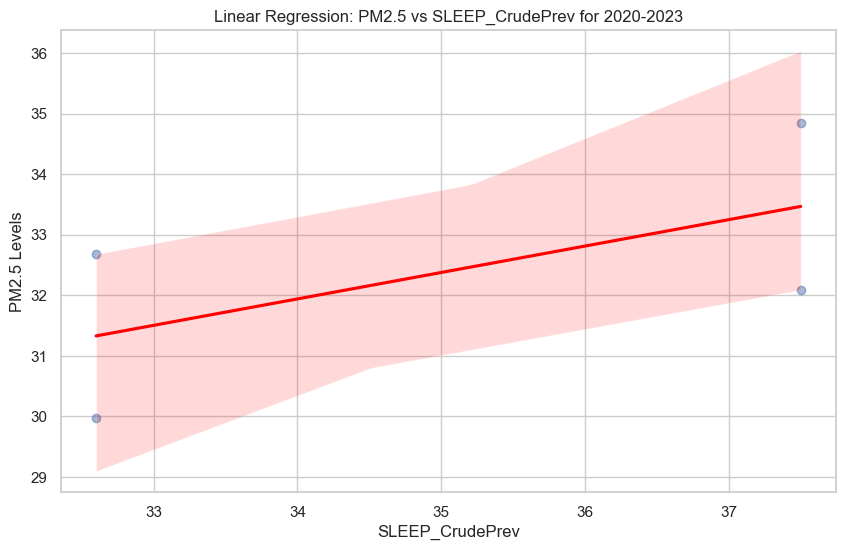

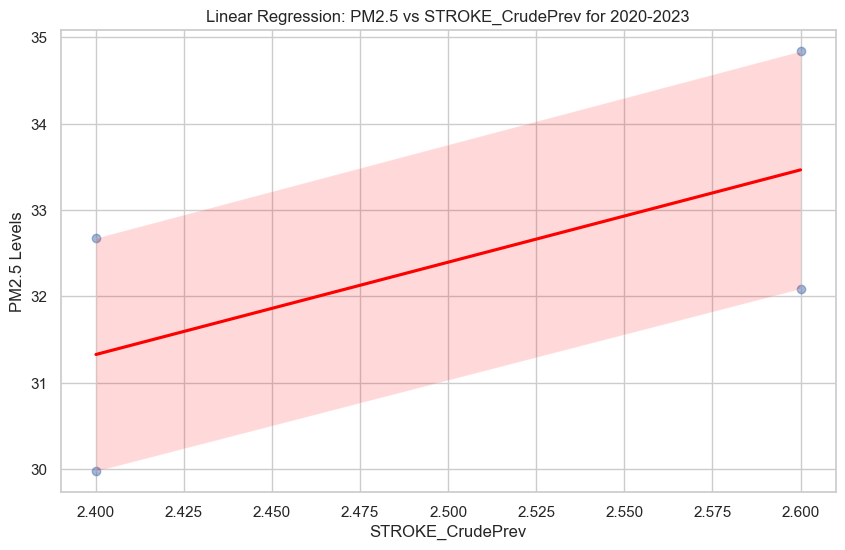

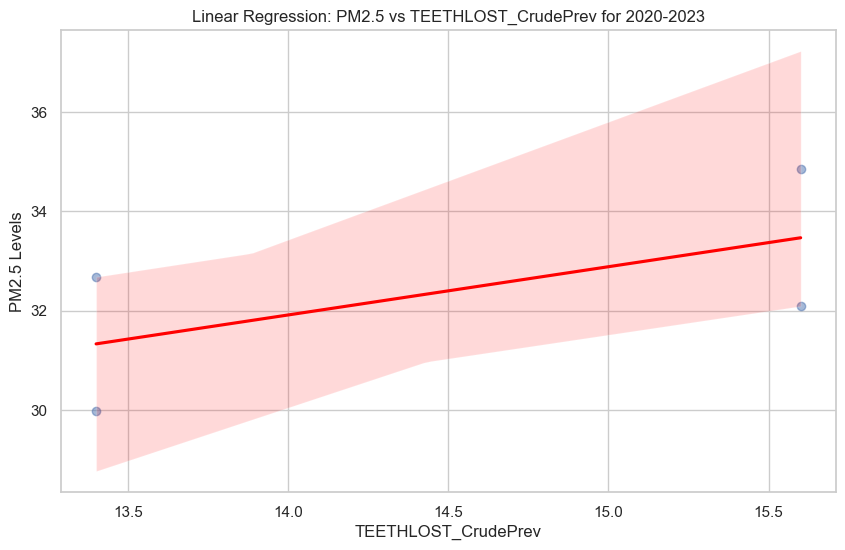

In [34]:
def plot_linear_regression(data, crude_columns, year):
    for column in crude_columns:
        if column != 'pm25':
            # Performing linear regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(data[column], data['pm25'])

            # Plotting
            plt.figure(figsize=(10, 6))
            sns.regplot(x=column, y='pm25', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
            plt.title(f'Linear Regression: PM2.5 vs {column} for {year}')
            plt.xlabel(column)
            plt.ylabel('PM2.5 Levels')
            plt.show()

# Extracting crude columns from the boston_df dataset
crude_columns_boston = [col for col in boston_df.columns if 'Crude' in col]

# Making linear regression plots for each crude rate against PM2.5 level for the Boston dataset
plot_linear_regression(boston_df, crude_columns_boston, '2020-2023')

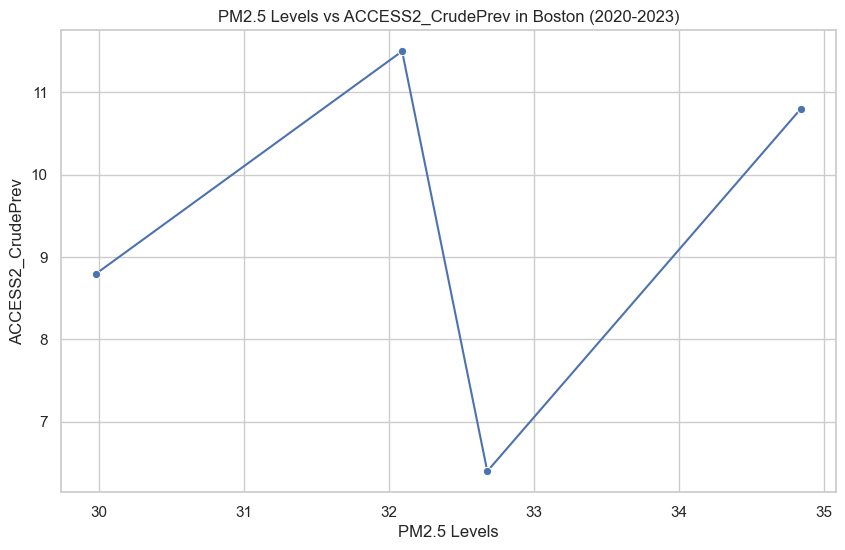

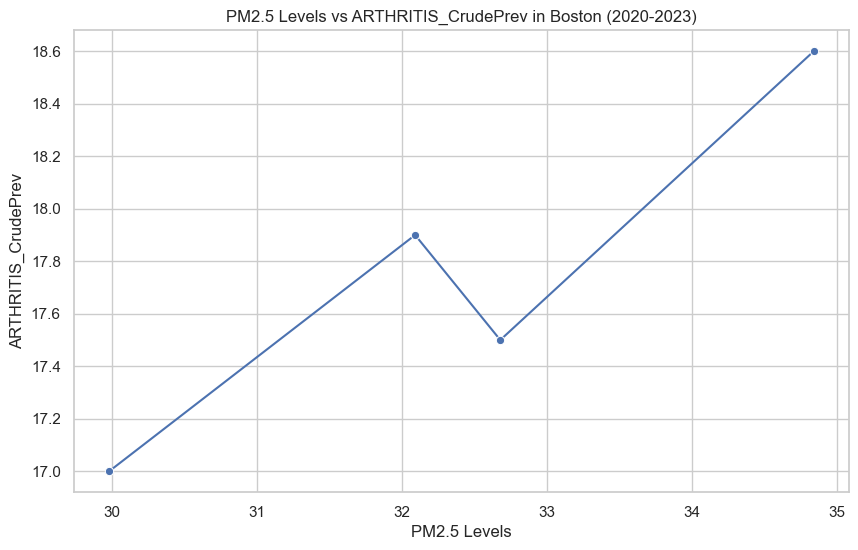

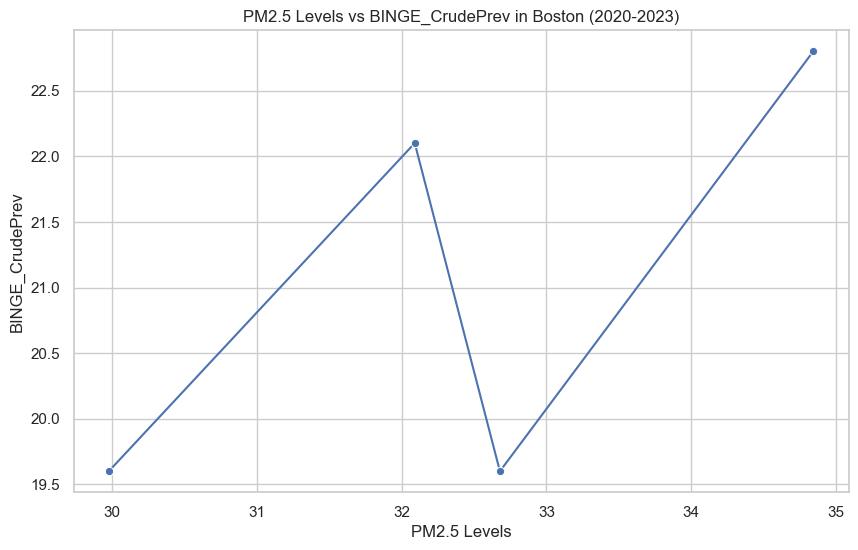

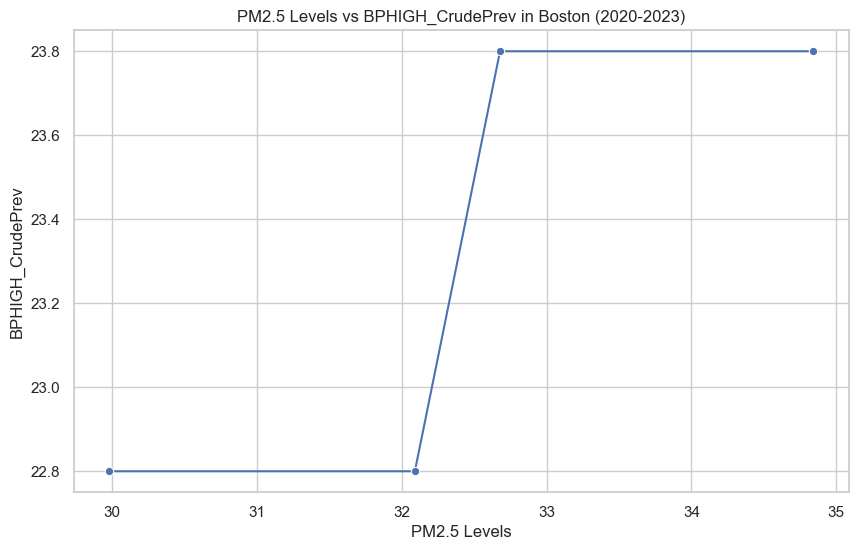

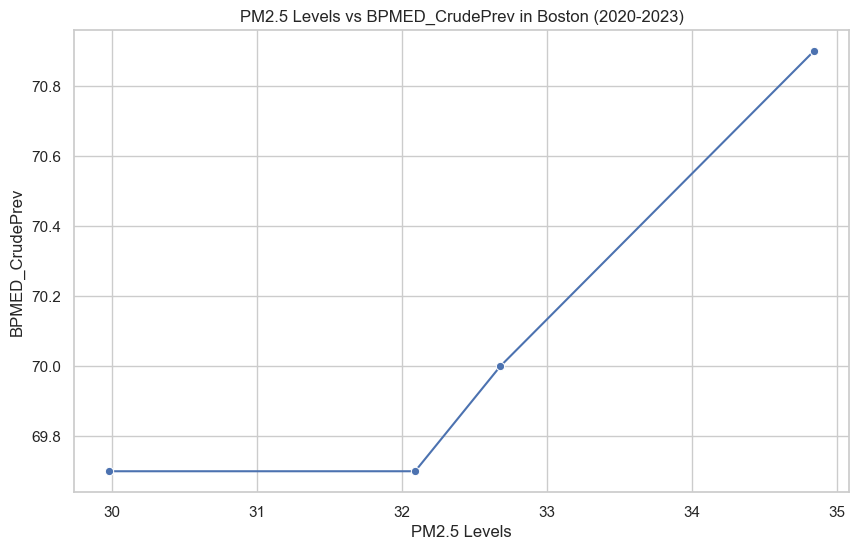

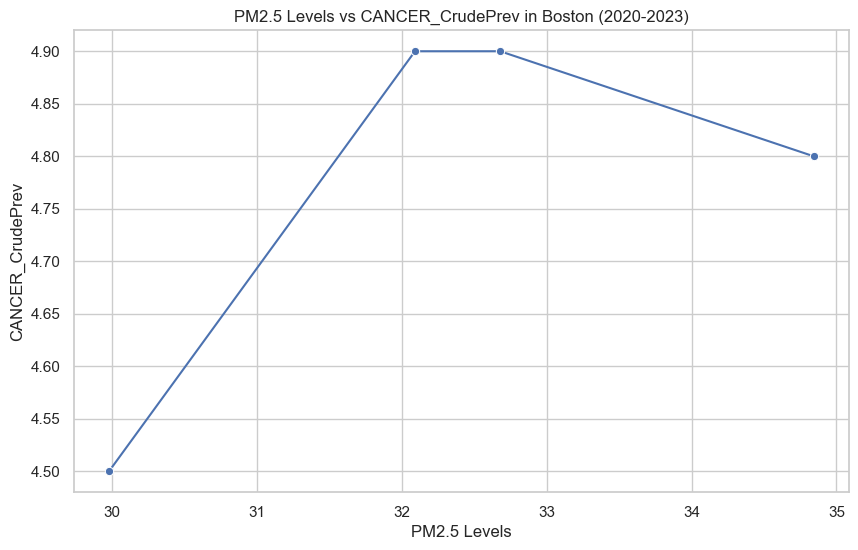

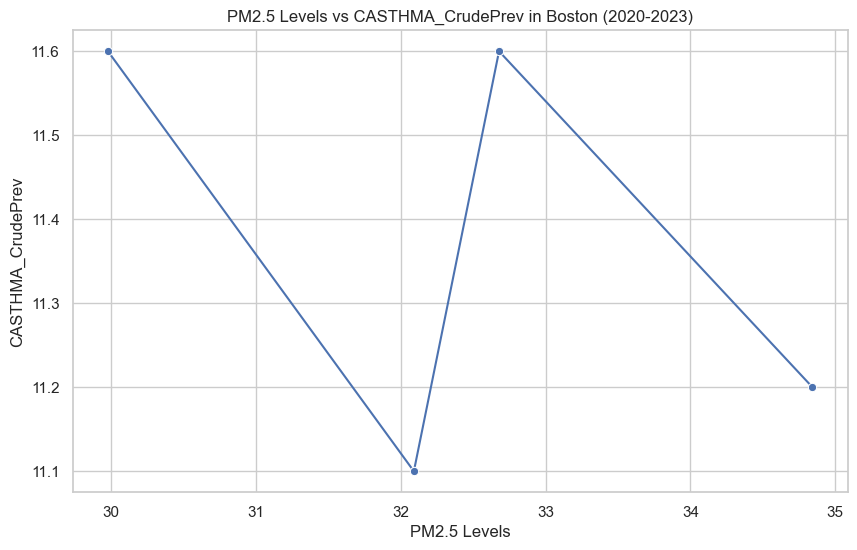

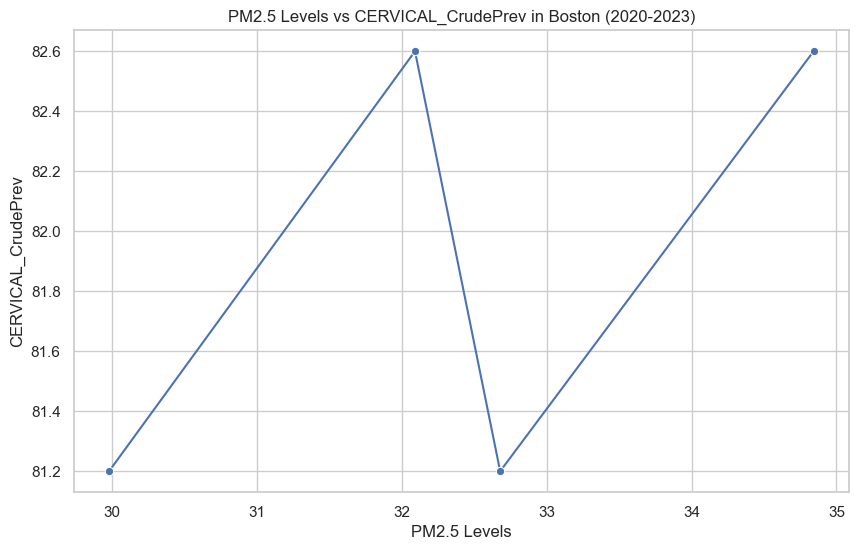

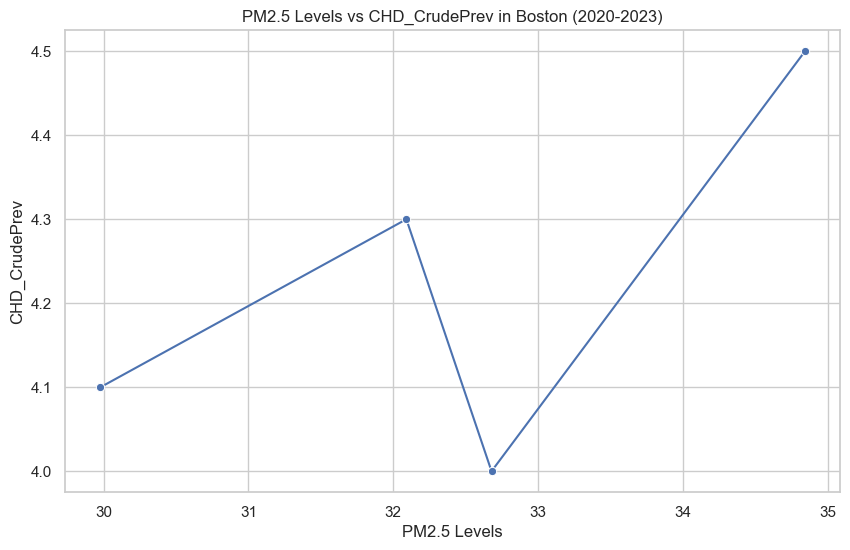

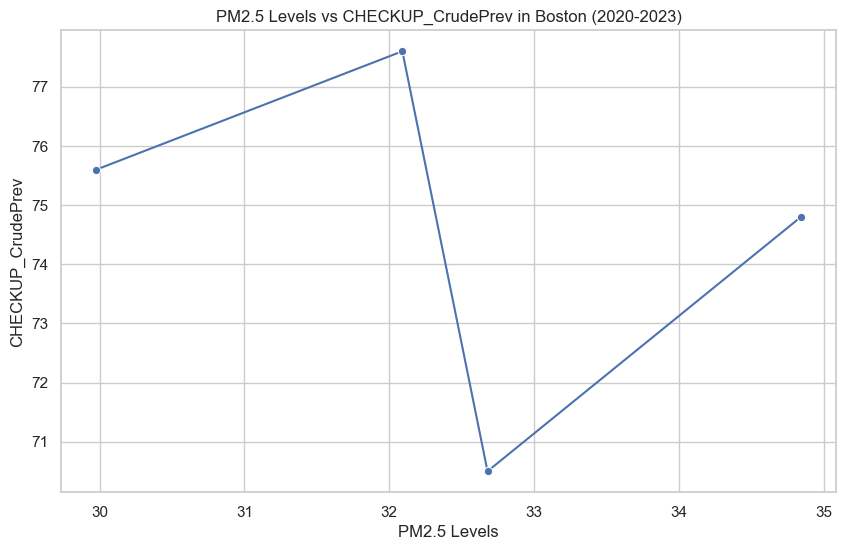

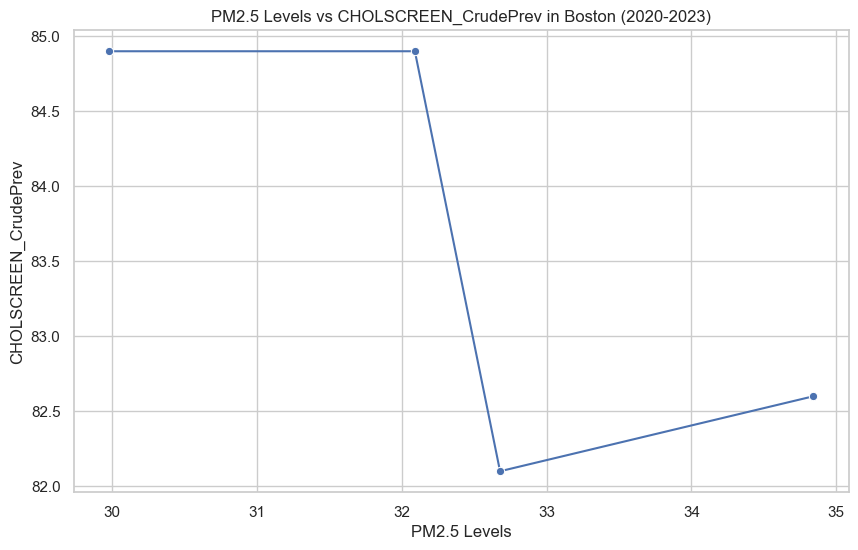

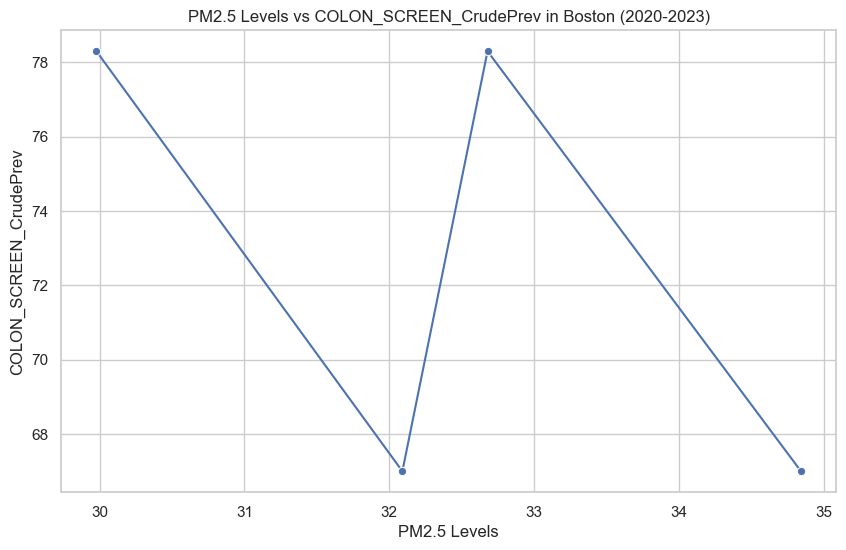

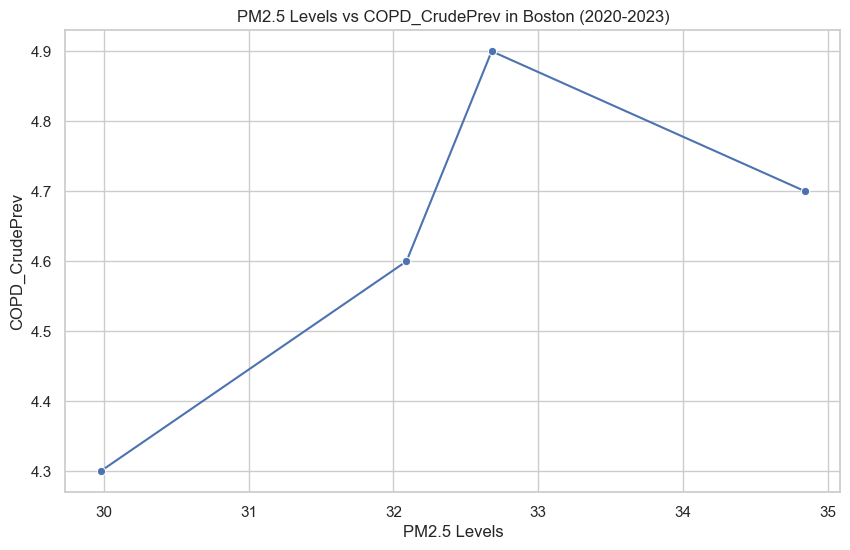

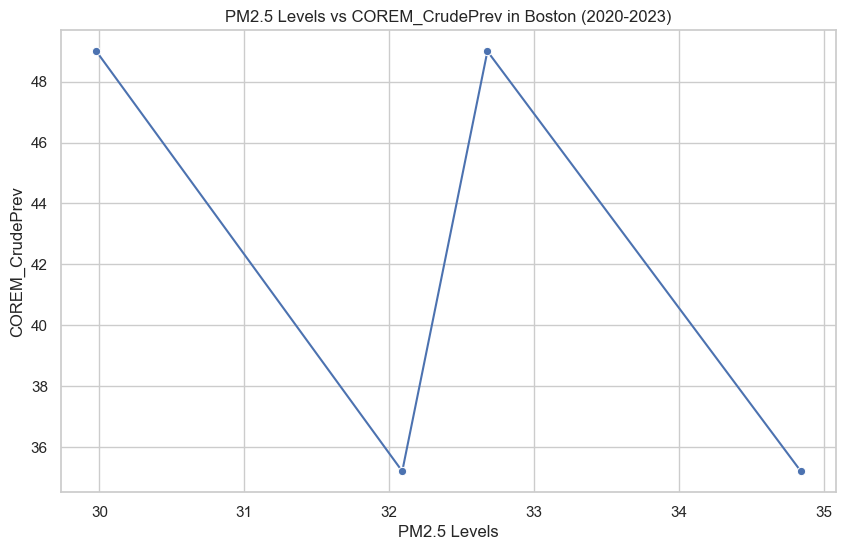

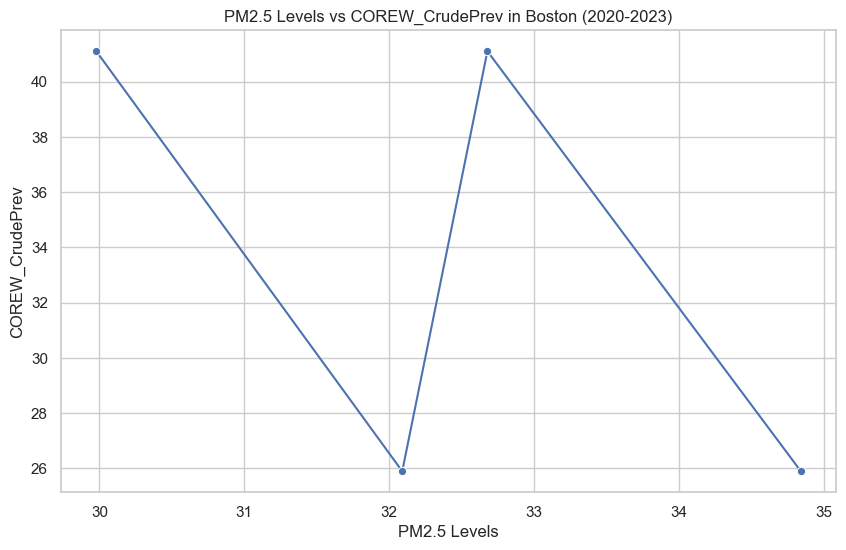

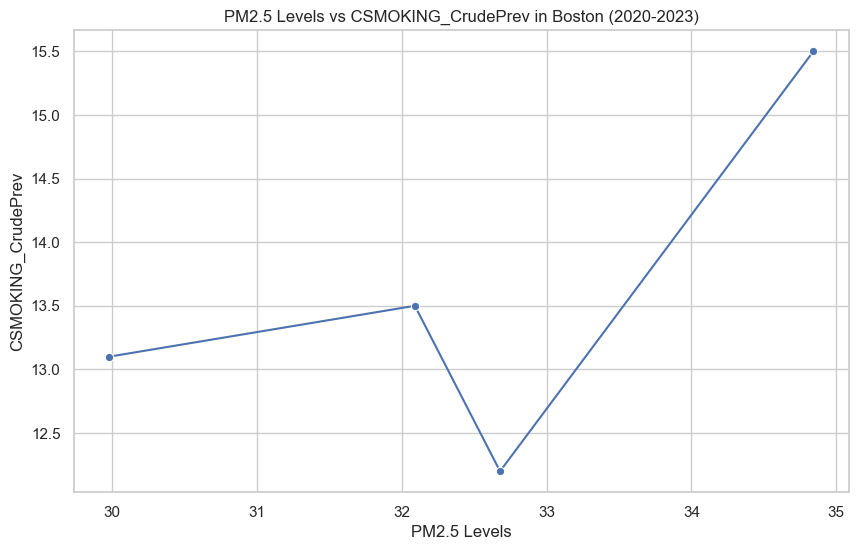

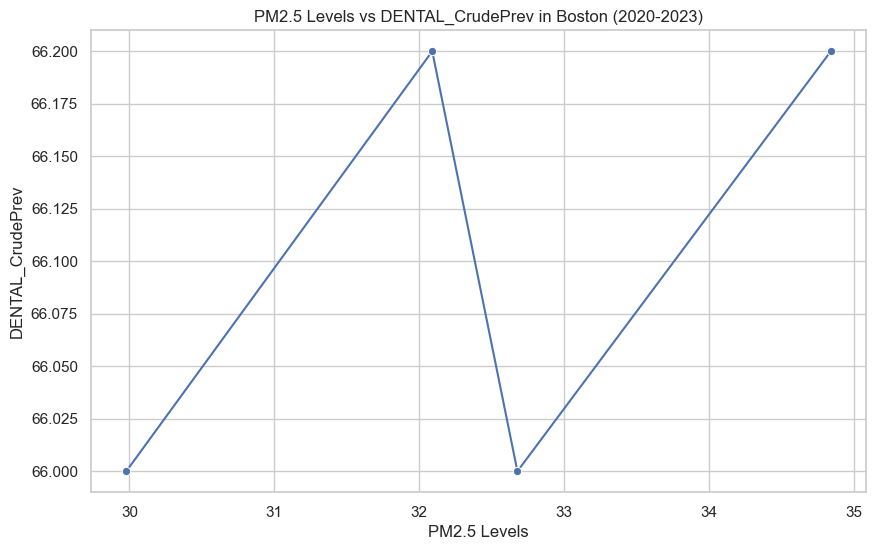

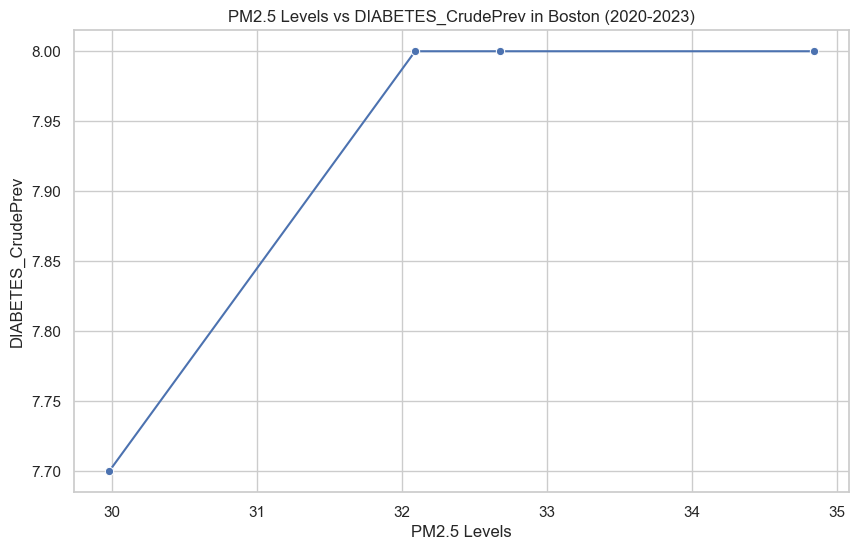

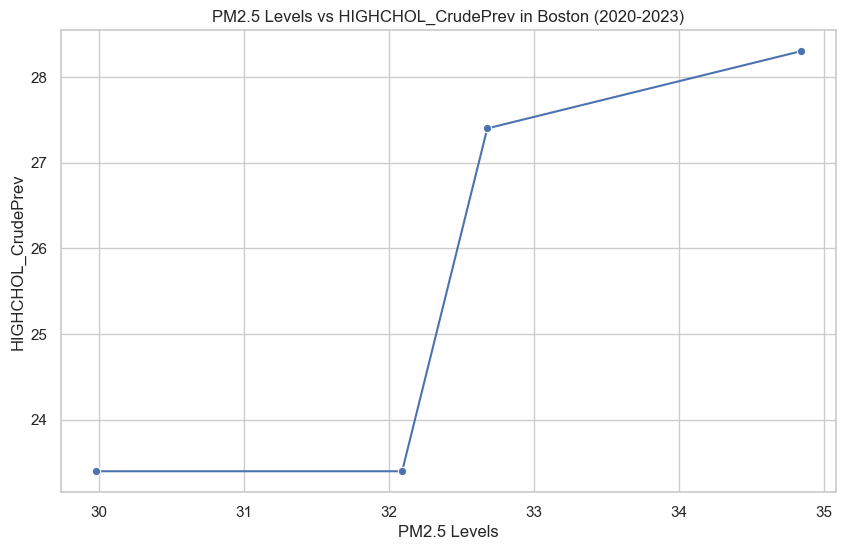

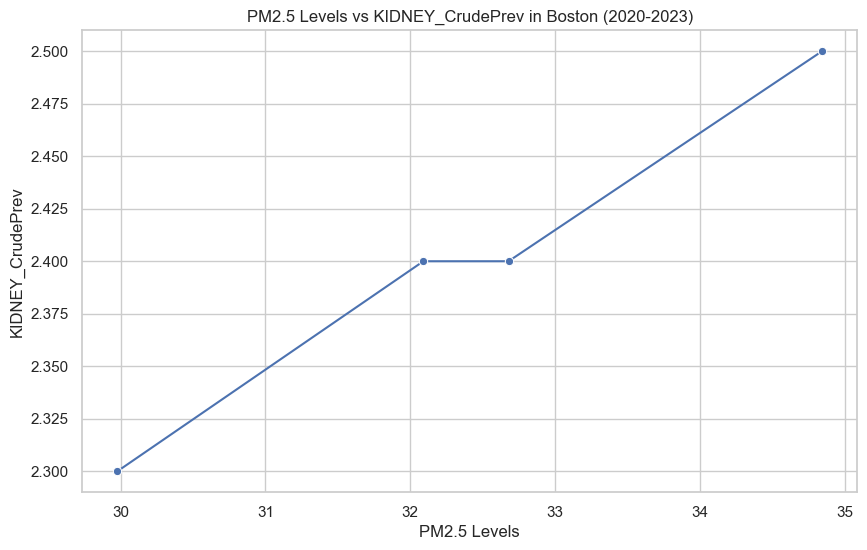

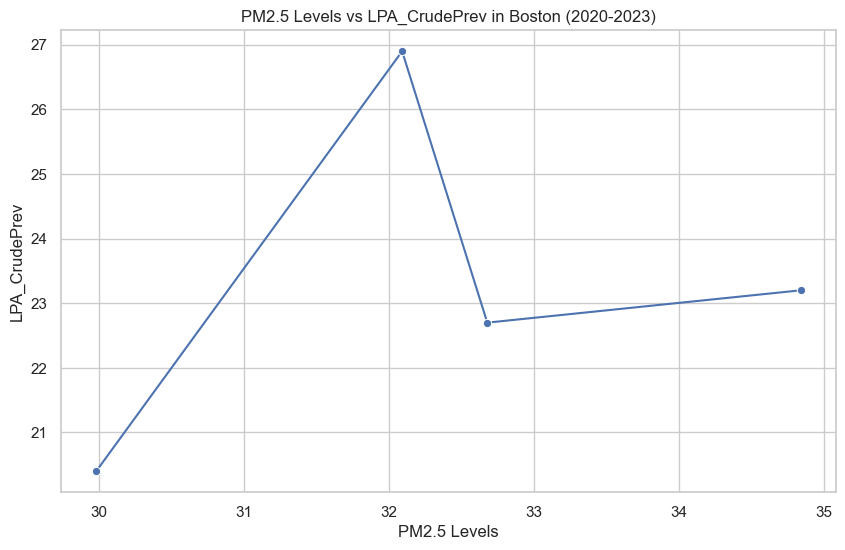

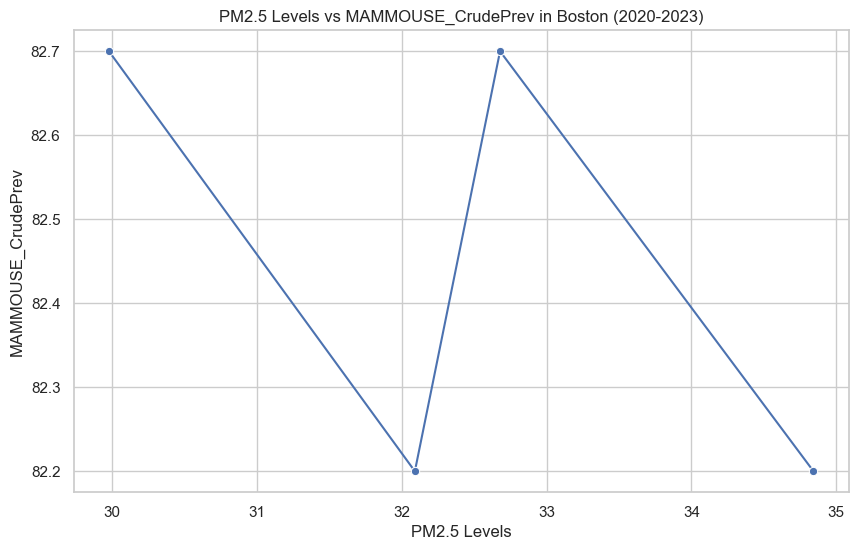

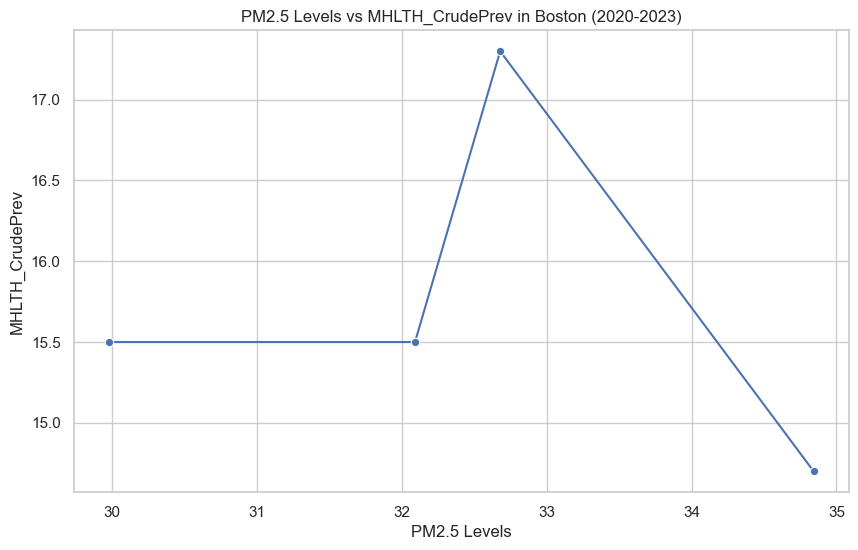

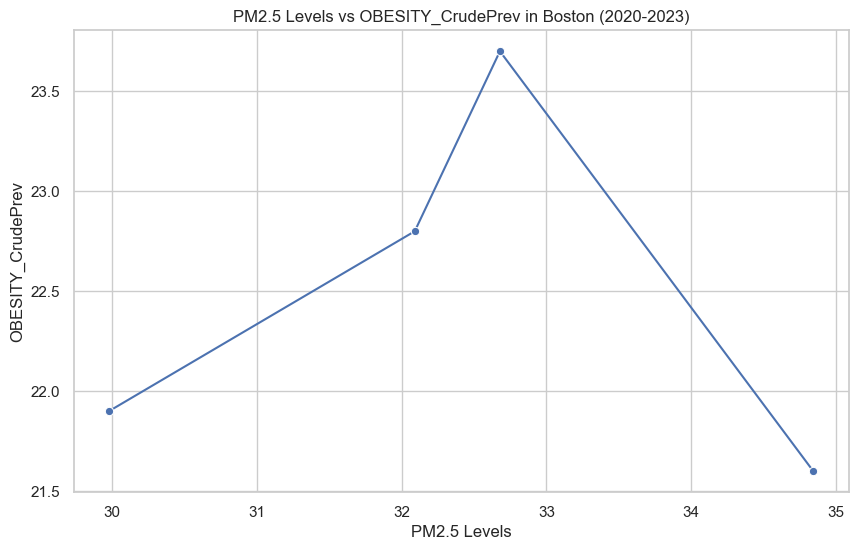

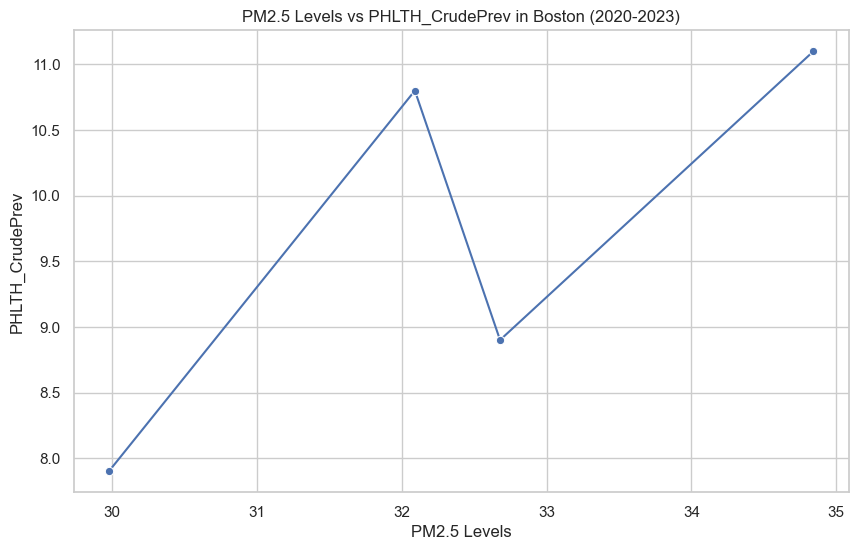

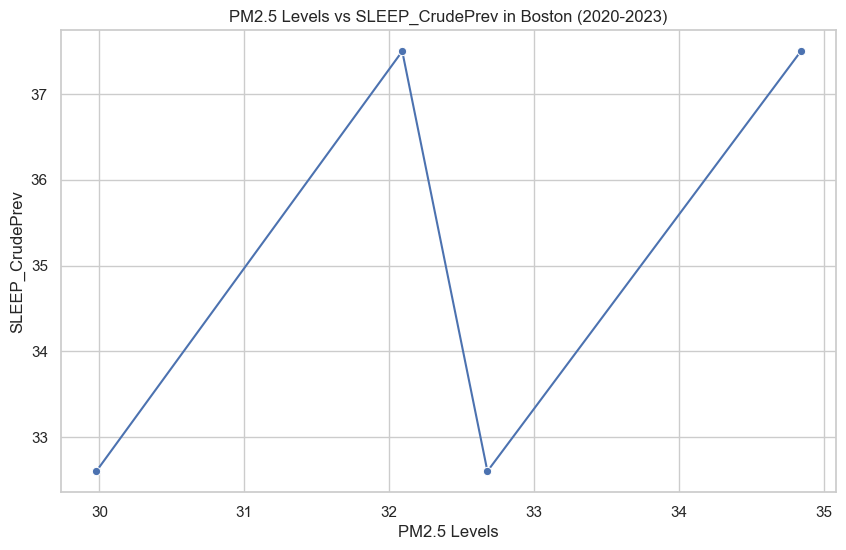

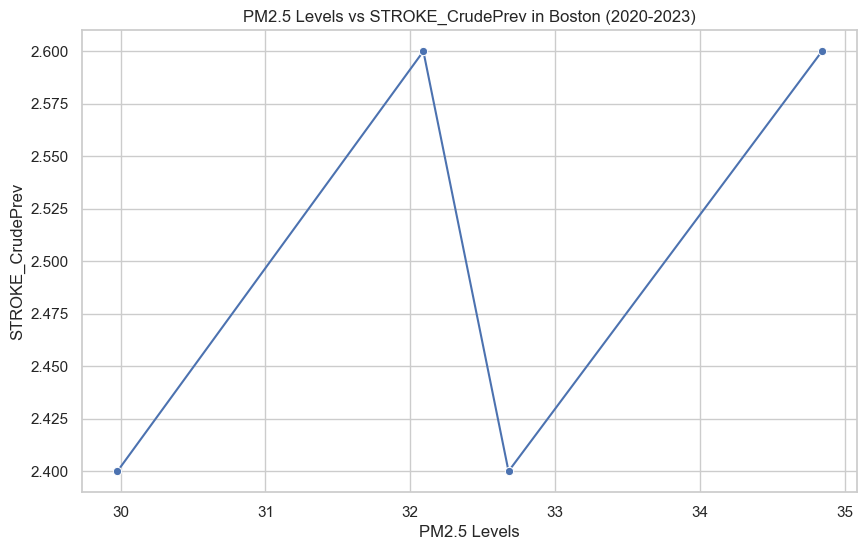

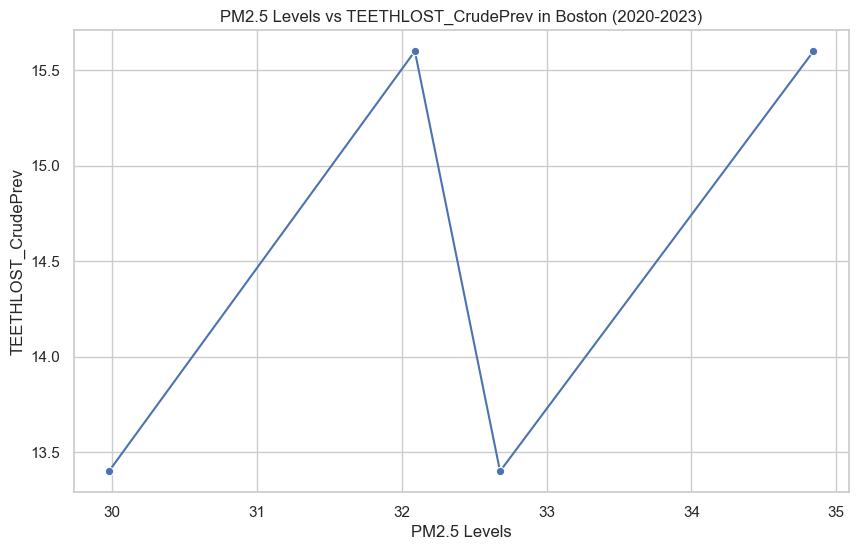

In [35]:
for column in crude_columns_boston:
    if column != 'pm25':
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='pm25', y=column, data=boston_df, marker='o')
        plt.title(f'PM2.5 Levels vs {column} in Boston (2020-2023)')
        plt.xlabel('PM2.5 Levels')
        plt.ylabel(column)
        plt.show()